# Загрузка библиотек

In [1513]:
import pandas as pd
import pyreadstat #Для чтения файлов SPSS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
#Нам нужен упорядоченный словарь для системы уравнений
from collections import OrderedDict
#Для оценки систем одновременных уравнений
from linearmodels.system import SUR
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.ticker as ticker
from sympy import *
import patsy

In [ ]:
plt.rcParams['axes.axisbelow'] = True

# Загрузка данных

In [2]:
waves_dict={1994:[5,'A'],
           1995:[6,'B'],
           1996:[7,'C'],
           1998:[8,'D'],
           2000:[9,'E'],
           2001:[10,'F'],
           2002:[11,'G'],
           2003:[12,'H'],
           2004:[13,'I'],
           2005:[14,'J'],
           2006:[15,'K'],
           2007:[16,'L'],
           2008:[17,'M'],
           2009:[18,'N'],
           2010:[19,'O'],
           2011:[20,'P'],
           2012:[21,'Q'],
           2013:[22,'R'],
           2014:[23,'S'],
           2015:[24,'T'],
           2016:[25,'U'],
           2017:[26,'V'],
           2018:[27,'W'],
           2019:[28,'X'],
           2020:[29,'Y'],
           2021:[30,'Z'] 
           }

In [3]:
# Загрузка фрейма данных волны выбранного года из папки
def download_wave_hh(year,path=r'C:\Users\79618\Desktop\Репрезентативная выборка 10.10.2021'):
    if (year<1994) or (year==1997) or (year==1999):
        print('Волны {0} года не существует.'.format(year))
    else:
        if year<2001:
            return pd.read_spss(r'{0}\{1}-я волна\ДОМОХОЗЯЙСТВА\r0{1}h_os41.sav'.format(path,waves_dict[year][0]))
        else:
            return pd.read_spss(r'{0}\{1}-я волна\ДОМОХОЗЯЙСТВА\r{1}h_os41.sav'.format(path,waves_dict[year][0]))

In [4]:
# Загрузка в словарь нескольких волн исследования
def download_period(period):
    dict_hh_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_hh_period[i]=download_wave_hh(i)
        print('Загружен ',i)
    return dict_hh_period

## FAST-загрузчик полной панели волн исследований RLMS

In [20]:
# Загрузка данных для работы FAST-функций
def FAST_variable(path=r'C:\Users\79618\Desktop\Репрезентативная выборка 10.10.2021'):
    global FAST_HOUSEHOLDS_DFS
    FAST_HOUSEHOLDS_DFS=download_period(list(range(1993,2022)),path)

In [6]:
FAST_variable()

Волны 1993 года не существует.
Загружен  1994
Загружен  1995
Загружен  1996
Волны 1997 года не существует.
Загружен  1998
Волны 1999 года не существует.
Загружен  2000
Загружен  2001
Загружен  2002
Загружен  2003
Загружен  2004
Загружен  2005
Загружен  2006
Загружен  2007
Загружен  2008
Загружен  2009
Загружен  2010
Загружен  2011
Загружен  2012
Загружен  2013
Загружен  2014
Загружен  2015
Загружен  2016
Загружен  2017
Загружен  2018
Загружен  2019
Загружен  2020
Загружен  2021


### Пример работы FAST-панели данных

In [8]:
FAST_HOUSEHOLDS_DFS[2020]

YREDID_H       YID_H       XID_H    WID_H    VID_H    UID_H    TID_H  \
0       1017.0     10003.0     10003.0  10003.0  10003.0  10003.0  10003.0   
1       1018.0     10004.0     10004.0      NaN  10004.0  10004.0  10004.0   
2       1020.0     10012.0     10012.0  10012.0  10012.0  10012.0  10012.0   
3       1022.0     10014.0     10014.0  10014.0  10014.0  10014.0  10014.0   
4       1023.0     10016.0     10016.0  10016.0  10016.0  10016.0  10016.0   
...        ...         ...         ...      ...      ...      ...      ...   
4826      69.0  14290014.0  14290014.0      NaN      NaN      NaN      NaN   
4827     206.0  14290015.0  14290015.0      NaN      NaN      NaN      NaN   
4828    6157.0  14290016.0  14290016.0      NaN      NaN      NaN      NaN   
4829    3229.0  14290017.0  14290017.0      NaN      NaN      NaN      NaN   
4830    3230.0  14290018.0  14290018.0      NaN      NaN      NaN      NaN   

        SID_H    RID_H    QID_H  ...  yf14.12  yf14.13  yf14.14  yf14.15  \
0     10003.0  10003.0  10003.0  ...      Нет      NaN      Нет      NaN   
1     10004.0  10004.0  10004.0  ...      Нет      NaN      Нет      NaN   
2     10012.0  10012.0  10012.0  ...      Нет      NaN      Нет      NaN   
3     10014.0  10014.0  10014.0  ...      Нет      NaN      Нет      NaN   
4     10016.0  10016.0  10016.0  ...      Нет      NaN      Нет      NaN   
...       ...      ...      ...  ...      ...      ...      ...      ...   
4826      NaN      NaN      NaN  ...      Нет      NaN      Нет      NaN   
4827      NaN      NaN      NaN  ...      Нет      NaN      Нет      NaN   
4828      NaN      NaN      NaN  ...      Нет      NaN      Нет      NaN   
4829      NaN      NaN      NaN  ...      Нет      NaN      Нет      NaN   
4830      NaN      NaN      NaN  ...      Нет      NaN      Нет      NaN   

          yf14         yf16.1         yf16.2         yf16.3        yf16.4  \
0      17376.0   Нет, не было  НУЖДЫ НЕ БЫЛО   Нет, не было  Нет, не было   
1      37500.0   Нет, не было  НУЖДЫ НЕ БЫЛО  НУЖДЫ НЕ БЫЛО  Нет, не было   
2      19700.0  НУЖДЫ НЕ БЫЛО  НУЖДЫ НЕ БЫЛО  НУЖДЫ НЕ БЫЛО  Нет, не было   
3      15985.0   Нет, не было   Нет, не было   Нет, не было  Нет, не было   
4     126000.0   Нет, не было   Нет, не было   Нет, не было  Нет, не было   
...        ...            ...            ...            ...           ...   
4826   81800.0       Да, было   Нет, не было       Да, было      Да, было   
4827   11660.0   Нет, не было  НУЖДЫ НЕ БЫЛО       Да, было      Да, было   
4828   56000.0   Нет, не было  НУЖДЫ НЕ БЫЛО  НУЖДЫ НЕ БЫЛО      Да, было   
4829   19863.0  НУЖДЫ НЕ БЫЛО  НУЖДЫ НЕ БЫЛО  НУЖДЫ НЕ БЫЛО  Нет, не было   
4830   33000.0   Нет, не было  НУЖДЫ НЕ БЫЛО   Нет, не было  Нет, не было   

             yf16.5  
0     НУЖДЫ НЕ БЫЛО  
1          Да, было  
2          Да, было  
3      Нет, не было  
4     НУЖДЫ НЕ БЫЛО  
...             ...  
4826       Да, было  
4827  НУЖДЫ НЕ БЫЛО  
4828       Да, было  
4829   Нет, не было  
4830   Нет, не было  

[4831 rows x 1033 columns]

## FAST-аналог

In [27]:
def FAST_download_period(period):
    dict_hh_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_hh_period[i]=FAST_HOUSEHOLDS_DFS[i]
        print('Загружен ',i)
    return dict_hh_period

# Отбор продуктов питания

Словарь кодов продуктов питания

In [316]:
codes_raugh='''1 белый хлеб, кг.
2 черный хлеб, кг.
3 рис, другая крупа, кг.
4 мука, кг.
5 макаронные изделия, кг.
6 картофель, кг.
7 овощные консервы, без солений, кг.
8 капуста, включая квашеную, кг.
9 огурцы, включая соленые, кг.
10 помидоры, включая соленые, кг.
11 свеклу, морковь и другие корнеплоды, кг.
12 лук, чеснок, кг.
13 кабачки, тыквы и тому подобное, кг.
14 другие овощи, кг.
15 арбузы, дыни, включая соленые и сушеные, кг.
16 фруктово-ягодные консервы, кг.
17 свежие ягоды, кг.
18 свежие фрукты, кг.
19 сушеные фрукты и ягоды, кг.
20 орехи, семечки, кг.
21 мясные консервы, кг.
22 говядина, телятина, кг.
23 баранина, козлятина, кг.
24 свинина, кг.
25 субпродукты: печень, почки, кг.
26 птица, кг.
27 сало, другие животные жиры, кг.
28 колбасные изделия, копчености, кг.
29 мясных полуфабрикатов, кг.
30 молочные консервы, сухое молоко, кг.
31 молока, кроме сухого, л.
32 кисломолочные продукты: кефир, йогурт и другие, л.
33 сметана, сливки, л.
34 масло животное, кг.
35 творог, сырковая масса, кг.
36 сыр, брынза, кг.
37 мороженое, кг.
38 масло растительное, л.
39 маргарин, кг.
40 сахар, кг.
41 конфеты, шоколад, кг.
42 варенье, джем, кг.
43 меда, л.
44 печенье, пирожные, торты, вафли, пряники, сдобные булочки, кг.
45 яица, шт.
46 рыба свежая, мороженая, соленая, сушеная, рыбные полуфабрикаты, кг.
47 рыбные консервы, кг.
58 морепродукты, кг.
59 полуфабрикаты, не считая мясных и рыбных, кг.
48 чай, кг.
49 кофе, кофейные напитки, какао, кг.
50 безалкогольные напитки, соки, л.
51 соль, другие специи, различные соусы, кг. 
52 грибы, кг.
53 водка, л.
54 вино, другие ликероводочные изделия, л.
55 пиво, л.
56 табачные изделия, пачек'''

# исключили 57 жевательные резинки, пастилки, шт.

Расшифровщик кодификатора продуктов питания

In [317]:
codebook={}
for i in codes_raugh.split('\n'):
    n=''
    for j in i:
        if j.isnumeric():
            n=n+j
        else:
            break
        
    codebook[f'e1.{n}']=i.replace(str(n)+' ', "")
    n=''

## Рутины чистки данных

In [13]:
#==============================================
def renaming_routine(df1,rename_del):
    if rename_del=='wave':
        for i in range(len(df1.columns)):
            df1.rename(columns={ df1.columns[i]: df1.columns[i][1:]}, inplace = True)
        return df1
    if rename_del=='quest':
        for i in range(len(df1.columns)):
            df1.rename(columns={ df1.columns[i]: df1.columns[i][:-1]}, inplace = True)
        return df1
#==============================================    
def renaming_routine_names(df1):
    df1=renaming_routine(df1,'wave')
    df1=renaming_routine(df1,'quest')
    df1.rename(columns=codebook,inplace=True)
    return df1

In [14]:
def cleaning_routine(dfvar_1,dfvar_2):
    bad_households1=[]
    for i in range(len(dfvar_1.columns)):
        ttt=dfvar_1.loc[dfvar_1.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households1=[*bad_households1,*list(ttt)]
    
    bad_households2=[]
    for i in range(len(dfvar_2.columns)):
        ttt=dfvar_2.loc[dfvar_2.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households2=[*bad_households2,*list(ttt)] 
            
    dfvar_1=dfvar_1.drop(list(set(bad_households1)|set(bad_households2))).copy()
    dfvar_1=dfvar_1.astype(str).replace('nan', '0').astype(float).copy()
    return dfvar_1

## Генератор фрейма данных продуктов питания

In [1398]:
def food_df(year, variable, cleaned=True,rename_del=['wave','quest']):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {0} года не существует.'.format(year)
    df1=download_wave_hh(year)
#=============================================================================    
    food_costs_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'c' in i[1:]:
                if '60' not in i[1:]:
                    if '57' not in i[1:]:
                        food_costs_cols.append(i)
    food_costs=df1.loc[:,food_costs_cols]
#=============================================================================          
    food_quant_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'b' in i[1:]:
                if '57' not in i[1:]:
                    food_quant_cols.append(i)
    food_quant=df1.loc[:,food_quant_cols]
#=============================================================================
    if 'wave' in rename_del:
        food_costs=renaming_routine(food_costs,'wave')
        food_quant=renaming_routine(food_quant,'wave')
    if 'quest' in rename_del:
        food_costs=renaming_routine(food_costs,'quest')
        food_quant=renaming_routine(food_quant,'quest')
    if rename_del=='names':
        food_costs=renaming_routine_names(food_costs)
        food_quant=renaming_routine_names(food_quant)
#=============================================================================    
    if cleaned==1:
        if variable=='costs' or variable=='cost':
            return cleaning_routine(food_costs,food_quant)
        if variable=='quants' or variable=='quant':
            return cleaning_routine(food_quant,food_costs)
        if variable=='prices' or variable=='price':
            if rename_del=='names':
                result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                result.replace([np.inf, -np.inf], np.nan, inplace=True)
                return result
            else:
                if 'quest' not in rename_del:
                    food_costs=renaming_routine(food_costs,'quest')
                    food_quant=renaming_routine(food_quant,'quest')
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
                else:
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
    else: 
        if variable=='costs' or variable=='cost':
            return food_costs
        if variable=='quants' or variable=='quant':
            return food_quant
        if variable=='prices' or variable=='price':
            return 'Невозможно получить индивидуальные цены без чистки данных'

### Пример

## Аналог для работы непосредственно с датафреймом

In [320]:
def food_df_from_df(df1, variable, cleaned=True,rename_del=['wave','quest']):

#=============================================================================    
    food_costs_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'c' in i[1:]:
                if '60' not in i[1:]:
                    if '57' not in i[1:]:
                        food_costs_cols.append(i)
    food_costs=df1.loc[:,food_costs_cols]
#=============================================================================          
    food_quant_cols=[]
    for i in df1.columns:
        if 'e1.' in (i[1:]):
            if 'b' in (i[1:]):
                if '57' not in i[1:]:
                    food_quant_cols.append(i)
    food_quant=df1.loc[:,food_quant_cols]
#=============================================================================
    if 'wave' in rename_del:
        food_costs=renaming_routine(food_costs,'wave')
        food_quant=renaming_routine(food_quant,'wave')
        
    if 'quest' in rename_del:
        food_costs=renaming_routine(food_costs,'quest')
        food_quant=renaming_routine(food_quant,'quest')
        
    if rename_del=='names':
        food_costs=renaming_routine_names(food_costs)
        food_quant=renaming_routine_names(food_quant)
        
#=============================================================================    
    if cleaned==1:
        if variable=='cost' or variable=='costs':
            return cleaning_routine(food_costs,food_quant)
        
        if variable=='quant' or variable=='quants':
            return cleaning_routine(food_quant,food_costs)
        
        if variable=='price' or variable=='prices':
            if rename_del=='names':
                result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                return result
            else:
                if 'quest' not in rename_del:
                    food_costs=renaming_routine(food_costs,'quest')
                    food_quant=renaming_routine(food_quant,'quest')
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    return result
                else:
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    return result
                    
            
    else: 
        if variable=='cost' or variable=='costs':
            return food_costs
        if variable=='quant' or variable=='quants':
            return food_quant
        if variable=='price' or variable=='prices':
            return 'Невозможно получить индивидуальные цены без чистки данных'

## FAST-аналог

In [1400]:
def FAST_food_df(year, variable, cleaned=True,rename_del=['wave','quest'],del_zero=False,dem=False):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {0} года не существует.'.format(year)
    df1=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)


#=============================================================================    
    food_costs_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'c' in i[1:]:
                if '60' not in i[1:]:
                    if '57' not in i[1:]:
                        food_costs_cols.append(i)
    food_costs=df1.loc[:,food_costs_cols]
#=============================================================================          
    food_quant_cols=[]
    for i in df1.columns:
        if 'e1.' in i[1:]:
            if 'b' in i[1:]:
                if '57' not in i[1:]:
                    food_quant_cols.append(i)
    food_quant=df1.loc[:,food_quant_cols]
#=============================================================================
    if 'wave' in rename_del:
        food_costs=renaming_routine(food_costs,'wave')
        food_quant=renaming_routine(food_quant,'wave')
        
    if 'quest' in rename_del:
        food_costs=renaming_routine(food_costs,'quest')
        food_quant=renaming_routine(food_quant,'quest')
        
    if rename_del=='names':
        food_costs=renaming_routine_names(food_costs)
        food_quant=renaming_routine_names(food_quant)
        
#=============================================================================    
    if cleaned==1:
        
        if variable=='costs' or variable=='cost':
            return cleaning_routine(food_costs,food_quant)
        
        if variable=='quants' or variable=='quant':
            return cleaning_routine(food_quant,food_costs)
        
        if variable=='prices' or variable=='price':
            if rename_del=='names':
                result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                result.replace([np.inf, -np.inf], np.nan, inplace=True)
                return result
            else:
                if 'quest' not in rename_del:
                    food_costs=renaming_routine(food_costs,'quest')
                    food_quant=renaming_routine(food_quant,'quest')
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
                else:
                    result=cleaning_routine(food_costs,food_quant)/cleaning_routine(food_quant,food_costs)
                    result.replace([np.inf, -np.inf], np.nan, inplace=True)
                    return result
                
        
            
    else: 
        if variable=='costs' or variable=='cost':
            return food_costs
        if variable=='quants' or variable=='quant':
            return food_quant
        if variable=='prices' or variable=='price':
            return 'Невозможно получить индивидуальные цены без чистки данных'

### Пример

In [39]:
FAST_food_df(2001,variable='price')

e1.1       e1.2       e1.3       e1.4       e1.5  e1.6  e1.7  e1.8  \
4     17.5   7.000000        NaN   7.666667  20.000000   NaN   NaN   NaN   
5     16.5   7.222222   8.000000   8.000000        NaN   NaN   NaN   NaN   
6      9.0  15.500000        NaN        NaN        NaN   NaN   NaN   NaN   
8     12.0   6.500000        NaN   9.000000        NaN   NaN   NaN   NaN   
9     13.0   6.300000  10.500000  10.500000  12.500000   NaN   NaN   NaN   
...    ...        ...        ...        ...        ...   ...   ...   ...   
3509  14.0   9.333333  15.000000        NaN  22.222222   NaN   NaN   NaN   
3510   8.4   8.000000  10.000000   8.500000  14.000000   5.5   NaN   5.0   
3512  12.0  16.071429  10.000000   6.000000  12.000000   5.0   NaN   NaN   
3513   NaN  30.000000  11.111111        NaN        NaN   NaN   NaN  10.0   
3517  12.0   8.750000  14.000000        NaN        NaN   NaN   NaN  30.0   

      e1.9      e1.10  ...   e1.48   e1.49  e1.50  e1.51  e1.52  e1.53  \
4      NaN        NaN  ...     NaN     NaN    NaN    NaN    NaN  108.0   
5      NaN        NaN  ...     NaN     NaN    NaN    3.0    NaN    NaN   
6      NaN  12.500000  ...  156.25     NaN    NaN    NaN    NaN    NaN   
8      NaN  25.333333  ...  120.00     NaN    NaN    3.0    NaN    NaN   
9      NaN        NaN  ...   80.00     NaN   10.8    2.5    NaN    NaN   
...    ...        ...  ...     ...     ...    ...    ...    ...    ...   
3509   NaN        NaN  ...   60.00  1140.0    NaN    2.5    NaN    NaN   
3510   NaN  20.000000  ...  160.00     NaN    NaN    3.0    NaN    NaN   
3512   NaN        NaN  ...  140.00     NaN    NaN    2.5    NaN    NaN   
3513   NaN        NaN  ...     NaN     NaN    NaN    NaN    NaN    NaN   
3517   NaN        NaN  ...  400.00   980.0   20.0    NaN    NaN    NaN   

           e1.54  e1.55  e1.56  e1.57  
4            NaN   20.0    5.0    NaN  
5            NaN    NaN    3.0    NaN  
6            NaN    NaN    NaN    NaN  
8            NaN    NaN    NaN    NaN  
9            NaN   20.0    3.0    NaN  
...          ...    ...    ...    ...  
3509         NaN    NaN   10.0    0.8  
3510         NaN    NaN    NaN    NaN  
3512         NaN    NaN    NaN    NaN  
3513  106.666667    NaN    NaN    NaN  
3517         NaN    NaN    NaN    NaN  

[2795 rows x 57 columns]

# Плоттинг RLMS-HSE

In [40]:
name_dict={'prices':'Цена за товар',
           'price':'Цена за товар',
           'quant':'Количество товара',
           'quants':'Количество товара',
           'cost':'Затраты на товар',
           'cost':'Затраты на товар'}

## Генератор графика точек  (по регионам)

In [61]:
def region_plot(year, variable, plot_num='all',date_fr=False, fast=False):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    if fast==True:
        df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
        df_plot=food_df_from_df(df_all,variable)
    else:
        df_all=download_wave_hh(year)
        df_plot=food_df_from_df(df_all,variable)
    region_dict={}
    for i in df_all.region.cat.categories:
        region_dict[i]=list(df_all.loc[df_all['region'] == i].index)

    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 10), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.region.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 10), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.region.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

### Пример

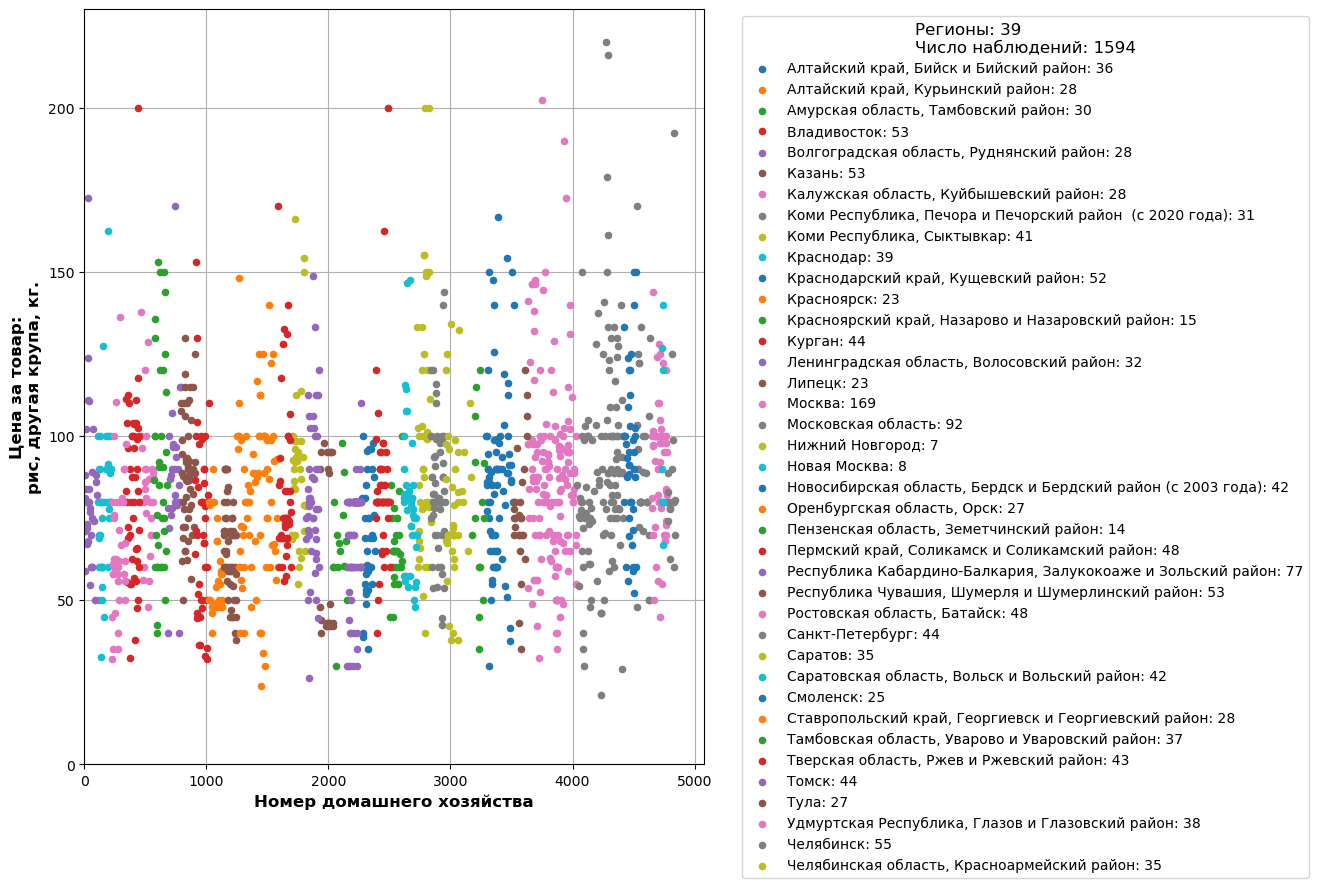

In [2324]:
region_plot(2021, "price", 2)

## Аналог для работы непосредственно с датафреймом

In [49]:
def region_plot_from_df(df_all, variable, plot_num='all'):
    df_plot=food_df_from_df(df_all,variable)
    region_dict={}
    for i in df_all.region.cat.categories:
        region_dict[i]=list(df_all.loc[df_all['region'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 10), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.region.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.region.cat.categories[i]+': '+str(len(good_index),s=20))
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 10), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.region.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

## Генератор графика точек (по типу поселения)

In [58]:
def status_plot(year, variable, plot_num='all',fast=False):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    if fast==True:
        df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
        df_plot=food_df_from_df(df_all,variable)
    else:
        df_all=download_wave_hh(year)
        df_plot=food_df_from_df(df_all,variable)
    status_dict={}
    for i in df_all.status.cat.categories:
        status_dict[i]=list(df_all.loc[df_all['status'] == i].index)
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.status.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.25, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 6), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.status.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.40, 1),title="Типов поселения: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

### Пример

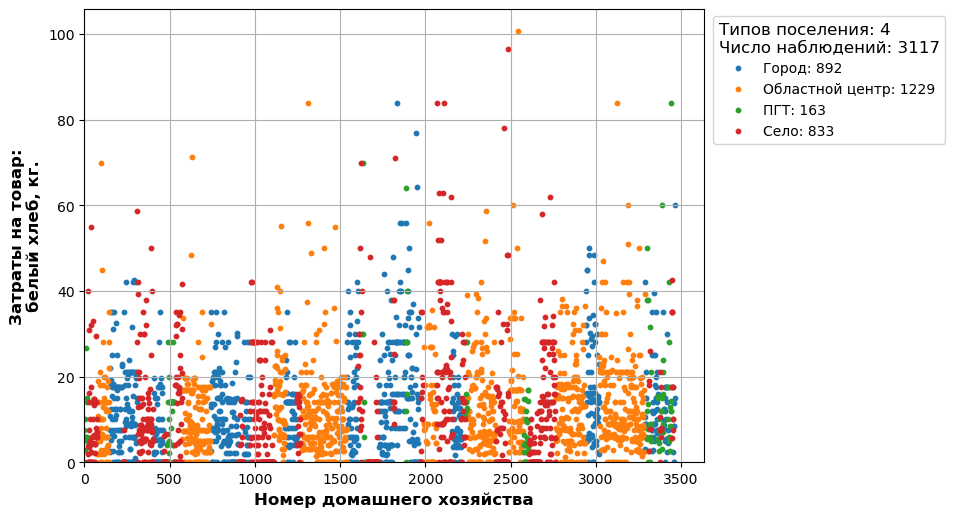

In [59]:
status_plot(1998, variable='cost', plot_num=0)

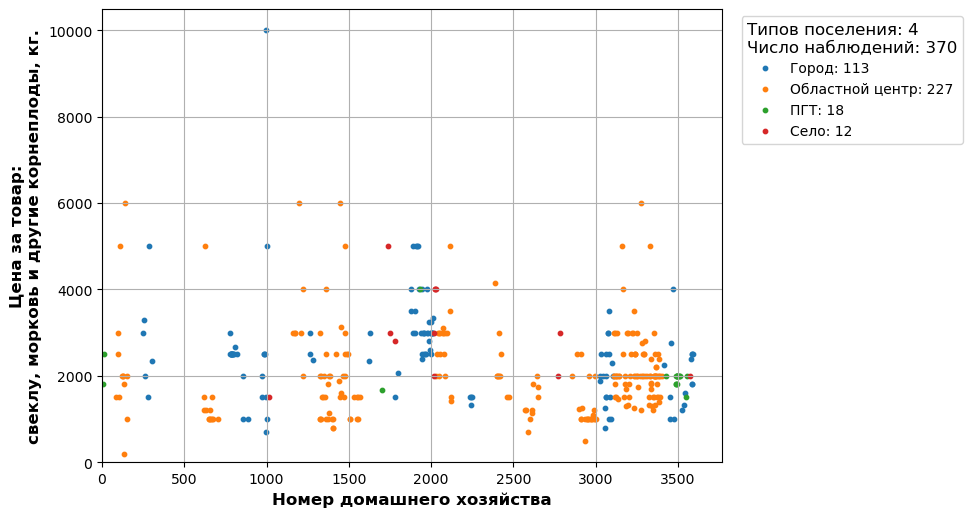

In [60]:
status_plot(1996, variable='price', plot_num=10)

## Аналог для работы непосредственно с датафреймом

In [57]:
def status_plot_from_df(df_all, variable, plot_num='all',zero_included=True):
    df_plot=food_df_from_df(df_all,variable)
    status_dict={}
    for i in df_all.status.cat.categories:
        status_dict[i]=list(df_all.loc[df_all['status'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.status.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 6), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.status.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Типов поселения: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

## FAST-аналоги

In [66]:
def FAST_region_plot(year, variable, plot_num='all'):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
    df_plot=food_df_from_df(df_all,variable)
    
    region_dict={}
    for i in df_all.region.cat.categories:
        region_dict[i]=list(df_all.loc[df_all['region'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 10), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.region.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 10), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.region.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(region_dict[df_all.region.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.region.cat.categories[i]+': '+str(len(good_index)),s=20)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.05, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

In [67]:
def FAST_status_plot(year, variable, plot_num='all'):
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    df_all=(FAST_HOUSEHOLDS_DFS[year]).copy(deep=True)
    df_plot=food_df_from_df(df_all,variable)

    status_dict={}
    for i in df_all.status.cat.categories:
        status_dict[i]=list(df_all.loc[df_all['status'] == i].index)
    
    name_dict={'prices':'Цена за товар:',
           'price':'Цена за товар:',
           'quant':'Количество товара:',
           'quants':'Количество товара:',
           'cost':'Затраты на товар:',
           'cost':'Затраты на товар:'}
    
    if plot_num=='all':
        for j in df_plot.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            q=0
            nums=0
            for i in range(len(df_all.status.cat.categories)):
                good_index=list(set(df_plot[j].dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
                if good_index==[]:
                    continue
                plt.scatter(good_index,df_plot.loc[good_index,j],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
                q=q+1
                nums=nums+len(good_index)
            plt.grid()
            plt.ylim(0)
            plt.xlim(0)
            plt.legend(bbox_to_anchor=(1.25, 1),title="Регионы: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            plt.ylabel(str(name_dict[variable])+'\n '+str(codebook[j]),fontsize='large',fontweight=700)
    plt.show()
    
    if plot_num!='all':
        if isinstance(plot_num, str):
            flag=False
            df_plot=df_plot.loc[:,plot_num]
        if isinstance(plot_num, int):
            flag=True
            df_plot=df_plot.iloc[:,plot_num]
        plt.figure(figsize=(8, 6), dpi=100)
        q=0
        nums=0
        for i in range(len(df_all.status.cat.categories)):
            good_index=list(set(df_plot.dropna().index)&set(status_dict[df_all.status.cat.categories[i]]))
            if good_index==[]:
                continue
            plt.scatter(good_index,df_plot[good_index],label=df_all.status.cat.categories[i]+': '+str(len(good_index)),s=10)
            q=q+1
            nums=nums+len(good_index)
        plt.grid()
        plt.ylim(0)
        plt.xlim(0)
        plt.legend(bbox_to_anchor=(1.40, 1),title="Типов поселения: {} \nЧисло наблюдений: {}".format(q,nums),title_fontsize='large')
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
        
        if flag==True:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[df_plot.name]),fontsize='large',fontweight=700)
        else:
            plt.ylabel(str(name_dict[variable])+'\n'+str(codebook[plot_num]),fontsize='large',fontweight=700)

### Примеры

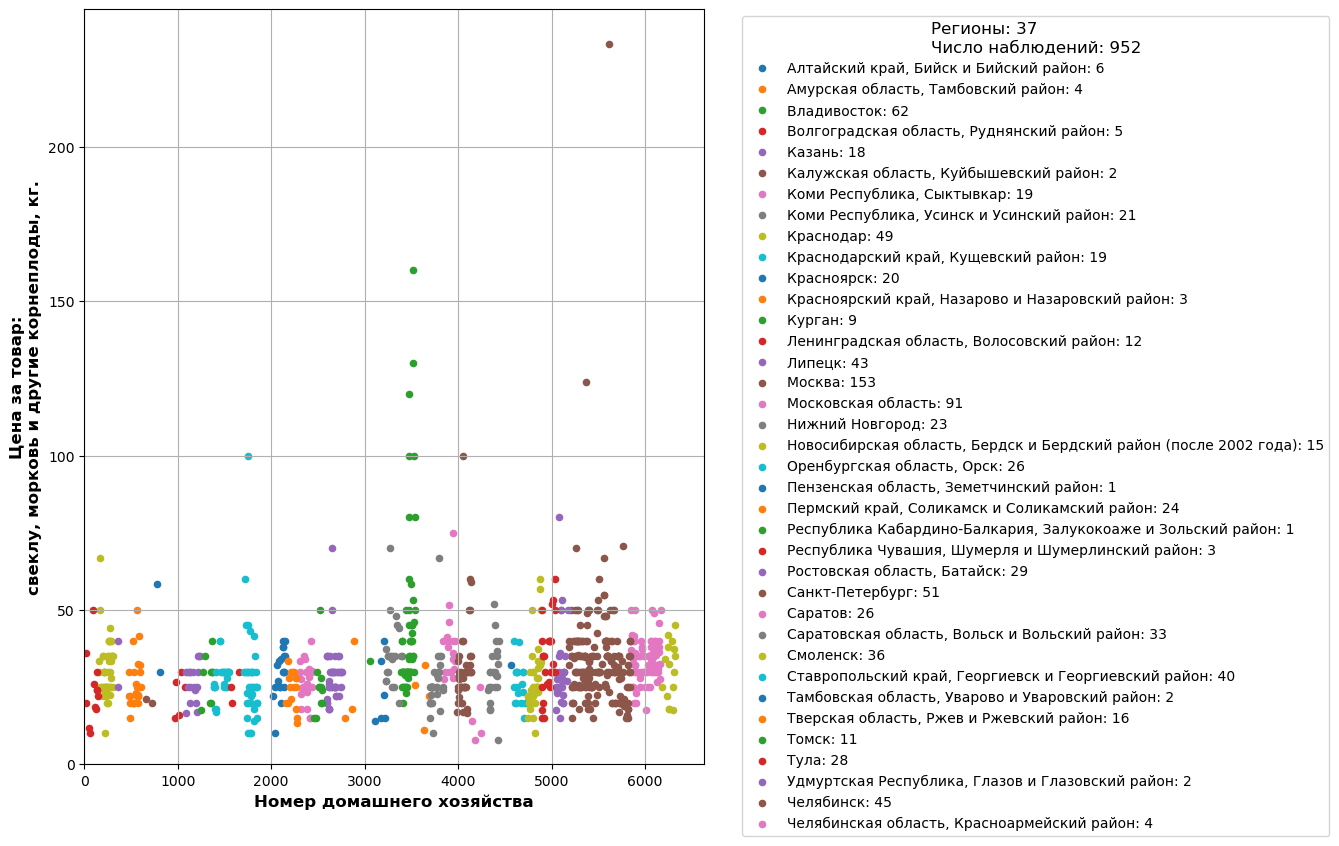

In [69]:
FAST_region_plot(2010, 'price', 10)

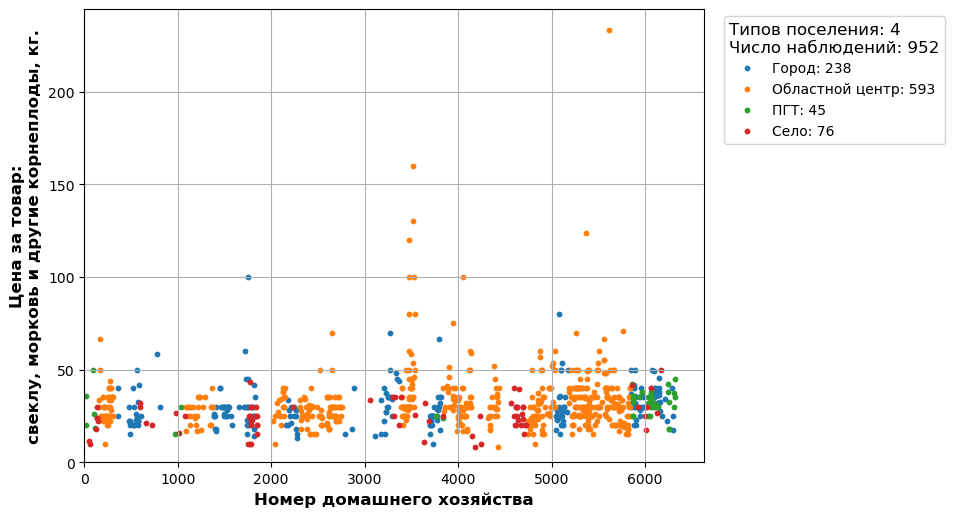

In [68]:
FAST_status_plot(2010, 'price', 10)

# Межпериодный фильтр на одинаковые домохозяйства
(Для работы с панельными данными)

In [70]:
def cross_period_household_filter(period):
    dict_hh=download_period(period)
    good_hh=set()
    good_hh=set(dict_hh[list(dict_hh.keys())[0]].iloc[:,0])
    for i in list(dict_hh.keys())[:-1]:
        good_hh=set(good_hh)&set(dict_hh[i+1].iloc[:,0])
    good_hh=list(good_hh)
    for i in dict_hh.keys():
        dict_hh[i]=dict_hh[i].loc[dict_hh[i].iloc[:,0].isin(good_hh)]
    return dict_hh

## Примеры

In [73]:
ex=cross_period_household_filter([2011,2012])

Загружен  2011
Загружен  2012


In [2107]:
ex[2012]

qredid_h      qid_h    pid_h    oid_h   nid_h     mid_h     lid_h  \
0       1799.0    10001.0  10001.0  10001.0  1001.0       NaN  101001.0   
3       1803.0    10010.0  10010.0  10010.0  1010.0  101011.0  101011.0   
4       1807.0    10014.0  10014.0  10014.0  1014.0  101304.0  101304.0   
5       1808.0    10016.0  10016.0  10016.0  1016.0  101306.0  101306.0   
7       1811.0    10020.0  10020.0      NaN     NaN       NaN       NaN   
...        ...        ...      ...      ...     ...       ...       ...   
6511    6121.0  1616001.0      NaN      NaN     NaN       NaN       NaN   
6512    6122.0  1616002.0      NaN      NaN     NaN       NaN       NaN   
6513    6123.0  1616003.0      NaN      NaN     NaN       NaN       NaN   
6514    6124.0  1616004.0      NaN      NaN     NaN       NaN       NaN   
6515    6125.0  1616005.0      NaN      NaN     NaN       NaN       NaN   

         kid_h    jid_h    iid_h  ...  qh6923.1  qh6913.2  qh6923.2  qh6913.3  \
0     101001.0  10101.0      NaN  ...       NaN       NaN       NaN       NaN   
3     101011.0  10111.0  10111.0  ...       NaN       NaN       NaN       NaN   
4     101304.0      NaN      NaN  ...       NaN       NaN       NaN       NaN   
5     101306.0      NaN      NaN  ...       NaN       NaN       NaN       NaN   
7          NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
...        ...      ...      ...  ...       ...       ...       ...       ...   
6511       NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6512       NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6513       NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6514       NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6515       NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   

      qh6923.3  qh6913.4  qh6923.4  qh6913.6 qh69136s  qh6923.6  
0          NaN       NaN       NaN       NaN                NaN  
3          NaN       NaN       NaN       NaN                NaN  
4          NaN       NaN       NaN       NaN                NaN  
5          NaN       NaN       NaN       NaN                NaN  
7          NaN       NaN       NaN       NaN                NaN  
...        ...       ...       ...       ...      ...       ...  
6511       NaN       NaN       NaN       NaN                NaN  
6512       NaN       NaN       NaN       NaN                NaN  
6513       NaN       NaN       NaN       NaN                NaN  
6514       NaN       NaN       NaN       NaN                NaN  
6515       NaN       NaN       NaN       NaN                NaN  

[4870 rows x 1507 columns]

## FAST-аналог

In [76]:
def FAST_cross_period_household_filter(period):
    dict_hh=FAST_download_period(period)
    good_hh=set()
    good_hh=set(dict_hh[list(dict_hh.keys())[0]].iloc[:,0])
    for i in list(dict_hh.keys())[:-1]:
        good_hh=set(good_hh)&set(dict_hh[i+1].iloc[:,0])
    good_hh=list(good_hh)
    for i in dict_hh.keys():
        dict_hh[i]=dict_hh[i].loc[dict_hh[i].iloc[:,0].isin(good_hh)]
    return dict_hh

### Пример

In [79]:
FAST_cross_period_household_filter([2011,2012,2013,2014])[2011]

Загружен  2011
Загружен  2012
Загружен  2013
Загружен  2014


predid_h      pid_h      oid_h   nid_h     mid_h     lid_h     kid_h  \
5       2581.0    10014.0    10014.0  1014.0  101304.0  101304.0  101304.0   
6       2582.0    10016.0    10016.0  1016.0  101306.0  101306.0  101306.0   
9       2587.0    10024.0    10024.0  1024.0  102007.0  102007.0  102007.0   
10      2589.0    10029.0    10029.0  1029.0  102013.0  102013.0  102013.0   
11      2590.0    10030.0    10030.0  1030.0       NaN       NaN  102014.0   
...        ...        ...        ...     ...       ...       ...       ...   
6315    3588.0  1610427.0  1610427.0     NaN       NaN       NaN       NaN   
6319    3590.0  1610445.0        NaN     NaN       NaN       NaN       NaN   
6323    5552.0  1610462.0  1610462.0     NaN       NaN       NaN       NaN   
6335    5554.0  1610508.0  1610508.0     NaN       NaN       NaN       NaN   
6336    5555.0  1610509.0  1610509.0     NaN       NaN       NaN       NaN   

        jid_h    iid_h    hid_h  ...  ph6923.1  ph6913.2  ph6923.2  ph6913.3  \
5         NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6         NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
9     10207.0  10207.0  10207.0  ...       NaN       NaN       NaN       NaN   
10    10213.0  10213.0  10213.0  ...       NaN       NaN       NaN       NaN   
11    10214.0      NaN      NaN  ...       NaN       NaN       NaN       NaN   
...       ...      ...      ...  ...       ...       ...       ...       ...   
6315      NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6319      NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6323      NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6335      NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   
6336      NaN      NaN      NaN  ...       NaN       NaN       NaN       NaN   

      ph6923.3  ph6913.4  ph6923.4 ph6913.6  ph69136s ph6923.6  
5          NaN       NaN       NaN      NaN                NaN  
6          NaN       NaN       NaN      NaN                NaN  
9          NaN       NaN       NaN      NaN                NaN  
10         NaN       NaN       NaN      NaN                NaN  
11         NaN       NaN       NaN      NaN                NaN  
...        ...       ...       ...      ...       ...      ...  
6315       NaN       NaN       NaN      NaN                NaN  
6319       NaN       NaN       NaN      NaN                NaN  
6323       NaN       NaN       NaN      NaN                NaN  
6335       NaN       NaN       NaN      NaN                NaN  
6336       NaN       NaN       NaN      NaN                NaN  

[2129 rows x 1510 columns]

# Агрегирование товаров в широкие категории

In [322]:
Bondarev_dict={'Бакалея':[1, 2, 3, 4, 5, 51],
               'Овощи-фрукты': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 52, 59],
               'Мясо-рыба':[21, 22, 23, 24, 25, 26, 27, 28, 29, 46, 47, 58],
               'Молоко':[30, 31, 32, 33, 34, 35, 36, 38, 39, 45],
               'Кондитерские изделия':[37, 40, 41, 42, 43, 44],
               'Алкоголь':[53, 54, 55, 56],
               'Неалкогольные напитки':[48, 49, 50]
}

## Функция, возвращающая фрейм данных агрегатов

In [87]:
def food_agregates(year, variable, style_of_agregation='Bondarev',total=False,del_zero=False):
    if style_of_agregation=='Bondarev':
        agr_dict=Bondarev_dict
    f_agr=food_df(year, variable,cleaned=True)
    for i in agr_dict.keys():
        f_agr[i]=0
    for i in agr_dict.keys():
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_agr.columns):
                continue
            f_agr[i]=f_agr[i]+f_agr['e1.{0}'.format(j)]
    f_agr=f_agr.loc[:,list(agr_dict.keys())]
    
    if del_zero==True:
        f_agr=f_agr[-(f_agr.sum(axis=1)==0)]
        f_agr=f_agr[-(f_agr==0).any(axis=1)]
    
    if total==True:
        f_agr['Сумма']=f_agr.sum(axis=1)
    return f_agr

### Примеры

In [89]:
food_agregates(2012,'costs')

Бакалея  Овощи-фрукты  Мясо-рыба  Молоко  Кондитерские изделия  \
3        10.4           0.0       46.0    83.0                   0.0   
4        46.0         224.0      605.0   270.0                 145.0   
5        60.0          70.0      330.0   141.0                 269.0   
9        15.0         242.0      450.0   206.0                   0.0   
10      644.0        1490.0     1990.0  1031.0                 462.0   
...       ...           ...        ...     ...                   ...   
6510    377.8         676.6     1497.0   460.6                 307.0   
6511    478.0         142.0     1874.0   507.0                 345.0   
6512    280.0         435.0     5550.0   450.0                 250.0   
6513    175.0           0.0      409.0   139.0                 340.0   
6514    728.0        1000.0     1620.0   226.0                 250.0   

      Алкоголь  Неалкогольные напитки  
3          0.0                    0.0  
4        300.0                    0.0  
5        360.0                    0.0  
9          0.0                  100.0  
10       250.0                  125.0  
...        ...                    ...  
6510       0.0                  182.0  
6511     141.0                  210.0  
6512     300.0                  130.0  
6513     132.0                  278.0  
6514       0.0                    0.0  

[5190 rows x 7 columns]

In [88]:
food_agregates(2012,'costs',del_zero=1)

Бакалея  Овощи-фрукты  Мясо-рыба  Молоко  Кондитерские изделия  \
10      644.0        1490.0     1990.0  1031.0                 462.0   
16      180.0         470.0     1395.0   754.0                  36.0   
23      373.0         136.0      420.0   537.0                 285.0   
25      366.0         612.0      902.0  1284.0                 259.0   
27      169.0          55.0      474.0   138.0                  74.0   
...       ...           ...        ...     ...                   ...   
6503     90.4         115.0      964.8   224.5                 137.6   
6504    206.0         562.0      850.0   300.7                 269.8   
6506    242.6         378.8      580.0   680.5                 120.2   
6511    478.0         142.0     1874.0   507.0                 345.0   
6512    280.0         435.0     5550.0   450.0                 250.0   

      Алкоголь  Неалкогольные напитки  
10       250.0                  125.0  
16       245.0                  332.0  
23       870.0                   54.0  
25       510.0                  178.0  
27       300.0                   48.0  
...        ...                    ...  
6503     116.0                   49.9  
6504     630.0                  163.0  
6506     270.0                  128.8  
6511     141.0                  210.0  
6512     300.0                  130.0  

[1419 rows x 7 columns]

## Функция, возвращающая фрейм данных долей агрегатов

In [90]:
def food_agregates_shares(year,del_zero=False):
    f_sh=food_agregates(year,'costs',total=1)

    f_sh=(f_sh.loc[:,f_sh.columns[0]:f_sh.columns[-1]]).div(f_sh.loc[:,f_sh.columns[-1]], axis='index')
    
    if del_zero==True:
        f_sh=f_sh[-(f_sh.sum(axis=1)==0)]
        f_sh=f_sh[-(f_sh==0).any(axis=1)]
    return f_sh

### Примеры

In [92]:
food_agregates_shares(2005,'costs')

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  Кондитерские изделия  \
1     0.037624      0.282178   0.239274  0.166997              0.273927   
2     0.073232      0.102213   0.392646  0.124026              0.174509   
3     0.030622      0.060241   0.612450  0.140060              0.015060   
4     0.276667      0.025000   0.390000  0.191667              0.058333   
5     0.071203      0.000000   0.474684  0.300633              0.082278   
...        ...           ...        ...       ...                   ...   
3150  0.068402      0.199029   0.324801  0.210062              0.116946   
3151  0.030115      0.146147   0.310009  0.041335              0.177148   
3153  0.043675      0.210843   0.112952  0.331325              0.060241   
3154  0.091174      0.165573   0.362144  0.092998              0.054705   
3155  0.016033      0.209192   0.319133  0.273935              0.181707   

      Алкоголь  Неалкогольные напитки  Сумма  
1     0.000000               0.000000    1.0  
2     0.089748               0.043627    1.0  
3     0.141566               0.000000    1.0  
4     0.000000               0.058333    1.0  
5     0.000000               0.071203    1.0  
...        ...                    ...    ...  
3150  0.000000               0.080759    1.0  
3151  0.236197               0.059049    1.0  
3153  0.150602               0.090361    1.0  
3154  0.000000               0.233406    1.0  
3155  0.000000               0.000000    1.0  

[2496 rows x 8 columns]

In [95]:
food_agregates_shares(2005,del_zero=1)

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  Кондитерские изделия  \
2     0.073232      0.102213   0.392646  0.124026              0.174509   
25    0.083538      0.054054   0.384111  0.187551              0.190827   
26    0.244220      0.030347   0.420520  0.030347              0.043353   
30    0.091997      0.056045   0.175528  0.129247              0.040637   
31    0.103157      0.070087   0.425966  0.142896              0.063283   
...        ...           ...        ...       ...                   ...   
3138  0.033564      0.140517   0.242408  0.213905              0.165823   
3144  0.212291      0.062384   0.302607  0.093110              0.092179   
3145  0.050633      0.217137   0.368062  0.134372              0.077897   
3151  0.030115      0.146147   0.310009  0.041335              0.177148   
3153  0.043675      0.210843   0.112952  0.331325              0.060241   

      Алкоголь  Неалкогольные напитки  Сумма  
2     0.089748               0.043627    1.0  
25    0.086814               0.013104    1.0  
26    0.101156               0.130058    1.0  
30    0.490744               0.015803    1.0  
31    0.117039               0.077572    1.0  
...        ...                    ...    ...  
3138  0.169819               0.033964    1.0  
3144  0.172253               0.065177    1.0  
3145  0.038948               0.112950    1.0  
3151  0.236197               0.059049    1.0  
3153  0.150602               0.090361    1.0  

[640 rows x 8 columns]

## FAST-аналоги

In [97]:
def FAST_food_agregates(year, variable, style_of_agregation='Bondarev',total=False,del_zero=False):
    if style_of_agregation=='Bondarev':
        agr_dict=Bondarev_dict
    f_agr=FAST_food_df(year, variable,cleaned=True)
    for i in agr_dict.keys():
        f_agr[i]=0
    if variable=='prices':
        for j in agr_dict[i]:
            return FAST_food_agregate_price(year)
    for i in agr_dict.keys():
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_agr.columns):
                continue
            f_agr[i]=f_agr[i]+f_agr['e1.{0}'.format(j)]
    f_agr=f_agr.loc[:,list(agr_dict.keys())]
    if del_zero==True:
        f_agr=f_agr[-(f_agr.sum(axis=1)==0)]
        f_agr=f_agr[-(f_agr==0).any(axis=1)]
    if total==True:
        f_agr['Сумма']=f_agr.sum(axis=1)
    return f_agr

In [288]:
def FAST_food_agregates_shares(year,del_zero=False,total=True):
    f_sh=FAST_food_agregates(year,'costs',total=1)
#     f_sh=(f_sh.loc[:,f_sh.columns[0]:f_sh.columns[-1]]).div(f_sh.columns[-1], axis='index')
#     f_sh=(f_sh.loc[:,'Бакалея':'Сумма']).div(f_sh['Сумма'], axis='index')
    f_sh=(f_sh.loc[:,f_sh.columns[0]:f_sh.columns[-1]]).div(f_sh.loc[:,f_sh.columns[-1]], axis='index')
    if del_zero==True:
        f_sh=f_sh[-(f_sh.sum(axis=1)==0)]
        f_sh=f_sh[-(f_sh==0).any(axis=1)]
    if total==False:
        f_sh=f_sh.iloc[:,:-1]
    return f_sh

### Примеры

In [99]:
FAST_food_agregates(2012,'costs',del_zero=1)

Бакалея  Овощи-фрукты  Мясо-рыба  Молоко  Кондитерские изделия  \
10      644.0        1490.0     1990.0  1031.0                 462.0   
16      180.0         470.0     1395.0   754.0                  36.0   
23      373.0         136.0      420.0   537.0                 285.0   
25      366.0         612.0      902.0  1284.0                 259.0   
27      169.0          55.0      474.0   138.0                  74.0   
...       ...           ...        ...     ...                   ...   
6503     90.4         115.0      964.8   224.5                 137.6   
6504    206.0         562.0      850.0   300.7                 269.8   
6506    242.6         378.8      580.0   680.5                 120.2   
6511    478.0         142.0     1874.0   507.0                 345.0   
6512    280.0         435.0     5550.0   450.0                 250.0   

      Алкоголь  Неалкогольные напитки  
10       250.0                  125.0  
16       245.0                  332.0  
23       870.0                   54.0  
25       510.0                  178.0  
27       300.0                   48.0  
...        ...                    ...  
6503     116.0                   49.9  
6504     630.0                  163.0  
6506     270.0                  128.8  
6511     141.0                  210.0  
6512     300.0                  130.0  

[1419 rows x 7 columns]

In [103]:
FAST_food_agregates_shares(2012,del_zero=1)

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  Кондитерские изделия  \
10    0.107477      0.248665   0.332109  0.172063              0.077103   
16    0.052755      0.137749   0.408851  0.220985              0.010551   
23    0.139439      0.050841   0.157009  0.200748              0.106542   
25    0.089029      0.148869   0.219411  0.312333              0.063002   
27    0.134340      0.043720   0.376789  0.109698              0.058824   
...        ...           ...        ...       ...                   ...   
6503  0.053233      0.067719   0.568131  0.132199              0.081027   
6504  0.069093      0.188496   0.285091  0.100855              0.090491   
6506  0.101045      0.157774   0.241576  0.283435              0.050065   
6511  0.129294      0.038410   0.506897  0.137138              0.093319   
6512  0.037863      0.058824   0.750507  0.060852              0.033807   

      Алкоголь  Неалкогольные напитки  Сумма  
10    0.041722               0.020861    1.0  
16    0.071805               0.097304    1.0  
23    0.325234               0.020187    1.0  
25    0.124057               0.043298    1.0  
27    0.238474               0.038156    1.0  
...        ...                    ...    ...  
6503  0.068308               0.029384    1.0  
6504  0.211303               0.054670    1.0  
6506  0.112458               0.053647    1.0  
6511  0.038139               0.056803    1.0  
6512  0.040568               0.017579    1.0  

[1419 rows x 8 columns]

# Статистика чистки

In [104]:
# Чистка от "Нет ответа"
# Чистка от "Затрудняюсь ответить"
# Чистка от нулевых сумм
# Чистка от нулевых агргегатов

In [117]:
def FAST_food_cleaning_counter(period,variables=['ЧИСЛО НАБЛЮДЕНИЙ','НЕТ ОТВЕТА',
                                                  'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                                  'НУЛЕВЫЕ АГРЕГАТЫ' ], result='dict'):
    df_dict=FAST_download_period(period)
    count_dft=pd.DataFrame(columns=period, index=[ *variables])
    count_dict={k:None for k in period}
    for i in period:
        count_dict[i]={l:None for l in variables}
        for j in variables:

#=============================================================================================================            
            if j=='ЧИСЛО НАБЛЮДЕНИЙ':
                count_dft.loc[j,i]=len(df_dict[i].index)
                (count_dict[i])[j]=len(df_dict[i].index)
#=============================================================================================================                 
            if j=='НЕТ ОТВЕТА':
#                 count_dft.loc[j,i]=FAST_food_df(i)
                
                len_no_answer=0
                set_1_2=[]
                
                for k in ['НЕТ ОТВЕТА',' НЕТ ОТВЕТА','НЕТ ОТВЕТА+E7898','нет ответа','ОТКАЗ ОТ ОТВЕТА']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                (count_dict[i])[j]=set_1_2
#=============================================================================================================              
            if j=='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':
#                 count_dft.loc[j,i]=FAST_food_df(i)
                
                len_dont_know=0
                set_1_2=[]
                for k in [' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                (count_dict[i])[j]=set_1_2
#=============================================================================================================
            if j=='НЕТ ОТВЕТА И ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':
                len_no_answer_and_dont_know=0
                set_1_2=[]
                
                len_no_answer=0
                set_1_2_no_answer=[]
                set_1_2_dont_know=[]
        
                for k in ['НЕТ ОТВЕТА',' НЕТ ОТВЕТА','НЕТ ОТВЕТА+E7898','нет ответа','ОТКАЗ ОТ ОТВЕТА']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                set_1_2_no_answer=set_1_2
                
                len_dont_know=0
                set_1_2=[]
                for k in [' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']:
                    set1=set(FAST_food_df(i,"costs",cleaned=0).loc[(FAST_food_df(i,"costs",cleaned=0)==(k)).any(axis=1)].index)
                    set2=set(FAST_food_df(i,"quants",cleaned=0).loc[(FAST_food_df(i,"quants",cleaned=0)==(k)).any(axis=1)].index)
                    set_1_2=list(set(set_1_2+list(set1)+list(set2)))
                    
                set_result=list(set(set_1_2_dont_know) | set(set_1_2_no_answer))
                
                (count_dict[i])[j]=set_result

#============================================================================================================= 
            if j=='НУЛЕВЫЕ АГРЕГАТЫ':
                set_0_agregates=list(FAST_food_agregates(i,'costs',total=False)[(FAST_food_agregates(i,'costs',total=False)==0).any(axis=1)].index)
                (count_dict[i])[j]=set_0_agregates
#=============================================================================================================
            

    
#=============================================================================================================        
    if result=='dict':
        return count_dict
    if result=='df':
        for i in period:
            all_indexes=[]
            for j in list(set(variables)-set(['ЧИСЛО НАБЛЮДЕНИЙ'])):
                all_indexes=set(all_indexes)|set(count_dict[i][j])

#=============================================================================================================
            for j in list(set(variables)-set(['ЧИСЛО НАБЛЮДЕНИЙ'])):
                unique_del1=all_indexes-set(count_dict[i][j])
                unique_del2=all_indexes-unique_del1
                unique_del2=list(unique_del2)
                count_dft.loc[j,i]=len(unique_del2)
#=============================================================================================================                
            resid_set=count_dict[i]['ЧИСЛО НАБЛЮДЕНИЙ']-len(list(all_indexes))
            count_dft.loc['ОСТАЛОСЬ НАБЛЮДЕНИЙ',i]=resid_set
            


        return count_dft

## Пример

In [118]:
FAST_food_cleaning_counter([2012,2013,2014],result='df')

Загружен  2012
Загружен  2013
Загружен  2014


2012  2013  2014
ЧИСЛО НАБЛЮДЕНИЙ      6516  6148  4872
НЕТ ОТВЕТА             198   223   228
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ  1170  1040   798
НУЛЕВЫЕ АГРЕГАТЫ      3771  3622  2903
ОСТАЛОСЬ НАБЛЮДЕНИЙ   1419  1316  1008

# Получение фрейма агрегированных цен

In [2347]:
Bondarev_dict

{'Бакалея': [1, 2, 3, 4, 5, 51],
 'Овощи-фрукты': [6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  52,
  59],
 'Мясо-рыба': [21, 22, 23, 24, 25, 26, 27, 28, 29, 46, 47, 58],
 'Молоко': [30, 31, 32, 33, 34, 35, 36, 38, 39, 45],
 'Кондитерские изделия': [37, 40, 41, 42, 43, 44],
 'Алкоголь': [53, 54, 55, 56],
 'Неалкогольные напитки': [48, 49, 50]}

## Датафрейм агрегированных цен

In [1375]:
def FAST_food_agregate_price(year,style_of_agregation='Bondarev',good_price_names=False):
    if style_of_agregation=='Bondarev':
        agr_dict=Bondarev_dict
    f_food=FAST_food_df(year, 'costs',cleaned=True).loc[(FAST_food_agregates(year, "costs",del_zero=1).index)]
    f_price=FAST_food_df(year, 'prices',cleaned=True).loc[(FAST_food_agregates(year, "costs",del_zero=1).index)]
    f_agr=FAST_food_agregates(year, "costs",del_zero=1)
    f_agr_P=f_agr.copy(deep=1)
    f_shares=f_food.copy(deep=1)
    for i in agr_dict.keys():
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_food.columns):
                continue
            f_shares.loc[:,'e1.{0}'.format(j)]=(f_food.loc[:,'e1.{0}'.format(j)]).div(f_agr.loc[:,i],axis='index')
    f_agr_price=(f_shares*f_price).fillna(0)
    for i in agr_dict.keys():
        q=0
        for j in agr_dict[i]:
            if 'e1.{}'.format(j) not in list(f_food.columns):
                continue
            q=q+f_agr_price.loc[:,'e1.{0}'.format(j)]
        f_agr_P.loc[:,i]=q
    if good_price_names==True:
        for i in f_agr_P.columns:
            f_agr_P=f_agr_P.rename({i : 'Цена на {0}'.format(i)},axis=1)
    return f_agr_P

### Пример

In [1299]:
np.log(FAST_food_agregate_price(2018))

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  Кондитерские изделия  \
26    4.029493      4.158883   5.724553  3.794175              6.192536   
35    4.664340      3.835297   5.760165  4.078768              6.096825   
37    4.627119      4.843729   5.707202  4.935856              5.089430   
38    4.045930      4.716750   5.722132  4.341357              5.174195   
44    4.320548      4.406719   5.471193  4.631869              5.259458   
...        ...           ...        ...       ...                   ...   
4798  4.605170      4.867265   5.319799  4.797615              3.465736   
4801  4.855360      4.355778   6.075492  5.261936              5.263694   
4804  4.518848      5.187688   5.704607  5.680874              5.298317   
4814  4.216145      6.115687   5.845856  5.378338              5.710776   
4823  5.349967      4.213735   4.934600  5.319670              5.387808   

      Алкоголь  Неалкогольные напитки  
26    4.876132               6.528484  
35    4.343805               4.135167  
37    4.744932               4.718499  
38    4.382027               4.982800  
44    4.189655               7.214887  
...        ...                    ...  
4798  4.605170               3.283414  
4801  6.502290               7.347050  
4804  4.813388               7.377759  
4814  5.749720               6.986113  
4823  4.847988               7.404666  

[813 rows x 7 columns]

In [1287]:
FAST_food_agregate_price(2018)

Бакалея  Овощи-фрукты   Мясо-рыба      Молоко  Кондитерские изделия  \
26     56.232394     64.000000  306.296296   44.441558            489.084767   
35    106.095506     46.307190  317.400821   59.072650            444.444444   
37    102.219149    126.941871  301.027508  139.192210            162.297297   
38     57.164352    111.804281  305.555556   76.811671            176.654378   
44     75.229814     82.000000  237.743629  102.705882            192.377129   
...          ...           ...         ...         ...                   ...   
4798  100.000000    129.964912  204.342723  121.220930             32.000000   
4801  128.426966     77.927438  435.063291  192.854542            193.193798   
4804   91.729885    179.054054  300.247525  293.205674            200.000000   
4814   67.771739    452.907125  345.798319  216.661931            302.105263   
4823  210.601322     67.608621  139.017568  204.316346            218.723404   

        Алкоголь  Неалкогольные напитки  
26    131.122472             684.360000  
35     77.000000              62.500000  
37    115.000000             112.000000  
38     80.000000             145.882353  
44     66.000000            1359.520000  
...          ...                    ...  
4798  100.000000              26.666667  
4801  666.666667            1551.612903  
4804  123.148148            1600.000000  
4814  314.102564            1081.509434  
4823  127.483675            1643.636364  

[813 rows x 7 columns]

# Получение индексов цен

## Индекс цен Стоуна

In [ ]:
def FAST_stone_price_index(year):
    return ((FAST_food_agregates_shares(year,del_zero=1,total=0)) * np.log(FAST_food_agregate_price(year))).sum(axis=1)

## Индекс цен Ласпейреса

In [ ]:
def FAST_Laspeyres_price_index(year):
    return (FAST_food_agregates_shares(year,del_zero=1,total=0).mean()*np.log(FAST_food_agregate_price(year))).sum(axis=1)

In [ ]:
def FAST_norm_stone_price_index(year):
    return ((FAST_food_agregates_shares(year,del_zero=1,total=0)) * np.log(FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean()))).sum(axis=1)

In [2191]:
FAST_norm_stone_price_index(2021)

5      -0.344484
16     -0.103786
36     -0.245155
73     -0.533810
74     -0.345794
          ...   
4811    0.254428
4813   -0.071931
4832    0.116111
4833   -0.275021
4834   -0.244224
Length: 703, dtype: float64

In [2184]:
FAST_stone_price_index(2012)

10      4.451664
16      5.137770
23      5.049183
25      4.554711
27      4.441080
          ...   
6503    4.799596
6504    5.271015
6506    4.653775
6511    4.563915
6512    5.007712
Length: 1415, dtype: float64

## Индекс цен Пааше

# Получение матрицы переменных, пригодной к AIDS-оценке

## Получение конечной матрицы

In [2197]:
def FAST_AIDS_matrix(year,price_index='Stone',add_index=False):
    aids_shares=FAST_food_agregates_shares(year,del_zero=True,total=0)
    aids_prices=np.log(FAST_food_agregate_price(year,good_price_names=1))
    
    if price_index=='Stone':
        aids_resid=pd.DataFrame(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])-FAST_stone_price_index(year),columns=['Остаток'])
    if price_index=='norm Stone':
        aids_resid=pd.DataFrame(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])-FAST_norm_stone_price_index(year),columns=['Остаток'])
    if price_index=='Laspeyres':
        aids_resid=pd.DataFrame(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])-FAST_Laspeyres_price_index(year),columns=['Остаток'])
    
    result=aids_shares.join(aids_prices).join(aids_resid)
    if add_index==True:
        if price_index=='Stone':
            result['Расходы']=np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])
            result['Индекс']=FAST_stone_price_index(year)
        if price_index=='Laspeyres':
            result['Расходы']=np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1])                        
            result['Индекс']=FAST_Laspeyres_price_index(year)
    result=sm.add_constant(result)
    return result

In [2098]:
FAST_AIDS_matrix(2021,add_index=True)

const   Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
5       1.0  0.034565      0.186001   0.564701  0.089004   
16      1.0  0.078289      0.149919   0.181195  0.202785   
36      1.0  0.110638      0.055504   0.288622  0.164477   
73      1.0  0.072850      0.082096   0.363407  0.167554   
74      1.0  0.059926      0.110481   0.106535  0.141060   
...     ...       ...           ...        ...       ...   
4811    1.0  0.035871      0.189509   0.233164  0.203046   
4813    1.0  0.100346      0.086505   0.179931  0.176471   
4832    1.0  0.087468      0.031960   0.275021  0.276703   
4833    1.0  0.129657      0.156483   0.143070  0.211624   
4834    1.0  0.103788      0.288355   0.155732  0.146689   

      Кондитерские изделия  Алкоголь  Неалкогольные напитки  Цена на Бакалея  \
5                 0.009073  0.060488               0.056168         4.339922   
16                0.084746  0.220541               0.082526         4.982258   
36                0.064755  0.240518               0.075486         4.373967   
73                0.026338  0.182124               0.105632         4.263581   
74                0.089273  0.473490               0.019236         4.071848   
...                    ...       ...                    ...              ...   
4811              0.142132  0.135364               0.060914         4.691290   
4813              0.013841  0.415225               0.027682         4.389660   
4832              0.089151  0.168209               0.071489         5.000243   
4833              0.053651  0.250373               0.055142         4.368595   
4834              0.065307  0.200944               0.039184         4.849588   

      Цена на Овощи-фрукты  Цена на Мясо-рыба  Цена на Молоко  \
5                 3.850235           5.623245        5.233980   
16                4.367099           5.285410        5.771368   
36                5.010635           5.750717        4.933956   
73                3.625932           5.766582        4.804873   
74                4.290847           5.404629        4.797133   
...                    ...                ...             ...   
4811              5.302200           5.990839        5.801273   
4813              4.788602           5.651139        5.267892   
4832              5.502332           5.831921        5.510723   
4833              4.514516           5.448890        5.342349   
4834              4.060683           5.804617        5.319596   

      Цена на Кондитерские изделия  Цена на Алкоголь  \
5                         4.430817          4.941642   
16                        5.714832          5.212631   
36                        5.577031          4.867534   
73                        3.850148          4.174387   
74                        5.005688          5.277973   
...                            ...               ...   
4811                      6.420052          6.348139   
4813                      5.298317          5.564946   
4832                      6.068460          5.521461   
4833                      5.886104          4.787492   
4834                      5.623740          5.298317   

      Цена на Неалкогольные напитки   Остаток   Расходы    Индекс  
5                          7.863267  3.151869  8.440096  5.288227  
16                         7.168862  3.110030  8.508354  5.398324  
36                         7.002233  3.301297  8.595080  5.293783  
73                         6.927592  3.077640  8.180041  5.102401  
74                         5.743003  3.280767  8.307706  5.026939  
...                             ...       ...       ...       ...  
4811                       4.499810  2.197479  7.991254  5.793775  
4813                       4.382027  2.662507  7.969012  5.306505  
4832                       6.887793  2.986192  8.690306  5.704114  
4833                       7.387843  3.706514  8.811354  5.104840  
4834                       7.396310  4.125334  9.205629  5.080295  

[703 rows x 18 columns]

### Пример

In [194]:
FAST_AIDS_matrix(2021)

const   Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
5       1.0  0.034565      0.186001   0.564701  0.089004   
16      1.0  0.078289      0.149919   0.181195  0.202785   
36      1.0  0.110638      0.055504   0.288622  0.164477   
73      1.0  0.072850      0.082096   0.363407  0.167554   
74      1.0  0.059926      0.110481   0.106535  0.141060   
...     ...       ...           ...        ...       ...   
4811    1.0  0.035871      0.189509   0.233164  0.203046   
4813    1.0  0.100346      0.086505   0.179931  0.176471   
4832    1.0  0.087468      0.031960   0.275021  0.276703   
4833    1.0  0.129657      0.156483   0.143070  0.211624   
4834    1.0  0.103788      0.288355   0.155732  0.146689   

      Кондитерские изделия  Алкоголь  Неалкогольные напитки  Цена на Бакалея  \
5                 0.009073  0.060488               0.056168         4.339922   
16                0.084746  0.220541               0.082526         4.982258   
36                0.064755  0.240518               0.075486         4.373967   
73                0.026338  0.182124               0.105632         4.263581   
74                0.089273  0.473490               0.019236         4.071848   
...                    ...       ...                    ...              ...   
4811              0.142132  0.135364               0.060914         4.691290   
4813              0.013841  0.415225               0.027682         4.389660   
4832              0.089151  0.168209               0.071489         5.000243   
4833              0.053651  0.250373               0.055142         4.368595   
4834              0.065307  0.200944               0.039184         4.849588   

      Цена на Овощи-фрукты  Цена на Мясо-рыба  Цена на Молоко  \
5                 3.850235           5.623245        5.233980   
16                4.367099           5.285410        5.771368   
36                5.010635           5.750717        4.933956   
73                3.625932           5.766582        4.804873   
74                4.290847           5.404629        4.797133   
...                    ...                ...             ...   
4811              5.302200           5.990839        5.801273   
4813              4.788602           5.651139        5.267892   
4832              5.502332           5.831921        5.510723   
4833              4.514516           5.448890        5.342349   
4834              4.060683           5.804617        5.319596   

      Цена на Кондитерские изделия  Цена на Алкоголь  \
5                         4.430817          4.941642   
16                        5.714832          5.212631   
36                        5.577031          4.867534   
73                        3.850148          4.174387   
74                        5.005688          5.277973   
...                            ...               ...   
4811                      6.420052          6.348139   
4813                      5.298317          5.564946   
4832                      6.068460          5.521461   
4833                      5.886104          4.787492   
4834                      5.623740          5.298317   

      Цена на Неалкогольные напитки   Остаток  
5                          7.863267  3.151869  
16                         7.168862  3.110030  
36                         7.002233  3.301297  
73                         6.927592  3.077640  
74                         5.743003  3.280767  
...                             ...       ...  
4811                       4.499810  2.197479  
4813                       4.382027  2.662507  
4832                       6.887793  2.986192  
4833                       7.387843  3.706514  
4834                       7.396310  4.125334  

[703 rows x 16 columns]

In [776]:
FAST_AIDS_matrix(year=1994,price_index='Laspeyres')

const   Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
0       1.0  0.036825      0.147300   0.220949  0.177578   
1       1.0  0.195064      0.169851   0.138004  0.179140   
5       1.0  0.059192      0.162022   0.086412  0.118816   
7       1.0  0.042804      0.104869   0.520599  0.103799   
14      1.0  0.099818      0.162266   0.468112  0.150760   
...     ...       ...           ...        ...       ...   
3957    1.0  0.169053      0.022354   0.234719  0.128187   
3964    1.0  0.032632      0.326323   0.072516  0.110950   
3965    1.0  0.077147      0.021834   0.147016  0.231441   
3967    1.0  0.303753      0.058602   0.255337  0.273476   
3973    1.0  0.174200      0.101192   0.248107  0.323814   

      Кондитерские изделия  Алкоголь  Неалкогольные напитки  Цена на Бакалея  \
0                 0.065466  0.106383               0.245499         6.571283   
1                 0.270701  0.018577               0.028662         6.870833   
5                 0.194426  0.173904               0.205228         7.216313   
7                 0.046014  0.074906               0.107009         6.666593   
14                0.038108  0.033240               0.047696         6.872562   
...                    ...       ...                    ...              ...   
3957              0.050297  0.345093               0.050297         7.357794   
3964              0.367658  0.063814               0.026106         7.402452   
3965              0.160116  0.269287               0.093159         6.706660   
3967              0.050230  0.041859               0.016743         7.300991   
3973              0.073982  0.056218               0.022487         7.637071   

      Цена на Овощи-фрукты  Цена на Мясо-рыба  Цена на Молоко  \
0                 8.493096           9.844366        8.967300   
1                 7.377759           8.797153        8.281315   
5                 8.006368           8.987197        8.443318   
7                 8.610646           8.551762        8.016284   
14                7.409081           8.388596        7.986404   
...                    ...                ...             ...   
3957              7.377759           8.482676        8.221230   
3964              8.588652           8.517193        8.224514   
3965              6.620073           8.847423        7.974733   
3967              8.017417           9.214104        8.750287   
3973              8.265879           9.020255        8.802309   

      Цена на Кондитерские изделия  Цена на Алкоголь  \
0                         9.210340          8.559537   
1                         7.658061          8.455318   
5                         9.349136          8.742613   
7                         8.631352          9.210340   
14                        9.697336          7.487356   
...                            ...               ...   
3957                      7.495542          8.845769   
3964                      9.366191          9.082507   
3965                      8.636994          8.633527   
3967                      7.495542          7.313220   
3973                      9.232206          7.313220   

      Цена на Неалкогольные напитки   Остаток  
0                          8.006368  2.866573  
1                          8.802651  4.686847  
5                         10.043059  2.773687  
7                          8.665613  3.097968  
14                         8.929956  4.095689  
...                             ...       ...  
3957                      10.599132  3.637683  
3964                       9.392662  3.265922  
3965                      10.548707  2.896809  
3967                       8.699515  2.827230  
3973                       7.600902  3.993499  

[572 rows x 16 columns]

# Детекция выбросов

## Универсальный детектор

In [1198]:
def FAST_outlier_detection(year, variable='agregate_prices', n_neighbors=30, contamination='auto',output='df'):
    if variable=='agregate_prices' or variable=='agregate_price':
        X=FAST_food_agregate_price(year=year)

    if variable=='price' or variable=='prices':
        X=FAST_food_df(year=year, variable=variable, cleaned=1,rename_del='names',del_zero=True)
    
    ind=X.index
    X_final=X.copy(deep=1)
    
    clf = LocalOutlierFactor(n_neighbors=n_neighbors,contamination=contamination)
    for i in X.columns:
        Y=np.array(X[i]).reshape(-1, 1)
        out=clf.fit_predict(Y)
        X_final.loc[:,i]=pd.Series(out,index=ind)
          
    if output=='df':
        return X_final
    if output=='bad':
        return X_final[(X_final!=1).any(axis=1)].index
    if output=='good':
        return X_final[X_final!=-1].dropna().index
    if output=="good_df":
        return X.loc[X_final[X_final!=-1].dropna().index,:]
    if output=="bad_df":
        return X.loc[X_final[(X_final!=1).any(axis=1)].index,:]
    if output=="plot":
        for i in X.columns:
            plt.figure(figsize=(8, 6), dpi=100)
            plt.grid()
            k=X.loc[X_final[X_final!=-1].dropna().index,:][i]
            k_bad=X.loc[X_final[(X_final!=1).any(axis=1)].index,:][i]
            plt.scatter(k.index,k,label='НЕвыбросы:'+str(len(k.index)),s = 10)
            plt.scatter(k_bad.index,k_bad,label='Выбросы:'+str(len(k_bad.index)),c='r',s = 10)
            plt.legend(bbox_to_anchor=(1, 1))
            plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            
            if variable=='agregate_prices':
                plt.ylabel('Цена на товар:\n{}'.format(i),fontsize='large',fontweight=700)

## Построения графиков для выбросов

In [1263]:
def food_price_outliers_plot(year,n_neighbors,good='all',contamination='auto'):
    X=FAST_food_df(year=year, variable='price', cleaned=1,rename_del='names',del_zero=True)
    ind=X.index
    X_final=X.copy(deep=1)
    X_dict={}
    
    clf = LocalOutlierFactor(n_neighbors=n_neighbors,contamination=contamination)
    for i in X.columns:
        Y=np.array(X[i].dropna()).reshape(-1, 1)
        out=clf.fit_predict(Y)
        X_dict[i]=pd.Series(out,index=X[i].dropna().index)
        
    if good=='all':  
   
        for i in X_dict.keys():
                plt.figure(figsize=(8, 6), dpi=100)
            
                k=X.loc[X_dict[i][(X_dict[i]==1)].index,:][i]
            
                k_bad=X.loc[X_dict[i][X_dict[i]==-1].index,:][i]
            
                plt.scatter(k.index,k,label='НЕвыбросы:'+str(len(k.index)),s = 10)
                plt.scatter(k_bad.index,k_bad,label='Выбросы:'+str(len(k_bad.index)),c='r',s = 10)
                plt.legend(bbox_to_anchor=(1, 1))
                plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
                plt.ylabel('Цена на товар:\n{}'.format(i),fontsize='large',fontweight=700)
                plt.grid()
    else:
        plt.figure(figsize=(8, 6), dpi=100)
        plt.grid(zorder=0)
        k=X.loc[X_dict[codebook['e1.{}'.format(good)]][(X_dict[codebook['e1.{}'.format(good)]]==1)].index,:][codebook['e1.{}'.format(good)]]
            
        k_bad=X.loc[X_dict[codebook['e1.{}'.format(good)]][X_dict[codebook['e1.{}'.format(good)]]==-1].index,:][codebook['e1.{}'.format(good)]]
            
        plt.scatter(k.index,k,label='НЕвыбросы:'+str(len(k.index)),s = 10,zorder=1)
        plt.scatter(k_bad.index,k_bad,label='Выбросы:'+str(len(k_bad.index)),c='r',s = 10,zorder=2)
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlabel('Номер домашнего хозяйства',fontsize='large',fontweight=700)
            
        plt.ylabel("Цена на товар:"+'\n'+str(codebook['e1.{}'.format(good)]),fontsize='large',fontweight=700)

## Примеры

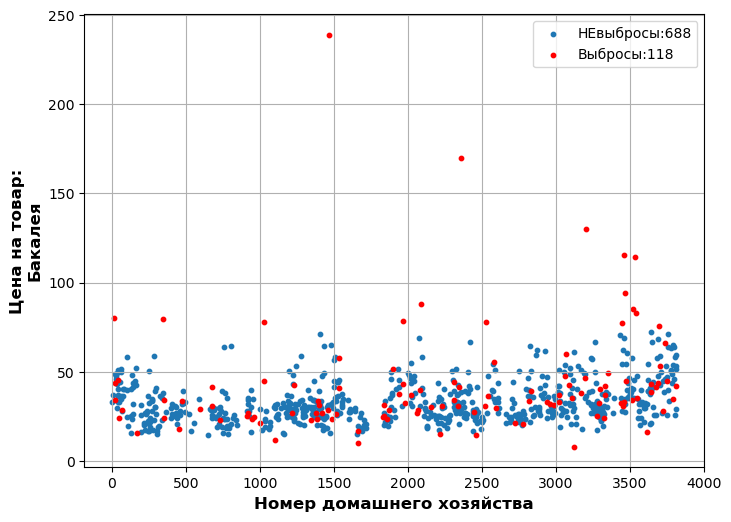

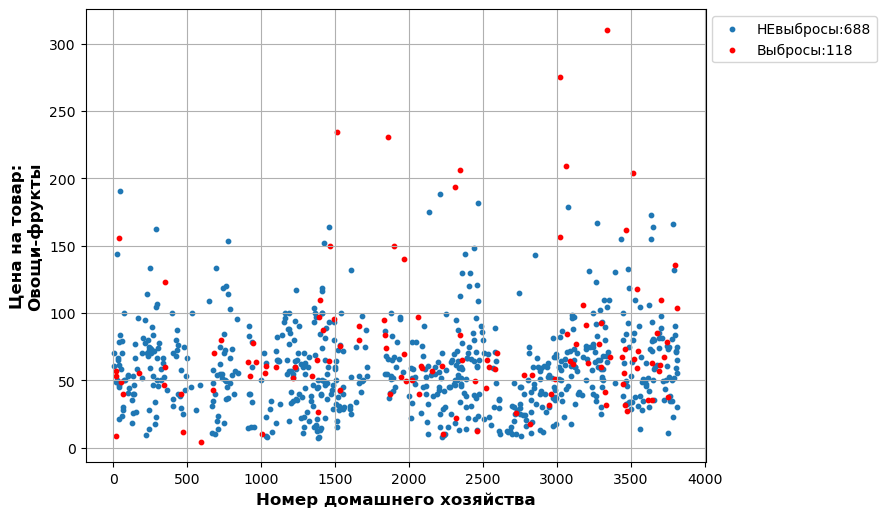

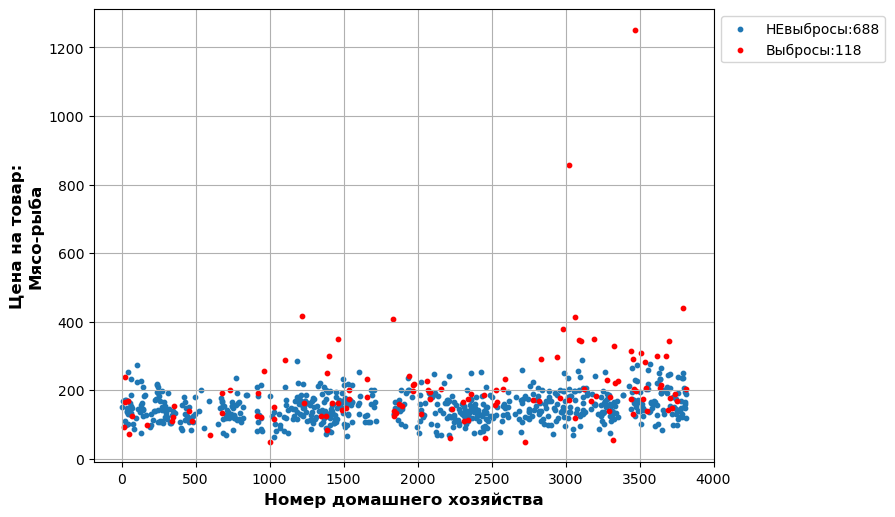

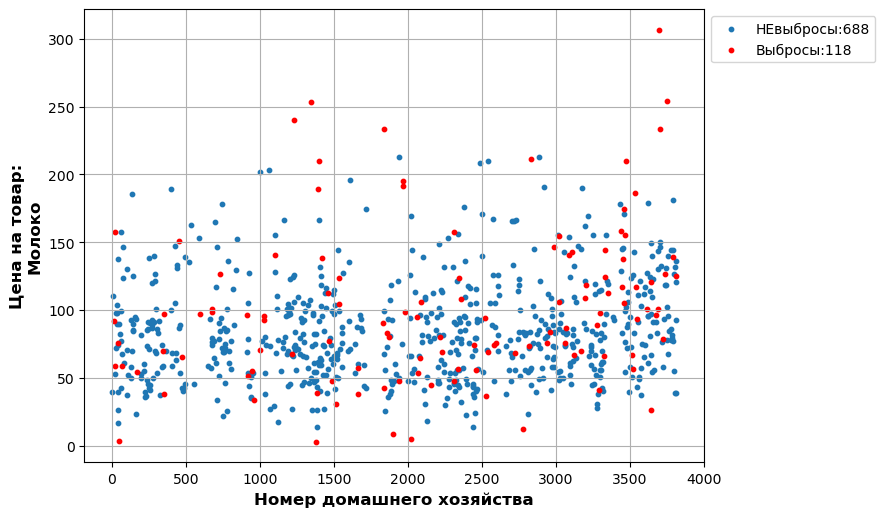

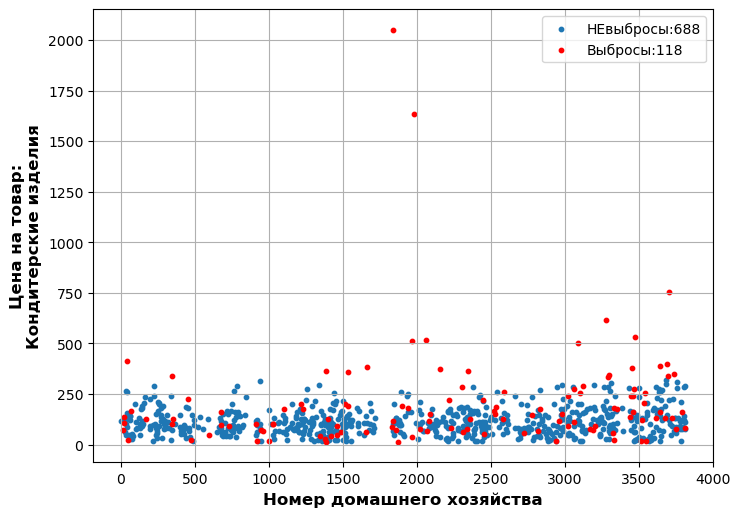

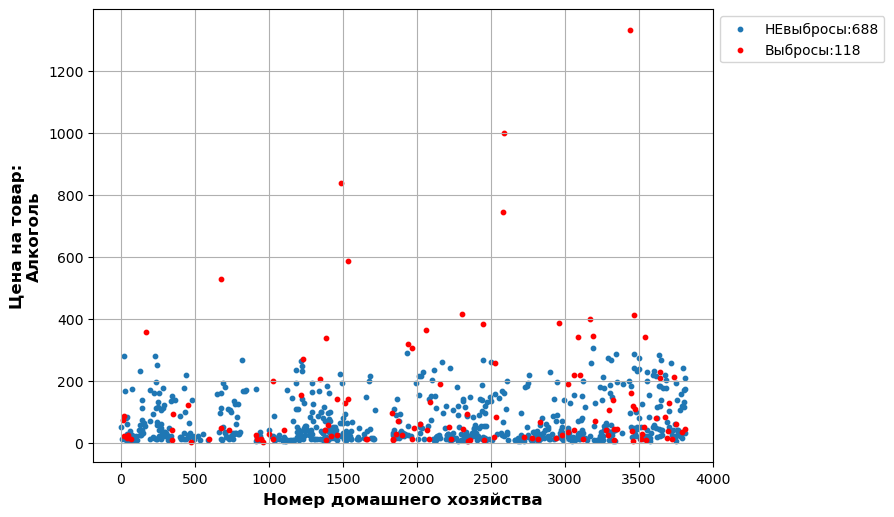

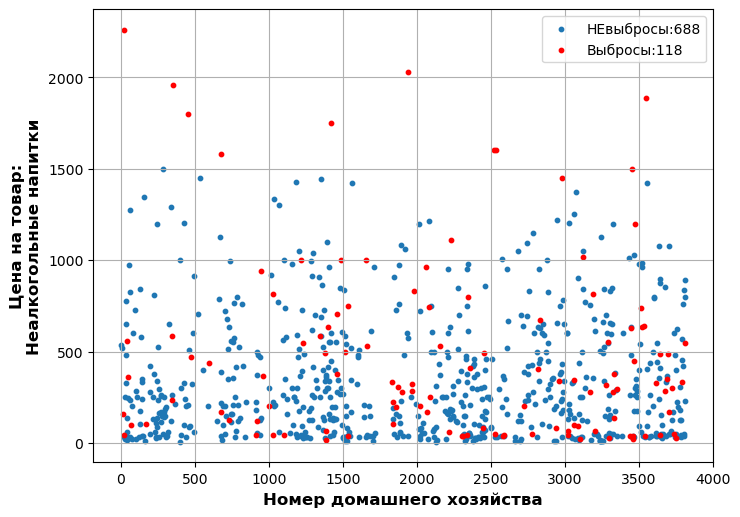

In [1208]:
FAST_outlier_detection(2008, n_neighbors=30,output='plot')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (700) is greater than the total number of samples (686). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (700) is greater than the total number of samples (636). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (700) is greater than the total number of samples (133). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (700) is greater than the total number of samples (669). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:284

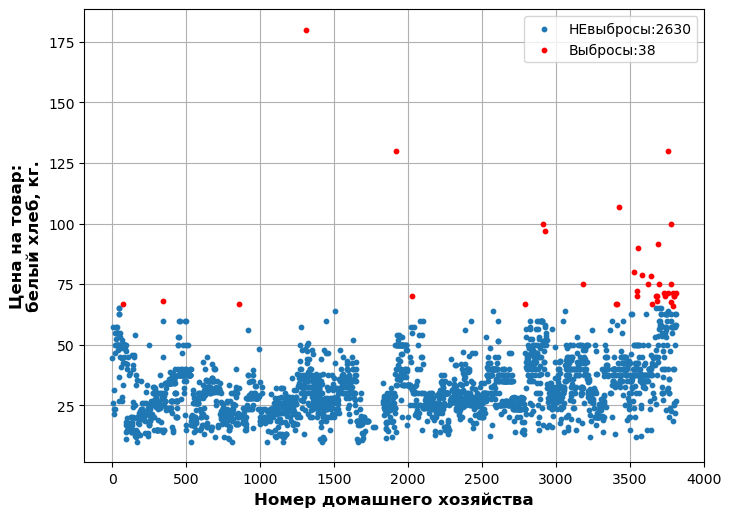

In [1267]:
food_price_outliers_plot(2008,good=1,n_neighbors=700,contamination=0.015)

In [1426]:
FAST_outlier_detection(2008, n_neighbors=10,output='bad_df')

Бакалея  Овощи-фрукты   Мясо-рыба      Молоко  Кондитерские изделия  \
4     32.957317     60.966728  150.677966   39.660584            114.387755   
9     36.811391     70.000000  169.762675  110.359773            117.712246   
17    80.387597     53.101504   91.504425   92.185185             70.950233   
21    34.276465      8.666667  166.447602   58.462312            138.090909   
23    48.762264     49.108696  109.453372   52.592339            114.572770   
...         ...           ...         ...         ...                   ...   
3778  63.246491     34.822283  169.096045   86.312045             75.000000   
3785  49.002146    165.970238  122.183529   79.577876             80.000000   
3794  34.646465    135.714286  440.946667  139.272491            160.769231   
3804  58.333333     70.872881  195.796646  131.662745            284.869792   
3812  42.172458    103.481848  203.800000  125.146857             84.166667   

        Алкоголь  Неалкогольные напитки  
4      50.190476             537.598200  
9      10.714286             520.000000  
17     73.748503             160.310559  
21     84.848073            2260.000000  
23    280.000000              34.000000  
...          ...                    ...  
3778   20.000000             306.698630  
3785  157.440313              32.000000  
3794   32.857143             332.857143  
3804  114.000000              36.000000  
3812   43.538462             548.520548  

[289 rows x 7 columns]

In [1427]:
FAST_outlier_detection(2018, n_neighbors=10,output='good_df')

Бакалея  Овощи-фрукты   Мясо-рыба      Молоко  Кондитерские изделия  \
38     57.164352    111.804281  305.555556   76.811671            176.654378   
44     75.229814     82.000000  237.743629  102.705882            192.377129   
46     89.619687     85.000000  224.067797  199.439024            248.965517   
55     80.000000     80.000000  264.074074  115.000000            150.000000   
80     62.500000     75.000000  260.000000  500.000000            125.000000   
...          ...           ...         ...         ...                   ...   
4776   91.806723     35.891632  504.620503  156.178723            890.156028   
4785   75.000000    107.228682  280.392157  126.083969            200.000000   
4790   73.844581    213.820717  365.529412  319.130435             98.000000   
4801  128.426966     77.927438  435.063291  192.854542            193.193798   
4814   67.771739    452.907125  345.798319  216.661931            302.105263   

        Алкоголь  Неалкогольные напитки  
38     80.000000             145.882353  
44     66.000000            1359.520000  
46     60.000000             650.000000  
55     65.000000            2400.000000  
80     91.842105            2607.932961  
...          ...                    ...  
4776  477.895753             100.000000  
4785   80.000000            1086.222222  
4790  227.976190            2000.000000  
4801  666.666667            1551.612903  
4814  314.102564            1081.509434  

[467 rows x 7 columns]

In [1428]:
FAST_outlier_detection(1994, n_neighbors=10,output='df')

Бакалея  Овощи-фрукты  Мясо-рыба  Молоко  Кондитерские изделия  \
0           1            -1         -1       1                     1   
1           1             1          1       1                     1   
5           1             1          1       1                     1   
7           1             1          1       1                     1   
14          1             1          1       1                     1   
...       ...           ...        ...     ...                   ...   
3957        1             1          1       1                     1   
3964        1             1          1       1                     1   
3965        1             1          1       1                     1   
3967        1            -1          1       1                     1   
3973        1             1          1       1                    -1   

      Алкоголь  Неалкогольные напитки  
0            1                      1  
1            1                      1  
5            1                      1  
7            1                      1  
14           1                      1  
...        ...                    ...  
3957         1                      1  
3964         1                      1  
3965         1                      1  
3967         1                      1  
3973         1                      1  

[572 rows x 7 columns]

In [1429]:
FAST_outlier_detection(2000, n_neighbors=40,output='bad')

Int64Index([  98,  103,  107,  110,  143,  147,  149,  159,  216,  298,
            ...
            3182, 3183, 3194, 3198, 3247, 3248, 3253, 3273, 3293, 3297],
           dtype='int64', length=129)

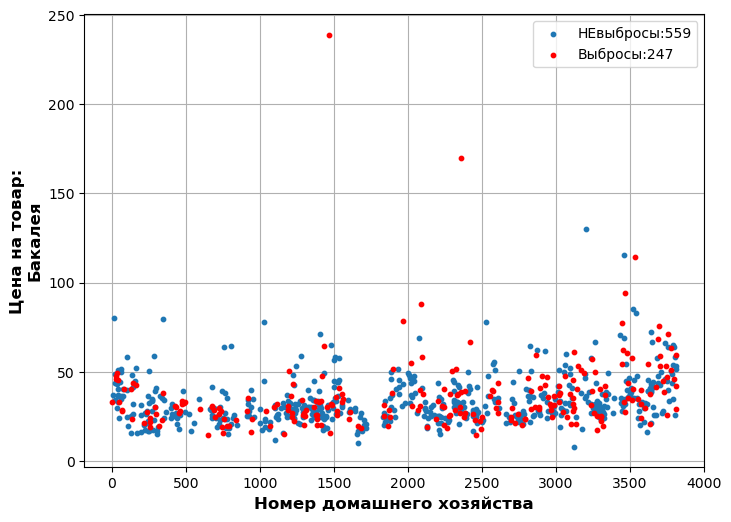

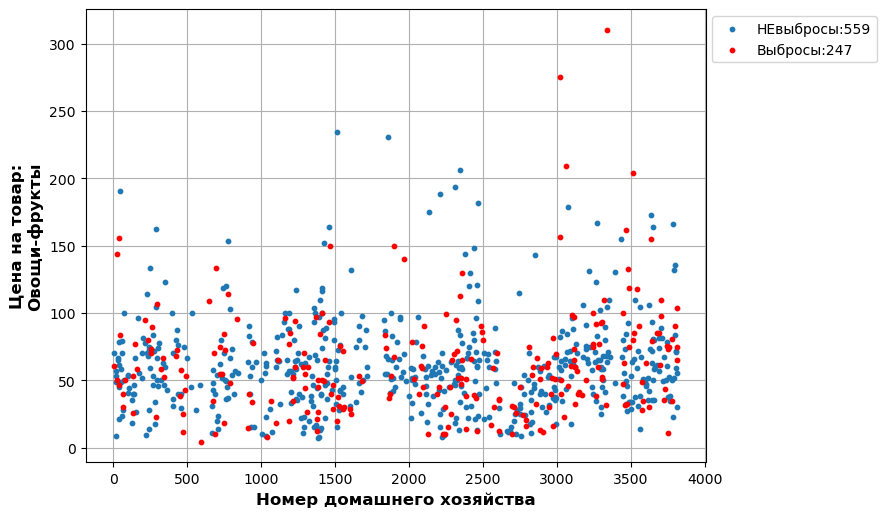

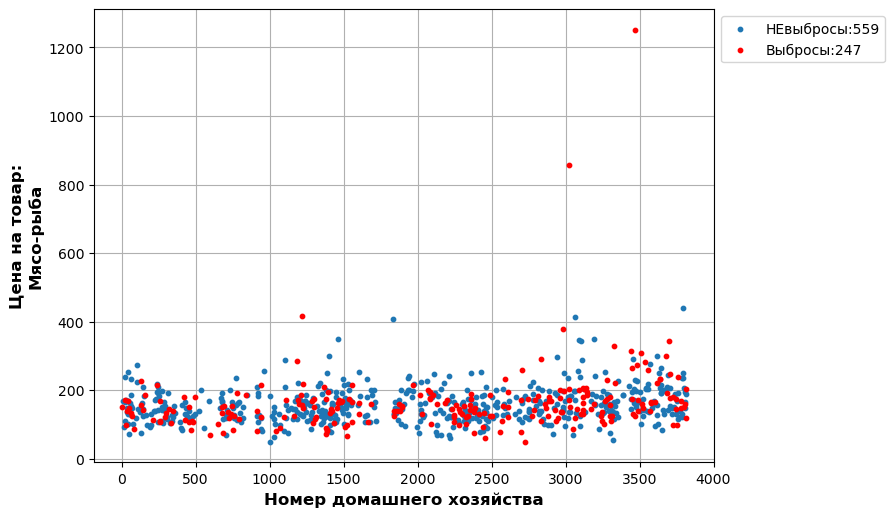

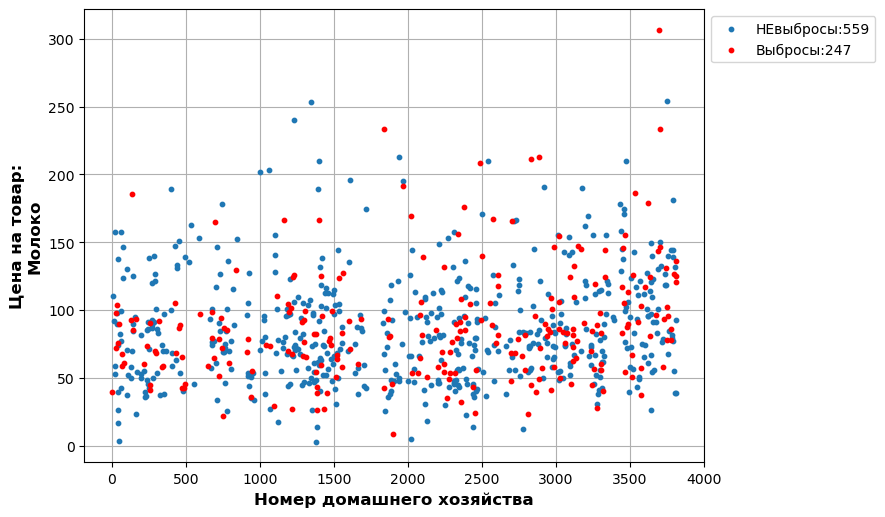

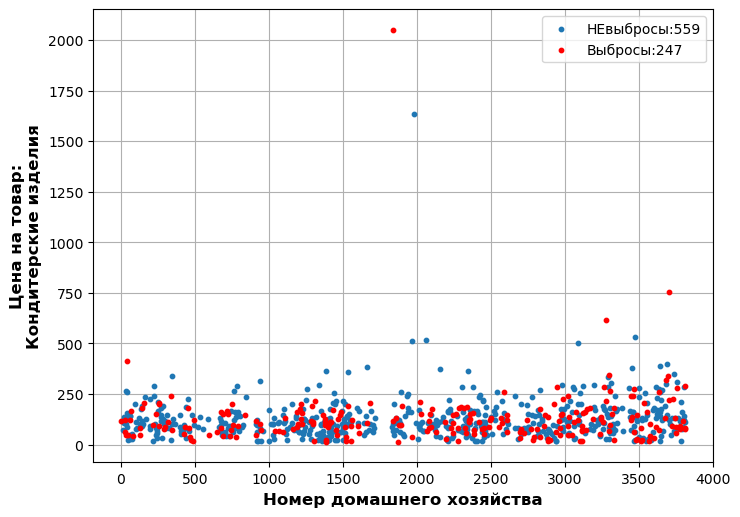

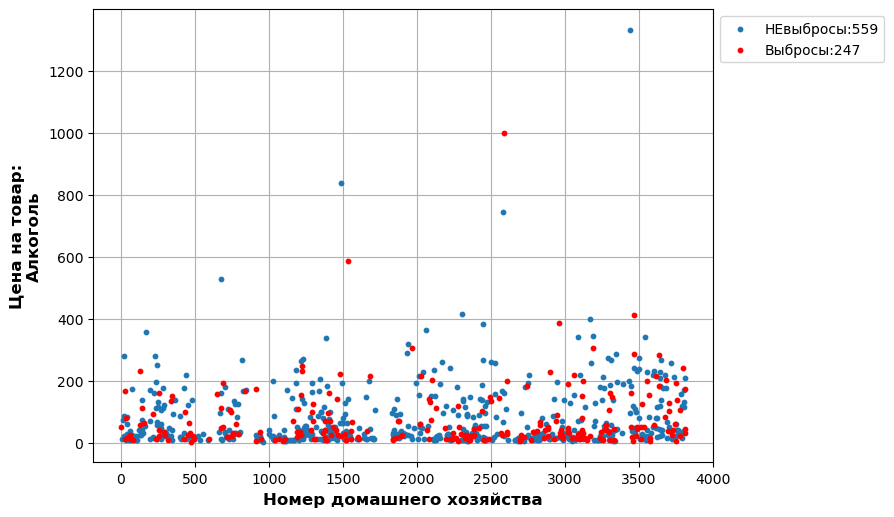

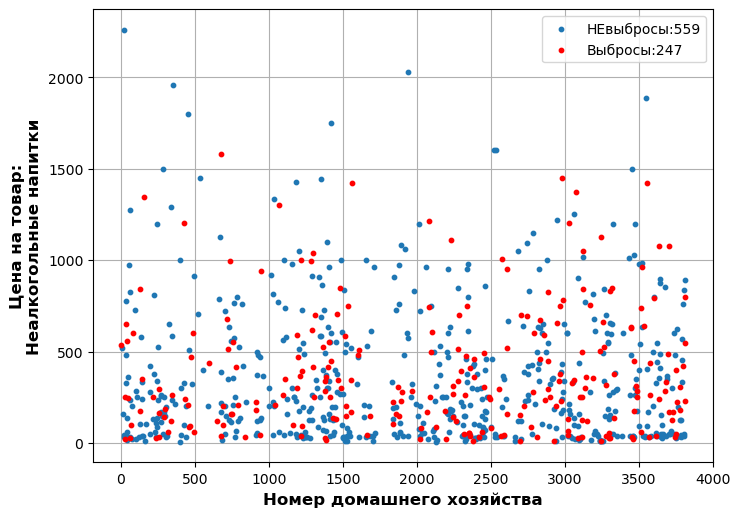

In [1270]:
FAST_outlier_detection(2008, n_neighbors=2,output='plot',contamination=0.05)

# SUR-оценка модели  AIDS

In [2143]:
def FAST_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto',homo=True, sym=True):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year=year,price_index=price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#7
#     equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    if constrained==True:
        if (homo==True) and (sym==True):
            mod=SUR(equations)
            mod.add_constraints(both_r)
        else:
            if homo==True:
                mod=SUR(equations)
                mod.add_constraints(homo_r)
            if sym==True:
                mod=SUR(equations)
                mod.add_constraints(sym_r)
        
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

## Примеры

In [2198]:
FAST_AIDS(2021,price_index='norm Stone')

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0699
No. Equations.:                     6   McElroy's R-squared:                 0.1093
No. Observations:                 703   Judge's (OLS) R-squared:             0.0699
Date:                Fri, Sep 16 2022   Berndt's R-squared:                  0.4888
Time:                        18:41:15   Dhrymes's R-squared:                 0.0699
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2994     0.0510     5.8686     0.0000      0.1994      0.3994
Цена на Бакалея                   0.0109     0.0044     2.4666     0.0136      0.0022      0.0196
Цена на Овощи-фрукты             -0.0069     0.0027    -2.5702     0.0102     -0.0122     -0.0016
Цена на Мясо-рыба                -0.0172     0.0054    -3.1607     0.0016     -0.0278     -0.0065
Цена на Молоко                   -0.0115     0.0036    -3.2138     0.0013     -0.0185     -0.0045
Цена на Кондитерские изделия     -0.0049     0.0031    -1.5607     0.1186     -0.0110      0.0013
Цена на Алкоголь                 -0.0034     0.0027    -1.2764     0.2018     -0.0086      0.0018
Цена на Неалкогольные напитки     0.0030     0.0012     2.4729     0.0134      0.0006      0.0053
Остаток                          -0.0063     0.0035    -1.8210     0.0686     -0.0132      0.0005
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0690     0.0894    -0.7718     0.4402     -0.2443      0.1062
Цена на Бакалея                   0.0178     0.0089     2.0010     0.0454      0.0004      0.0351
Цена на Овощи-фрукты              0.0141     0.0061     2.3261     0.0200      0.0022      0.0260
Цена на Мясо-рыба                 0.0009     0.0122     0.0703     0.9439     -0.0230      0.0248
Цена на Молоко                   -0.0020     0.0058    -0.3426     0.7319     -0.0133      0.0093
Цена на Кондитерские изделия     -0.0014     0.0056    -0.2557     0.7982     -0.0124      0.0096
Цена на Алкоголь                 -0.0017     0.0044    -0.3913     0.6956     -0.0103      0.0069
Цена на Неалкогольные напитки    -0.0048     0.0024    -1.9929     0.0463     -0.0096  -8.007e-05
Остаток                           0.0125     0.0100     1.2601     0.2076     -0.0070      0.0321
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0120     0.1128    -0.1060     0.9156     -0.2330      0.2091
Цена на Бакалея                  -0.0271     0.0134    -2.0245     0.0429     -0.0533     -0.0009
Цена на Овощи-фрукты             -0.0005     0.0073    -0.0635     0.9494     -0.0148      0.0139
Цена на Мясо-рыба                 0.0

In [2200]:
FAST_AIDS(2021,price_index='norm Stone',constrained=True)

System Iterative GLS Estimation Summary                      
===================================================================================
Estimator:              Iterative GLS   Overall R-squared:                   0.0501
No. Equations.:                     6   McElroy's R-squared:                 0.0933
No. Observations:                 703   Judge's (OLS) R-squared:             0.0501
Date:                Fri, Sep 16 2022   Berndt's R-squared:                  0.4302
Time:                        18:43:34   Dhrymes's R-squared:                 0.0501
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                        21
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1297     0.0305     4.2465     0.0000      0.0698      0.1895
Цена на Бакалея                   0.0230     0.0044     5.2747     0.0000      0.0144      0.0315
Цена на Овощи-фрукты             -0.0032     0.0025    -1.2595     0.2078     -0.0081      0.0018
Цена на Мясо-рыба                -0.0062     0.0043    -1.4416     0.1494     -0.0145      0.0022
Цена на Молоко                   -0.0107     0.0031    -3.4305     0.0006     -0.0169     -0.0046
Цена на Кондитерские изделия     -0.0062     0.0027    -2.2850     0.0223     -0.0115     -0.0009
Цена на Алкоголь                 -0.0009     0.0027    -0.3222     0.7473     -0.0061      0.0044
Цена на Неалкогольные напитки     0.0041     0.0011     3.6163     0.0003      0.0019      0.0064
Остаток                          -0.0043     0.0034    -1.2412     0.2145     -0.0110      0.0025
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0604     0.0869     0.6951     0.4870     -0.1100      0.2308
Цена на Бакалея                  -0.0032     0.0025    -1.2595     0.2078     -0.0081      0.0018
Цена на Овощи-фрукты              0.0124     0.0058     2.1350     0.0328      0.0010      0.0237
Цена на Мясо-рыба                -0.0042     0.0058    -0.7329     0.4636     -0.0156      0.0071
Цена на Молоко                   -0.0017     0.0038    -0.4321     0.6657     -0.0092      0.0058
Цена на Кондитерские изделия      0.0027     0.0029     0.9083     0.3637     -0.0031      0.0085
Цена на Алкоголь                 -0.0046     0.0037    -1.2361     0.2164     -0.0119      0.0027
Цена на Неалкогольные напитки    -0.0014     0.0018    -0.7633     0.4453     -0.0048      0.0021
Остаток                           0.0088     0.0100     0.8854     0.3760     -0.0107      0.0284
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2314     0.0702     3.2962     0.0010      0.0938      0.3691
Цена на Бакалея                  -0.0062     0.0043    -1.4416     0.1494     -0.0145      0.0022
Цена на Овощи-фрукты             -0.0042     0.0058    -0.7329     0.4636     -0.0156      0.0071
Цена на Мясо-рыба               

In [2199]:
FAST_AIDS(2021,price_index='Stone')

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0809
No. Equations.:                     6   McElroy's R-squared:                 0.1248
No. Observations:                 703   Judge's (OLS) R-squared:             0.0809
Date:                Fri, Sep 16 2022   Berndt's R-squared:                  0.5381
Time:                        18:42:32   Dhrymes's R-squared:                 0.0809
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2397     0.0379     6.3206     0.0000      0.1653      0.3140
Цена на Бакалея                   0.0126     0.0044     2.8570     0.0043      0.0039      0.0212
Цена на Овощи-фрукты             -0.0066     0.0027    -2.4377     0.0148     -0.0119     -0.0013
Цена на Мясо-рыба                -0.0181     0.0055    -3.3224     0.0009     -0.0288     -0.0074
Цена на Молоко                   -0.0112     0.0036    -3.1374     0.0017     -0.0181     -0.0042
Цена на Кондитерские изделия     -0.0052     0.0031    -1.6671     0.0955     -0.0114      0.0009
Цена на Алкоголь                 -0.0031     0.0026    -1.1881     0.2348     -0.0083      0.0020
Цена на Неалкогольные напитки     0.0028     0.0012     2.3286     0.0199      0.0005      0.0052
Остаток                           0.0005     0.0034     0.1498     0.8809     -0.0061      0.0071
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0522     0.0619    -0.8427     0.3994     -0.1735      0.0692
Цена на Бакалея                   0.0203     0.0088     2.2973     0.0216      0.0030      0.0375
Цена на Овощи-фрукты              0.0149     0.0058     2.5404     0.0111      0.0034      0.0263
Цена на Мясо-рыба                -0.0001     0.0119    -0.0123     0.9902     -0.0235      0.0232
Цена на Молоко                   -0.0010     0.0058    -0.1709     0.8643     -0.0123      0.0103
Цена на Кондитерские изделия     -0.0018     0.0056    -0.3186     0.7500     -0.0127      0.0092
Цена на Алкоголь                 -0.0015     0.0043    -0.3434     0.7313     -0.0100      0.0070
Цена на Неалкогольные напитки    -0.0048     0.0024    -2.0151     0.0439     -0.0096     -0.0001
Остаток                           0.0252     0.0097     2.6075     0.0091      0.0063      0.0442
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0758     0.0939     0.8072     0.4195     -0.1083      0.2599
Цена на Бакалея                  -0.0316     0.0133    -2.3816     0.0172     -0.0576     -0.0056
Цена на Овощи-фрукты             -0.0015     0.0072    -0.2106     0.8332     -0.0157      0.0126
Цена на Мясо-рыба                 0.0

In [2129]:
FAST_AIDS(2018, constrained=True,sym=False)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0808
No. Equations.:                     6   McElroy's R-squared:                 0.1207
No. Observations:                 813   Judge's (OLS) R-squared:             0.0808
Date:                Fri, Sep 16 2022   Berndt's R-squared:                  0.5227
Time:                        05:36:24   Dhrymes's R-squared:                 0.0808
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                         6
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0967     0.0119     8.1306     0.0000      0.0734      0.1201
Цена на Бакалея                   0.0203     0.0042     4.8272     0.0000      0.0121      0.0286
Цена на Овощи-фрукты             -0.0043     0.0025    -1.7399     0.0819     -0.0091      0.0005
Цена на Мясо-рыба                -0.0065     0.0046    -1.4045     0.1602     -0.0156      0.0026
Цена на Молоко                   -0.0036     0.0023    -1.5590     0.1190     -0.0082      0.0009
Цена на Кондитерские изделия     -0.0086     0.0024    -3.6118     0.0003     -0.0132     -0.0039
Цена на Алкоголь                 -0.0034     0.0023    -1.5306     0.1259     -0.0079      0.0010
Цена на Неалкогольные напитки     0.0061     0.0011     5.7211     0.0000      0.0040      0.0082
Остаток                          -0.0022     0.0031    -0.7117     0.4767     -0.0083      0.0039
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1512     0.0258     5.8630     0.0000      0.1007      0.2017
Цена на Бакалея                   0.0116     0.0068     1.7128     0.0867     -0.0017      0.0249
Цена на Овощи-фрукты              0.0240     0.0050     4.7758     0.0000      0.0142      0.0339
Цена на Мясо-рыба                -0.0271     0.0074    -3.6440     0.0003     -0.0416     -0.0125
Цена на Молоко                    0.0071     0.0039     1.8195     0.0688     -0.0006      0.0148
Цена на Кондитерские изделия     -0.0027     0.0050    -0.5455     0.5854     -0.0125      0.0070
Цена на Алкоголь                 -0.0038     0.0044    -0.8553     0.3924     -0.0125      0.0049
Цена на Неалкогольные напитки    -0.0092     0.0024    -3.8049     0.0001     -0.0139     -0.0045
Остаток                           0.0079     0.0077     1.0277     0.3041     -0.0072      0.0231
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1791     0.0279     6.4154     0.0000      0.1244      0.2338
Цена на Бакалея                  -0.0277     0.0100    -2.7618     0.0057     -0.0473     -0.0080
Цена на Овощи-фрукты             -0.0178     0.0060    -2.9519     0.0032     -0.0296     -0.0060
Цена на Мясо-рыба                 0.0

In [2144]:
FAST_AIDS(2018, constrained=True,homo=False)

System Iterative GLS Estimation Summary                      
===================================================================================
Estimator:              Iterative GLS   Overall R-squared:                   0.0638
No. Equations.:                     6   McElroy's R-squared:                 0.1133
No. Observations:                 813   Judge's (OLS) R-squared:             0.0638
Date:                Fri, Sep 16 2022   Berndt's R-squared:                  0.4994
Time:                        05:56:53   Dhrymes's R-squared:                 0.0638
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                        15
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1692     0.0240     7.0420     0.0000      0.1221      0.2162
Цена на Бакалея                   0.0203     0.0038     5.2908     0.0000      0.0128      0.0278
Цена на Овощи-фрукты             -0.0033     0.0024    -1.3582     0.1744     -0.0080      0.0014
Цена на Мясо-рыба                -0.0132     0.0048    -2.7534     0.0059     -0.0227     -0.0038
Цена на Молоко                   -0.0056     0.0021    -2.6058     0.0092     -0.0097     -0.0014
Цена на Кондитерские изделия     -0.0107     0.0022    -4.9163     0.0000     -0.0150     -0.0064
Цена на Алкоголь                 -0.0039     0.0022    -1.7393     0.0820     -0.0083      0.0005
Цена на Неалкогольные напитки     0.0041     0.0010     3.8830     0.0001      0.0020      0.0061
Остаток                          -0.0033     0.0031    -1.0542     0.2918     -0.0093      0.0028
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1769     0.0310     5.7083     0.0000      0.1161      0.2376
Цена на Бакалея                  -0.0033     0.0024    -1.3582     0.1744     -0.0080      0.0014
Цена на Овощи-фрукты              0.0247     0.0050     4.9314     0.0000      0.0149      0.0346
Цена на Мясо-рыба                -0.0201     0.0046    -4.3926     0.0000     -0.0290     -0.0111
Цена на Молоко                 7.787e-05     0.0025     0.0309     0.9754     -0.0049      0.0050
Цена на Кондитерские изделия      0.0007     0.0028     0.2640     0.7918     -0.0047      0.0062
Цена на Алкоголь                 -0.0045     0.0037    -1.2166     0.2237     -0.0117      0.0027
Цена на Неалкогольные напитки    -0.0064     0.0025    -2.5779     0.0099     -0.0114     -0.0015
Остаток                           0.0068     0.0078     0.8788     0.3795     -0.0084      0.0220
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1882     0.0423     4.4482     0.0000      0.1053      0.2712
Цена на Бакалея                  -0.0132     0.0048    -2.7534     0.0059     -0.0227     -0.0038
Цена на Овощи-фрукты             -0.0201     0.0046    -4.3926     0.0000     -0.0290     -0.0111
Цена на Мясо-рыба               

In [2145]:
FAST_AIDS(2018, constrained=True)

System Iterative GLS Estimation Summary                      
===================================================================================
Estimator:              Iterative GLS   Overall R-squared:                   0.0614
No. Equations.:                     6   McElroy's R-squared:                 0.1083
No. Observations:                 813   Judge's (OLS) R-squared:             0.0614
Date:                Fri, Sep 16 2022   Berndt's R-squared:                  0.4803
Time:                        05:57:48   Dhrymes's R-squared:                 0.0614
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                        21
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1022     0.0117     8.7504     0.0000      0.0793      0.1251
Цена на Бакалея                   0.0229     0.0041     5.6179     0.0000      0.0149      0.0310
Цена на Овощи-фрукты             -0.0025     0.0024    -1.0242     0.3058     -0.0073      0.0023
Цена на Мясо-рыба                -0.0081     0.0044    -1.8343     0.0666     -0.0168      0.0006
Цена на Молоко                   -0.0051     0.0021    -2.3637     0.0181     -0.0093     -0.0009
Цена на Кондитерские изделия     -0.0102     0.0022    -4.6198     0.0000     -0.0145     -0.0058
Цена на Алкоголь                 -0.0024     0.0022    -1.0768     0.2816     -0.0068      0.0020
Цена на Неалкогольные напитки     0.0053     0.0010     5.2144     0.0000      0.0033      0.0073
Остаток                          -0.0020     0.0031    -0.6581     0.5104     -0.0081      0.0040
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1244     0.0246     5.0636     0.0000      0.0763      0.1726
Цена на Бакалея                  -0.0025     0.0024    -1.0242     0.3058     -0.0073      0.0023
Цена на Овощи-фрукты              0.0246     0.0050     4.9247     0.0000      0.0148      0.0344
Цена на Мясо-рыба                -0.0188     0.0046    -4.0957     0.0000     -0.0277     -0.0098
Цена на Молоко                    0.0002     0.0025     0.0965     0.9231     -0.0047      0.0052
Цена на Кондитерские изделия      0.0012     0.0028     0.4314     0.6662     -0.0043      0.0067
Цена на Алкоголь                 -0.0036     0.0037    -0.9615     0.3363     -0.0108      0.0037
Цена на Неалкогольные напитки    -0.0013     0.0015    -0.8740     0.3821     -0.0041      0.0016
Остаток                           0.0074     0.0077     0.9644     0.3348     -0.0077      0.0226
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2057     0.0256     8.0494     0.0000      0.1556      0.2558
Цена на Бакалея                  -0.0081     0.0044    -1.8343     0.0666     -0.0168      0.0006
Цена на Овощи-фрукты             -0.0188     0.0046    -4.0957     0.0000     -0.0277     -0.0098
Цена на Мясо-рыба               

In [1898]:
FAST_AIDS(2018,out=True,n_neighbors=70).likelihood_ratio()

Likelihood Ratio Test for Diagonal Covariance
H0: Covariance is diagonal
Statistic: 1418.4880
P-value: 0.0000
Distributed: chi2(15)
WaldTestStatistic, id: 0x25487d78f10

In [2036]:
FAST_AIDS(2018)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.1021
No. Equations.:                     6   McElroy's R-squared:                 0.1434
No. Observations:                 813   Judge's (OLS) R-squared:             0.1021
Date:                Tue, Sep 13 2022   Berndt's R-squared:                  0.5904
Time:                        02:58:30   Dhrymes's R-squared:                 0.1021
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.3413     0.0319     10.717     0.0000      0.2789      0.4038
Цена на Бакалея                   0.0093     0.0040     2.3411     0.0192      0.0015      0.0170
Цена на Овощи-фрукты             -0.0062     0.0023    -2.6363     0.0084     -0.0107     -0.0016
Цена на Мясо-рыба                -0.0273     0.0051    -5.3053     0.0000     -0.0374     -0.0172
Цена на Молоко                   -0.0055     0.0023    -2.4309     0.0151     -0.0099     -0.0011
Цена на Кондитерские изделия     -0.0103     0.0023    -4.3951     0.0000     -0.0149     -0.0057
Цена на Алкоголь                 -0.0091     0.0023    -3.9851     0.0001     -0.0136     -0.0046
Цена на Неалкогольные напитки     0.0038     0.0010     3.7449     0.0002      0.0018      0.0058
Остаток                          -0.0067     0.0031    -2.1943     0.0282     -0.0127     -0.0007
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.2029     0.0602    -3.3703     0.0008     -0.3209     -0.0849
Цена на Бакалея                   0.0277     0.0072     3.8661     0.0001      0.0136      0.0417
Цена на Овощи-фрукты              0.0267     0.0049     5.4312     0.0000      0.0171      0.0364
Цена на Мясо-рыба                 0.0030     0.0092     0.3298     0.7416     -0.0149      0.0210
Цена на Молоко                    0.0098     0.0039     2.5190     0.0118      0.0022      0.0175
Цена на Кондитерские изделия     -0.0002     0.0050    -0.0406     0.9676     -0.0099      0.0095
Цена на Алкоголь                  0.0044     0.0045     0.9824     0.3259     -0.0044      0.0133
Цена на Неалкогольные напитки    -0.0059     0.0024    -2.4577     0.0140     -0.0106     -0.0012
Остаток                           0.0145     0.0076     1.9128     0.0558     -0.0004      0.0294
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0990     0.0859    -1.1532     0.2488     -0.2673      0.0693
Цена на Бакалея                  -0.0151     0.0106    -1.4135     0.1575     -0.0359      0.0058
Цена на Овощи-фрукты             -0.0157     0.0060    -2.5937     0.0095     -0.0275     -0.0038
Цена на Мясо-рыба                 0.0

In [1899]:
FAST_AIDS(2018,constrained=True,out=True,n_neighbors=70).likelihood_ratio()

Likelihood Ratio Test for Diagonal Covariance
H0: Covariance is diagonal
Statistic: 1426.1951
P-value: 0.0000
Distributed: chi2(15)
WaldTestStatistic, id: 0x25460ebc2e0

In [2042]:
FAST_AIDS(2018).likelihood_ratio()

Likelihood Ratio Test for Diagonal Covariance
H0: Covariance is diagonal
Statistic: 2105.6026
P-value: 0.0000
Distributed: chi2(15)
WaldTestStatistic, id: 0x25485bd2610

In [2044]:
FAST_AIDS(2018).resids.corr()

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
Бакалея               1.000000     -0.141754  -0.111032  0.042994   
Овощи-фрукты         -0.141754      1.000000  -0.255065 -0.077823   
Мясо-рыба            -0.111032     -0.255065   1.000000 -0.213967   
Молоко                0.042994     -0.077823  -0.213967  1.000000   
Кондитерские изделия  0.022117     -0.089629  -0.208559 -0.044569   
Алкоголь             -0.166286     -0.285966  -0.461365 -0.289784   

                      Кондитерские изделия  Алкоголь  
Бакалея                           0.022117 -0.166286  
Овощи-фрукты                     -0.089629 -0.285966  
Мясо-рыба                        -0.208559 -0.461365  
Молоко                           -0.044569 -0.289784  
Кондитерские изделия              1.000000 -0.224810  
Алкоголь                         -0.224810  1.000000

In [2040]:
FAST_AIDS(2018).sigma

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
Бакалея               0.001442     -0.000408  -0.000468  0.000107   
Овощи-фрукты         -0.000408      0.005748  -0.002148 -0.000388   
Мясо-рыба            -0.000468     -0.002148   0.012339 -0.001564   
Молоко                0.000107     -0.000388  -0.001564  0.004331   
Кондитерские изделия  0.000050     -0.000402  -0.001370 -0.000173   
Алкоголь             -0.000720     -0.002470  -0.005840 -0.002173   

                      Кондитерские изделия  Алкоголь  
Бакалея                           0.000050 -0.000720  
Овощи-фрукты                     -0.000402 -0.002470  
Мясо-рыба                        -0.001370 -0.005840  
Молоко                           -0.000173 -0.002173  
Кондитерские изделия              0.003495 -0.001514  
Алкоголь                         -0.001514  0.012985

In [2034]:
FAST_AIDS(2018).std_errors

Бакалея_const                                         0.031850
Бакалея_Цена на Бакалея                               0.003953
Бакалея_Цена на Овощи-фрукты                          0.002336
Бакалея_Цена на Мясо-рыба                             0.005149
Бакалея_Цена на Молоко                                0.002255
Бакалея_Цена на Кондитерские изделия                  0.002341
Бакалея_Цена на Алкоголь                              0.002289
Бакалея_Цена на Неалкогольные напитки                 0.001020
Бакалея_Остаток                                       0.003064
Овощи-фрукты_const                                    0.060198
Овощи-фрукты_Цена на Бакалея                          0.007157
Овощи-фрукты_Цена на Овощи-фрукты                     0.004919
Овощи-фрукты_Цена на Мясо-рыба                        0.009158
Овощи-фрукты_Цена на Молоко                           0.003906
Овощи-фрукты_Цена на Кондитерские изделия             0.004961
Овощи-фрукты_Цена на Алкоголь                         0

In [1721]:
FAST_AIDS(2018).likelihood_ratio()

Likelihood Ratio Test for Diagonal Covariance
H0: Covariance is diagonal
Statistic: 2105.6026
P-value: 0.0000
Distributed: chi2(15)
WaldTestStatistic, id: 0x254579a15b0

In [1722]:
FAST_AIDS(2018).breusch_pagan()

Breusch-Pagan LM Test
H0: Residuals are uncorrelated
Statistic: 538.1838
P-value: 0.0000
Distributed: chi2(15)
WaldTestStatistic, id: 0x2546051d220

In [1723]:
FAST_AIDS(2018).fitted_values

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  Кондитерские изделия  \
26    0.067516      0.110185   0.312119  0.106595              0.121346   
35    0.073969      0.124297   0.300244  0.125751              0.117174   
37    0.069027      0.165797   0.285732  0.150197              0.077169   
38    0.078211      0.121193   0.279692  0.146199              0.103177   
44    0.093832      0.116070   0.267099  0.141487              0.092594   
...        ...           ...        ...       ...                   ...   
4798  0.098826      0.157885   0.234042  0.163215              0.047512   
4801  0.064002      0.135139   0.294748  0.160493              0.065079   
4804  0.073589      0.154542   0.268605  0.176176              0.080072   
4814  0.050215      0.171296   0.268632  0.168340              0.100888   
4823  0.106465      0.151420   0.217194  0.150048              0.079294   

      Алкоголь  
26    0.230371  
35    0.215189  
37    0.215556  
38    0.204424  
44    0.209406  
...        ...  
4798  0.251936  
4801  0.193989  
4804  0.167829  
4814  0.161981  
4823  0.226251  

[813 rows x 6 columns]

<AxesSubplot:>

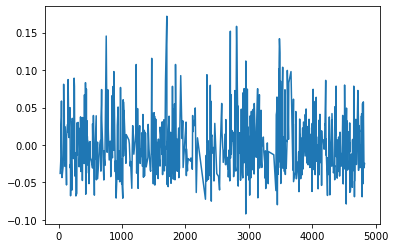

In [1727]:
FAST_AIDS(2018).resids['Бакалея'].plot()

<AxesSubplot:>

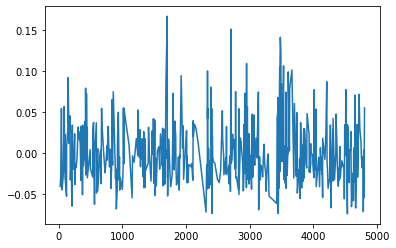

In [1728]:
FAST_AIDS(2018,out=True,n_neighbors=70).resids['Бакалея'].plot()

<AxesSubplot:>

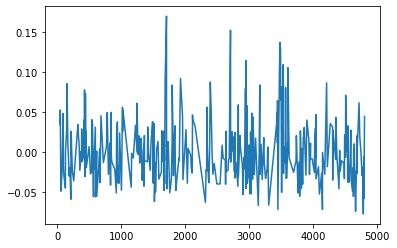

In [1730]:
FAST_AIDS(2018,out=True,constrained=True,n_neighbors=70,contamination=0.1).resids['Бакалея'].plot()

<AxesSubplot:>

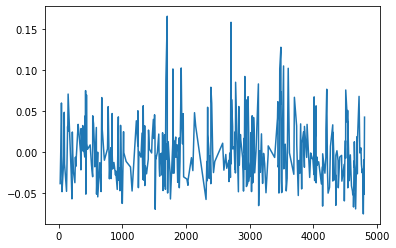

In [1731]:
FAST_AIDS(2018,out=True,constrained=True,n_neighbors=30,contamination=0.1).resids['Бакалея'].plot()

## Задание ограничения однородности

In [2131]:
homo = pd.DataFrame(
    columns=FAST_AIDS(1994,False).param_names,
    index=["rest{0}".format(i) for i in range(6)],
    dtype=np.float64)
homo_r=homo.fillna(0)

homo_r.loc['rest0',['Бакалея_Цена на Бакалея','Бакалея_Цена на Овощи-фрукты', 'Бакалея_Цена на Мясо-рыба','Бакалея_Цена на Молоко', 'Бакалея_Цена на Кондитерские изделия','Бакалея_Цена на Алкоголь', 'Бакалея_Цена на Неалкогольные напитки']]=1
homo_r.loc['rest1',['Овощи-фрукты_Цена на Бакалея','Овощи-фрукты_Цена на Овощи-фрукты', 'Овощи-фрукты_Цена на Мясо-рыба','Овощи-фрукты_Цена на Молоко','Овощи-фрукты_Цена на Кондитерские изделия','Овощи-фрукты_Цена на Алкоголь','Овощи-фрукты_Цена на Неалкогольные напитки']]=1     
homo_r.loc['rest2',['Мясо-рыба_Цена на Бакалея','Мясо-рыба_Цена на Овощи-фрукты', 'Мясо-рыба_Цена на Мясо-рыба','Мясо-рыба_Цена на Молоко', 'Мясо-рыба_Цена на Кондитерские изделия','Мясо-рыба_Цена на Алкоголь', 'Мясо-рыба_Цена на Неалкогольные напитки']]=1         
homo_r.loc['rest3',['Молоко_Цена на Бакалея','Молоко_Цена на Овощи-фрукты', 'Молоко_Цена на Мясо-рыба','Молоко_Цена на Молоко', 'Молоко_Цена на Кондитерские изделия','Молоко_Цена на Алкоголь', 'Молоко_Цена на Неалкогольные напитки']]=1             
homo_r.loc['rest4',['Кондитерские изделия_Цена на Бакалея','Кондитерские изделия_Цена на Овощи-фрукты','Кондитерские изделия_Цена на Мясо-рыба','Кондитерские изделия_Цена на Молоко','Кондитерские изделия_Цена на Кондитерские изделия','Кондитерские изделия_Цена на Алкоголь','Кондитерские изделия_Цена на Неалкогольные напитки']]=1              
homo_r.loc['rest5',['Алкоголь_Цена на Бакалея', 'Алкоголь_Цена на Овощи-фрукты','Алкоголь_Цена на Мясо-рыба', 'Алкоголь_Цена на Молоко','Алкоголь_Цена на Кондитерские изделия', 'Алкоголь_Цена на Алкоголь','Алкоголь_Цена на Неалкогольные напитки']]=1
               
    
homo_r

Бакалея_const  Бакалея_Цена на Бакалея  Бакалея_Цена на Овощи-фрукты  \
rest0            0.0                      1.0                           1.0   
rest1            0.0                      0.0                           0.0   
rest2            0.0                      0.0                           0.0   
rest3            0.0                      0.0                           0.0   
rest4            0.0                      0.0                           0.0   
rest5            0.0                      0.0                           0.0   

       Бакалея_Цена на Мясо-рыба  Бакалея_Цена на Молоко  \
rest0                        1.0                     1.0   
rest1                        0.0                     0.0   
rest2                        0.0                     0.0   
rest3                        0.0                     0.0   
rest4                        0.0                     0.0   
rest5                        0.0                     0.0   

       Бакалея_Цена на Кондитерские изделия  Бакалея_Цена на Алкоголь  \
rest0                                   1.0                       1.0   
rest1                                   0.0                       0.0   
rest2                                   0.0                       0.0   
rest3                                   0.0                       0.0   
rest4                                   0.0                       0.0   
rest5                                   0.0                       0.0   

       Бакалея_Цена на Неалкогольные напитки  Бакалея_Остаток  \
rest0                                    1.0              0.0   
rest1                                    0.0              0.0   
rest2                                    0.0              0.0   
rest3                                    0.0              0.0   
rest4                                    0.0              0.0   
rest5                                    0.0              0.0   

       Овощи-фрукты_const  ...  Кондитерские изделия_Остаток  Алкоголь_const  \
rest0                 0.0  ...                           0.0             0.0   
rest1                 0.0  ...                           0.0             0.0   
rest2                 0.0  ...                           0.0             0.0   
rest3                 0.0  ...                           0.0             0.0   
rest4                 0.0  ...                           0.0             0.0   
rest5                 0.0  ...                           0.0             0.0   

       Алкоголь_Цена на Бакалея  Алкоголь_Цена на Овощи-фрукты  \
rest0                       0.0                            0.0   
rest1                       0.0                            0.0   
rest2                       0.0                            0.0   
rest3                       0.0                            0.0   
rest4                       0.0                            0.0   
rest5                       1.0                            1.0   

       Алкоголь_Цена на Мясо-рыба  Алкоголь_Цена на Молоко  \
rest0                         0.0                      0.0   
rest1                         0.0                      0.0   
rest2                         0.0                      0.0   
rest3                         0.0                      0.0   
rest4                         0.0                      0.0   
rest5                         1.0                      1.0   

       Алкоголь_Цена на Кондитерские изделия  Алкоголь_Цена на Алкоголь  \
rest0                                    0.0                        0.0   
rest1                                    0.0                        0.0   
rest2                                    0.0                        0.0   
rest3                                    0.0                        0.0   
rest4                                    0.0                        0.0   
rest5                                    1.0                        1.0   

       Алкоголь_Цена на Неалкогольные напитки  Алкоголь_Остаток  
rest0        

## Задание ограничения симмметрии

In [2138]:
r=0
r = pd.DataFrame(
    columns=FAST_AIDS(1994,False).param_names,
    index=["rest{0}".format(i) for i in range(15)],
    dtype=np.float64)
r=r.fillna(0)
r.loc['rest0',['Бакалея_Цена на Овощи-фрукты', 'Овощи-фрукты_Цена на Бакалея']]=[1,-1]
r.loc['rest1',['Бакалея_Цена на Мясо-рыба', 'Мясо-рыба_Цена на Бакалея']]=[1,-1]
r.loc['rest2',['Бакалея_Цена на Молоко', 'Молоко_Цена на Бакалея']]=[1,-1]
r.loc['rest3',['Бакалея_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Бакалея']]=[1,-1]
r.loc['rest4',['Бакалея_Цена на Алкоголь', 'Алкоголь_Цена на Бакалея']]=[1,-1]

r.loc['rest5',['Овощи-фрукты_Цена на Мясо-рыба', 'Мясо-рыба_Цена на Овощи-фрукты']]=[1,-1]
r.loc['rest6',['Овощи-фрукты_Цена на Молоко', 'Молоко_Цена на Овощи-фрукты']]=[1,-1]
r.loc['rest7',['Овощи-фрукты_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Овощи-фрукты']]=[1,-1]
r.loc['rest8',['Овощи-фрукты_Цена на Алкоголь', 'Алкоголь_Цена на Овощи-фрукты']]=[1,-1]

r.loc['rest9',['Молоко_Цена на Мясо-рыба', 'Мясо-рыба_Цена на Молоко']]=[1,-1]
r.loc['rest10',['Молоко_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Молоко']]=[1,-1]
r.loc['rest11',['Молоко_Цена на Алкоголь', 'Алкоголь_Цена на Молоко']]=[1,-1]

r.loc['rest12',['Мясо-рыба_Цена на Кондитерские изделия', 'Кондитерские изделия_Цена на Мясо-рыба']]=[1,-1]
r.loc['rest13',['Мясо-рыба_Цена на Алкоголь', 'Алкоголь_Цена на Мясо-рыба']]=[1,-1]

r.loc['rest14',['Кондитерские изделия_Цена на Алкоголь', 'Алкоголь_Цена на Кондитерские изделия']]=[1,-1]

sym_r=r

sym_r

Бакалея_const  Бакалея_Цена на Бакалея  Бакалея_Цена на Овощи-фрукты  \
rest0             0.0                      0.0                           1.0   
rest1             0.0                      0.0                           0.0   
rest2             0.0                      0.0                           0.0   
rest3             0.0                      0.0                           0.0   
rest4             0.0                      0.0                           0.0   
rest5             0.0                      0.0                           0.0   
rest6             0.0                      0.0                           0.0   
rest7             0.0                      0.0                           0.0   
rest8             0.0                      0.0                           0.0   
rest9             0.0                      0.0                           0.0   
rest10            0.0                      0.0                           0.0   
rest11            0.0                      0.0                           0.0   
rest12            0.0                      0.0                           0.0   
rest13            0.0                      0.0                           0.0   
rest14            0.0                      0.0                           0.0   

        Бакалея_Цена на Мясо-рыба  Бакалея_Цена на Молоко  \
rest0                         0.0                     0.0   
rest1                         1.0                     0.0   
rest2                         0.0                     1.0   
rest3                         0.0                     0.0   
rest4                         0.0                     0.0   
rest5                         0.0                     0.0   
rest6                         0.0                     0.0   
rest7                         0.0                     0.0   
rest8                         0.0                     0.0   
rest9                         0.0                     0.0   
rest10                        0.0                     0.0   
rest11                        0.0                     0.0   
rest12                        0.0                     0.0   
rest13                        0.0                     0.0   
rest14                        0.0                     0.0   

        Бакалея_Цена на Кондитерские изделия  Бакалея_Цена на Алкоголь  \
rest0                                    0.0                       0.0   
rest1                                    0.0                       0.0   
rest2                                    0.0                       0.0   
rest3                                    1.0                       0.0   
rest4                                    0.0                       1.0   
rest5                                    0.0                       0.0   
rest6                                    0.0                       0.0   
rest7                                    0.0                       0.0   
rest8                                    0.0                       0.0   
rest9                                    0.0                       0.0   
rest10                                   0.0                       0.0   
rest11                                   0.0                       0.0   
rest12                                   0.0                       0.0   
rest13                                   0.0                       0.0   
rest14                                   0.0                       0.0   

        Бакалея_Цена на Неалкогольные напитки  Бакалея_Остаток  \
rest0                                     0.0              0.0   
rest1                                     0.0              0.0   
rest2                                     0.0              0.0   
rest3                                     0.0              0.0   
rest4                                     0.0              0.0   
rest5                                     0.0              0.0   
rest6                                     0.0              0.0   
rest7                                

## Ограничение симметрии и однородности одновременно

In [2139]:
homo_r_sym=homo_r.copy(deep=1)
sym_homo_r=sym_r.copy(deep=1)

homo_r_sym.index=['rest{0}'.format(k) for k in range(15,21)]
both_r=sym_homo_r.append(homo_r_sym)


C:\Users\79618\AppData\Local\Temp\ipykernel_24620\2581334184.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both_r=sym_homo_r.append(homo_r_sym)


In [2134]:
sym_r.sum[sym_r==1]

TypeError: 'method' object is not subscriptable

## Примеры

In [965]:
FAST_AIDS(1994)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.1079
No. Equations.:                     6   McElroy's R-squared:                 0.1520
No. Observations:                 572   Judge's (OLS) R-squared:             0.1079
Date:                Fri, Sep 09 2022   Berndt's R-squared:                  0.6043
Time:                        02:21:03   Dhrymes's R-squared:                 0.1079
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.5001     0.0886     5.6426     0.0000      0.3264      0.6739
Цена на Бакалея                   0.0154     0.0067     2.2976     0.0216      0.0023      0.0286
Цена на Овощи-фрукты             -0.0203     0.0075    -2.7076     0.0068     -0.0350     -0.0056
Цена на Мясо-рыба                -0.0193     0.0087    -2.2211     0.0263     -0.0363     -0.0023
Цена на Молоко                    0.0022     0.0044     0.5135     0.6076     -0.0063      0.0108
Цена на Кондитерские изделия     -0.0115     0.0055    -2.1018     0.0356     -0.0222     -0.0008
Цена на Алкоголь                 -0.0138     0.0029    -4.7896     0.0000     -0.0194     -0.0081
Цена на Неалкогольные напитки    -0.0021     0.0023    -0.9185     0.3584     -0.0066      0.0024
Остаток                           0.0095     0.0069     1.3655     0.1721     -0.0041      0.0231
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.1402     0.0944    -1.4843     0.1377     -0.3252      0.0449
Цена на Бакалея                   0.0047     0.0084     0.5583     0.5766     -0.0118      0.0212
Цена на Овощи-фрукты              0.0174     0.0072     2.4203     0.0155      0.0033      0.0314
Цена на Мясо-рыба                 0.0117     0.0094     1.2515     0.2107     -0.0066      0.0301
Цена на Молоко                   -0.0030     0.0060    -0.5118     0.6088     -0.0147      0.0086
Цена на Кондитерские изделия      0.0036     0.0047     0.7693     0.4417     -0.0056      0.0129
Цена на Алкоголь                 -0.0018     0.0027    -0.6547     0.5127     -0.0071      0.0036
Цена на Неалкогольные напитки    -0.0037     0.0029    -1.2507     0.2110     -0.0095      0.0021
Остаток                           0.0114     0.0076     1.5011     0.1333     -0.0035      0.0262
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0523     0.1479    -0.3533     0.7239     -0.3421      0.2376
Цена на Бакалея                   0.0045     0.0116     0.3877     0.6982     -0.0183      0.0273
Цена на Овощи-фрукты              0.0396     0.0114     3.4701     0.0005      0.0172      0.0620
Цена на Мясо-рыба                -0.0

In [955]:
FAST_AIDS(1994,constrained=True)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0990
No. Equations.:                     6   McElroy's R-squared:                 0.1441
No. Observations:                 572   Judge's (OLS) R-squared:             0.0990
Date:                Fri, Sep 09 2022   Berndt's R-squared:                  0.5813
Time:                        02:01:10   Dhrymes's R-squared:                 0.0990
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                         6
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0834     0.0303     2.7535     0.0059      0.0240      0.1427
Цена на Бакалея                   0.0305     0.0061     4.9997     0.0000      0.0185      0.0424
Цена на Овощи-фрукты             -0.0124     0.0070    -1.7844     0.0744     -0.0260      0.0012
Цена на Мясо-рыба                -0.0029     0.0081    -0.3577     0.7205     -0.0188      0.0130
Цена на Молоко                    0.0071     0.0046     1.5284     0.1264     -0.0020      0.0162
Цена на Кондитерские изделия     -0.0092     0.0058    -1.5780     0.1146     -0.0205      0.0022
Цена на Алкоголь                 -0.0140     0.0029    -4.8520     0.0000     -0.0196     -0.0083
Цена на Неалкогольные напитки     0.0009     0.0022     0.3965     0.6917     -0.0035      0.0053
Остаток                           0.0150     0.0075     1.9985     0.0457      0.0003      0.0297
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1045     0.0319     3.2728     0.0011      0.0419      0.1671
Цена на Бакалея                  -0.0041     0.0074    -0.5606     0.5751     -0.0186      0.0103
Цена на Овощи-фрукты              0.0127     0.0072     1.7762     0.0757     -0.0013      0.0268
Цена на Мясо-рыба                 0.0021     0.0090     0.2360     0.8134     -0.0155      0.0198
Цена на Молоко                   -0.0059     0.0057    -1.0318     0.3022     -0.0171      0.0053
Цена на Кондитерские изделия      0.0023     0.0047     0.4882     0.6254     -0.0069      0.0114
Цена на Алкоголь                 -0.0017     0.0027    -0.6144     0.5389     -0.0070      0.0037
Цена на Неалкогольные напитки    -0.0054     0.0030    -1.8225     0.0684     -0.0113      0.0004
Остаток                           0.0081     0.0076     1.0666     0.2861     -0.0068      0.0231
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.1915     0.0428     4.4749     0.0000      0.1076      0.2753
Цена на Бакалея                  -0.0043     0.0110    -0.3919     0.6951     -0.0258      0.0172
Цена на Овощи-фрукты              0.0350     0.0112     3.1129     0.0019      0.0130      0.0570
Цена на Мясо-рыба                -0.0

In [966]:
FAST_AIDS(1994,fitted=1,price_index='Laspeyres')

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.1284
No. Equations.:                     6   McElroy's R-squared:                 0.1475
No. Observations:                 572   Judge's (OLS) R-squared:             0.1284
Date:                Fri, Sep 09 2022   Berndt's R-squared:                  0.5967
Time:                        03:39:53   Dhrymes's R-squared:                 0.1284
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.7085     0.0935     7.5788     0.0000      0.5252      0.8917
Цена на Бакалея                   0.0158     0.0065     2.4123     0.0159      0.0030      0.0286
Цена на Овощи-фрукты             -0.0212     0.0074    -2.8456     0.0044     -0.0358     -0.0066
Цена на Мясо-рыба                -0.0238     0.0084    -2.8426     0.0045     -0.0402     -0.0074
Цена на Молоко                   -0.0012     0.0042    -0.2776     0.7813     -0.0094      0.0071
Цена на Кондитерские изделия     -0.0141     0.0053    -2.6503     0.0080     -0.0245     -0.0037
Цена на Алкоголь                 -0.0138     0.0029    -4.8032     0.0000     -0.0194     -0.0081
Цена на Неалкогольные напитки    -0.0028     0.0022    -1.3073     0.1911     -0.0071      0.0014
Остаток                          -0.0220     0.0057    -3.8667     0.0001     -0.0332     -0.0109
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0698     0.0945    -0.7391     0.4599     -0.2551      0.1154
Цена на Бакалея                   0.0051     0.0083     0.6173     0.5370     -0.0112      0.0214
Цена на Овощи-фрукты              0.0169     0.0073     2.3332     0.0196      0.0027      0.0311
Цена на Мясо-рыба                 0.0099     0.0093     1.0623     0.2881     -0.0083      0.0280
Цена на Молоко                   -0.0037     0.0060    -0.6084     0.5429     -0.0154      0.0081
Цена на Кондитерские изделия      0.0024     0.0048     0.5070     0.6122     -0.0069      0.0117
Цена на Алкоголь                 -0.0016     0.0027    -0.5740     0.5660     -0.0069      0.0038
Цена на Неалкогольные напитки    -0.0041     0.0030    -1.3736     0.1696     -0.0099      0.0017
Остаток                           0.0005     0.0077     0.0653     0.9479     -0.0145      0.0155
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.3149     0.1472    -2.1390     0.0324     -0.6035     -0.0264
Цена на Бакалея                   0.0060     0.0110     0.5475     0.5841     -0.0155      0.0275
Цена на Овощи-фрукты              0.0400     0.0112     3.5851     0.0003      0.0181      0.0618
Цена на Мясо-рыба                -0.0

In [889]:
FAST_AIDS(1994,fitted=1,price_index='Stone')

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.1079
No. Equations.:                     6   McElroy's R-squared:                 0.1520
No. Observations:                 572   Judge's (OLS) R-squared:             0.1079
Date:                Thu, Sep 08 2022   Berndt's R-squared:                  0.6043
Time:                        23:18:36   Dhrymes's R-squared:                 0.1079
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.5001     0.0886     5.6426     0.0000      0.3264      0.6739
Цена на Бакалея                   0.0154     0.0067     2.2976     0.0216      0.0023      0.0286
Цена на Овощи-фрукты             -0.0203     0.0075    -2.7076     0.0068     -0.0350     -0.0056
Цена на Мясо-рыба                -0.0193     0.0087    -2.2211     0.0263     -0.0363     -0.0023
Цена на Молоко                    0.0022     0.0044     0.5135     0.6076     -0.0063      0.0108
Цена на Кондитерские изделия     -0.0115     0.0055    -2.1018     0.0356     -0.0222     -0.0008
Цена на Алкоголь                 -0.0138     0.0029    -4.7896     0.0000     -0.0194     -0.0081
Цена на Неалкогольные напитки    -0.0021     0.0023    -0.9185     0.3584     -0.0066      0.0024
Остаток                           0.0095     0.0069     1.3655     0.1721     -0.0041      0.0231
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.1402     0.0944    -1.4843     0.1377     -0.3252      0.0449
Цена на Бакалея                   0.0047     0.0084     0.5583     0.5766     -0.0118      0.0212
Цена на Овощи-фрукты              0.0174     0.0072     2.4203     0.0155      0.0033      0.0314
Цена на Мясо-рыба                 0.0117     0.0094     1.2515     0.2107     -0.0066      0.0301
Цена на Молоко                   -0.0030     0.0060    -0.5118     0.6088     -0.0147      0.0086
Цена на Кондитерские изделия      0.0036     0.0047     0.7693     0.4417     -0.0056      0.0129
Цена на Алкоголь                 -0.0018     0.0027    -0.6547     0.5127     -0.0071      0.0036
Цена на Неалкогольные напитки    -0.0037     0.0029    -1.2507     0.2110     -0.0095      0.0021
Остаток                           0.0114     0.0076     1.5011     0.1333     -0.0035      0.0262
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0523     0.1479    -0.3533     0.7239     -0.3421      0.2376
Цена на Бакалея                   0.0045     0.0116     0.3877     0.6982     -0.0183      0.0273
Цена на Овощи-фрукты              0.0396     0.0114     3.4701     0.0005      0.0172      0.0620
Цена на Мясо-рыба                -0.0

# Получение коэффициентов пропущенного уравнения

In [1575]:
def FAST_alpha_AIDS(period, price_index='Stone',constrained=False,output='dict',out=False,n_neighbors=30,contamination='auto'):
    final={}
    for i in period:
        z=FAST_AIDS(i,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination).params
        final[i]={}
        for j in list(z.index):
            if '_const' in j:
                final[i][j]=z[j]
        final[i]['Неалкогольные напитки_const']=1-sum(final[i].values())
    
    if output=='df':
        if len(period)==1:
            return pd.Series(final[(period[0])])
        if len(period)>1:
            return pd.DataFrame(final)
    if output=='dict':
        return final

In [1804]:
def FAST_beta_AIDS(period, price_index='Stone',constrained=False,
                   output='dict',out=False,n_neighbors=30,contamination='auto',
                  good_name=False):
    final={}
    for i in period:
        z=FAST_AIDS(i,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination).params
        final[i]={}
        for j in list(z.index):
            if '_Остаток' in j:
                if good_name==False:
                    final[i][j]=z[j]
                else:
                    final[i][j.replace('_Остаток','')]=z[j]
        if good_name==False:
            final[i]['Неалкогольные напитки_Остаток']=-sum(final[i].values())
        else:
            final[i]['Неалкогольные напитки']=-sum(final[i].values())

    if output=='df':
        if len(period)==1:
            return pd.Series(final[(period[0])])
        if len(period)>1:
            return pd.DataFrame(final)
    if output=='dict':
        return final        

In [1806]:
FAST_beta_AIDS([2012],good_name=True)

{2012: {'Бакалея': -0.006526933490360373,
  'Овощи-фрукты': 0.0356676522147603,
  'Мясо-рыба': 0.022657234176451352,
  'Молоко': -0.011326767994525462,
  'Кондитерские изделия': -0.006661957991514837,
  'Алкоголь': -0.007100307534121113,
  'Неалкогольные напитки': -0.026708919380689863}}

In [1999]:
def FAST_gamma_AIDS(period, price_index='Stone',constrained=False,out=False,n_neighbors=30,contamination='auto', output='series'):
    f_gamma=FAST_AIDS(period,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination).params
    f_list=[]
    for i in f_gamma.index:
        if '_Цена' in i:
            f_list.append(i)
    f_gamma=f_gamma.loc[f_list]
    
    for i in ['_Цена на Бакалея','_Цена на Овощи-фрукты',
              '_Цена на Мясо-рыба','_Цена на Молоко',
              '_Цена на Кондитерские изделия','_Цена на Алкоголь',
              '_Цена на Неалкогольные напитки']:
        f_gamma_2=[]
        for j in f_gamma.index:
            if i in j:
                f_gamma_2.append(j)
        f_gamma['Неалкогольные напитки{0}'.format(i)]=-f_gamma.loc[f_gamma_2].sum()
    if output=='series':        
        return f_gamma
    if output=='df':
        fff_final=FAST_food_agregate_price(period).corr()
        for i in ['_Цена на Бакалея','_Цена на Овощи-фрукты',
              '_Цена на Мясо-рыба','_Цена на Молоко',
              '_Цена на Кондитерские изделия','_Цена на Алкоголь',
              '_Цена на Неалкогольные напитки']:
            for j in ['Бакалея','Овощи-фрукты',
              'Мясо-рыба','Молоко',
              'Кондитерские изделия','Алкоголь',
              'Неалкогольные напитки']:
                fff_final.loc[j,i.replace("_Цена на ",'')]=f_gamma.loc['{0}{1}'.format(j,i)]
        return fff_final
    

In [2026]:
checks=FAST_gamma_AIDS(2012,output='df')

In [2027]:
checks.sum(axis=1)

Бакалея                 -0.049651
Овощи-фрукты             0.028393
Мясо-рыба                0.064829
Молоко                  -0.025250
Кондитерские изделия    -0.004375
Алкоголь                -0.030965
Неалкогольные напитки    0.017020
dtype: float64

In [2028]:
checks.sum(axis=0)

Бакалея                  0.0
Овощи-фрукты             0.0
Мясо-рыба                0.0
Молоко                   0.0
Кондитерские изделия     0.0
Алкоголь                 0.0
Неалкогольные напитки    0.0
dtype: float64

In [2029]:
checks=FAST_gamma_AIDS(2012,output='df',constrained=True)

In [2030]:
checks.sum(axis=1)

Бакалея                 -1.843144e-17
Овощи-фрукты             1.908196e-17
Мясо-рыба               -5.377643e-17
Молоко                   1.409463e-17
Кондитерские изделия     1.669671e-17
Алкоголь                 6.071532e-18
Неалкогольные напитки    6.938894e-18
dtype: float64

In [2031]:
checks.sum(axis=0)

Бакалея                  0.0
Овощи-фрукты             0.0
Мясо-рыба                0.0
Молоко                   0.0
Кондитерские изделия     0.0
Алкоголь                 0.0
Неалкогольные напитки    0.0
dtype: float64

## Проверка выполнения условия суммируемости

In [2024]:
pd.Series(FAST_alpha_AIDS([2012])[2012]).sum()

In [2025]:
pd.Series(FAST_beta_AIDS([2012])[2012]).sum()

### Примеры

In [1523]:
FAST_alpha_AIDS([2008,2009,2010,2011], price_index='Stone',constrained=False,output='df')

2008      2009      2010      2011
Бакалея_const                0.466908  0.439488  0.402848  0.348520
Овощи-фрукты_const          -0.152789 -0.143630 -0.132268 -0.060579
Мясо-рыба_const             -0.191729 -0.030627 -0.079748 -0.108907
Молоко_const                 0.413551  0.258041  0.294522  0.214001
Кондитерские изделия_const   0.190587  0.185908  0.141808  0.199503
Алкоголь_const               0.216590  0.232649  0.262450  0.324016
Неалкогольные напитки_const  0.056881  0.058170  0.110388  0.083447

In [1539]:
FAST_beta_AIDS([1994], price_index='Stone',constrained=False,output='df')

Бакалея_Остаток                  0.009486
Овощи-фрукты_Остаток             0.011371
Мясо-рыба_Остаток                0.039448
Молоко_Остаток                  -0.018980
Кондитерские изделия_Остаток     0.024728
Алкоголь_Остаток                -0.032460
Неалкогольные напитки_Остаток   -0.033593
dtype: float64

## Плоттер коэффициентов 

In [1612]:
def FAST_par_plot(period,par,price_index='Stone',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    if par=='alpha' or par=='alphas':
        alphas_1=FAST_alpha_AIDS(period=period, price_index=price_index,
                                 constrained=constrained,output='dict',out=out,n_neighbors=n_neighbors,
                                 contamination=contamination)
        df_1=pd.DataFrame(alphas_1).T
    if par=='beta' or par=='betas':
        betas_1=FAST_beta_AIDS(period=period, price_index=price_index,constrained=constrained,output='dict')
        df_1=pd.DataFrame(betas_1).T
    plt.figure(figsize=(6, 8), dpi=100)
    plt.grid()
    
    max_par=(df_1.max()).max()+0.1*(df_1.max()).max()
    min_par=(df_1.min()).min()+0.1*(df_1.min()).min()
    plt.ylim(min_par,max_par)
    plt.xlim(period[0],period[-1]+1)
    
    plt.xlabel('Годы',fontsize='large',fontweight=700)
    plt.locator_params(nbins=round(len(period)/2))
    plt.plot([period[0],period[-1]+1],[0,0],c='black',ls='--')
    
    if par=='beta' or par=='betas':
        plt.axhspan(min_par, 0, facecolor='r', alpha=0.075,label='Товары первой \nнеобходимости')
        plt.axhspan(0, max_par, facecolor='y', alpha=0.15,label='Товары роскоши')
        q=1
        for j in  df_1.columns:
            plt.plot(df_1.loc[:,j])
            plt.scatter( df_1.index, df_1.loc[:,j],label=r'$\beta_{}$'.format(q) +'({})'.format(j.replace('_Остаток','')))
            
            q=q+1
        plt.ylabel(r'$\beta_i$',fontsize=20,fontweight=700)
        
    if par=='alpha' or par=='alphas':
        plt.axhspan(min_par, 0, facecolor='b', alpha=0.075,label='')
        plt.axhspan(0, max_par, facecolor='y', alpha=0.15,label='')
        q=1
        for j in  df_1.columns:
            plt.plot( df_1.loc[:,j],label=r'$\alpha_{}$'.format(q) +' ({})'.format(j.replace('_const','')))
            plt.scatter( df_1.index, df_1.loc[:,j])
            q=q+1
        plt.ylabel(r'$\alpha_i$',fontsize=20,fontweight=700)
    plt.legend(bbox_to_anchor=(1,1),fontsize=10)

### Примеры

In [ ]:
FAST_par_plot(list(range(2000,2022)),"alpha",price_index='Stone',constrained=False)

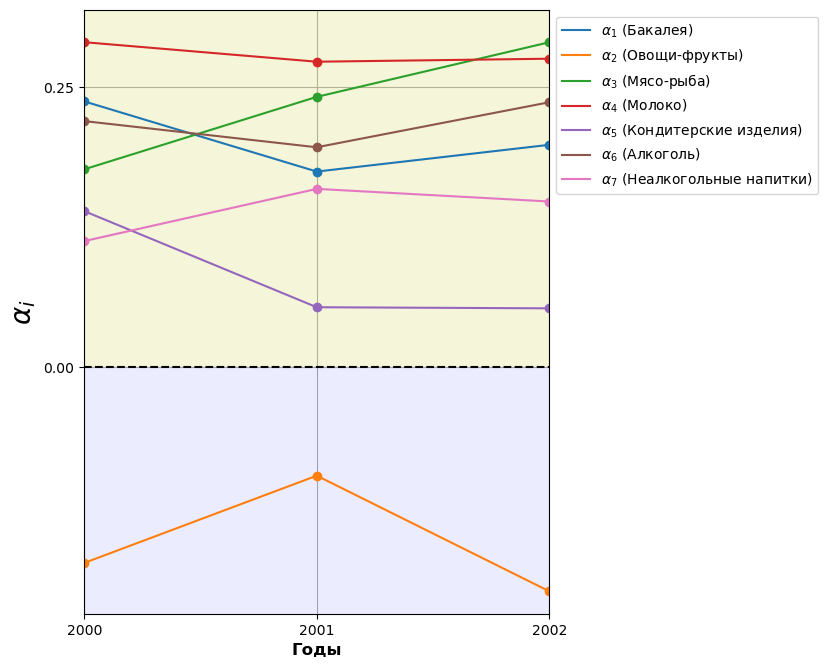

In [1611]:
FAST_par_plot(list(range(2000,2003)),"alpha",price_index='Stone',constrained=True,out=True)

In [ ]:
FAST_par_plot(list(range(2000,2022)),"alpha",price_index='Stone',constrained=True,out=True)

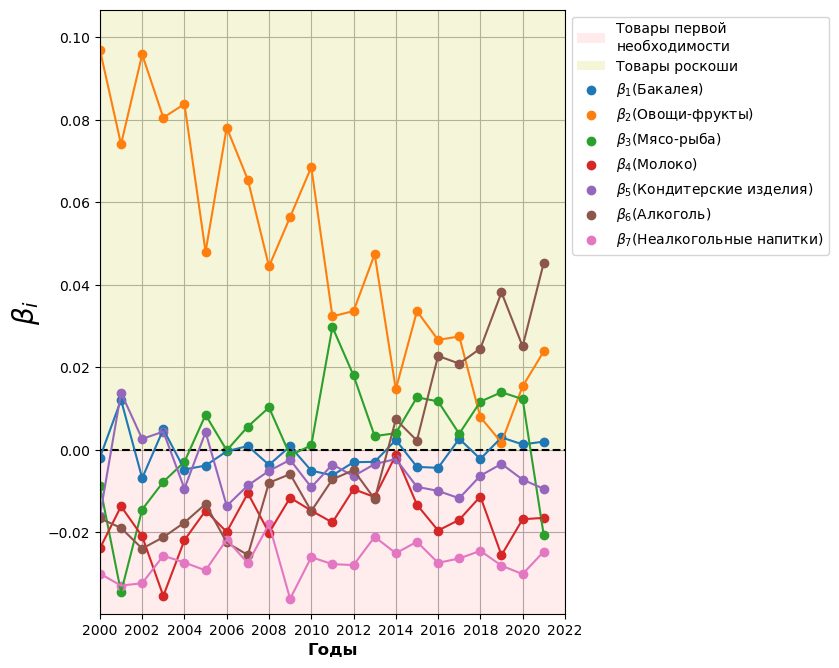

In [1592]:
FAST_par_plot(list(range(2000,2022)),"beta",price_index='Stone',constrained=True,out=True)

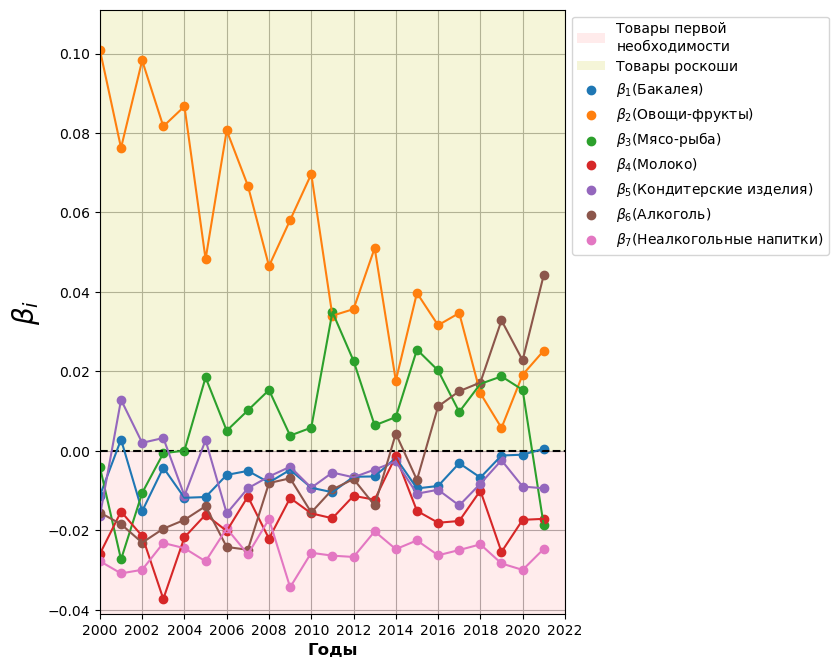

In [1963]:
FAST_par_plot(list(range(2000,2022)),"beta",price_index='Stone')

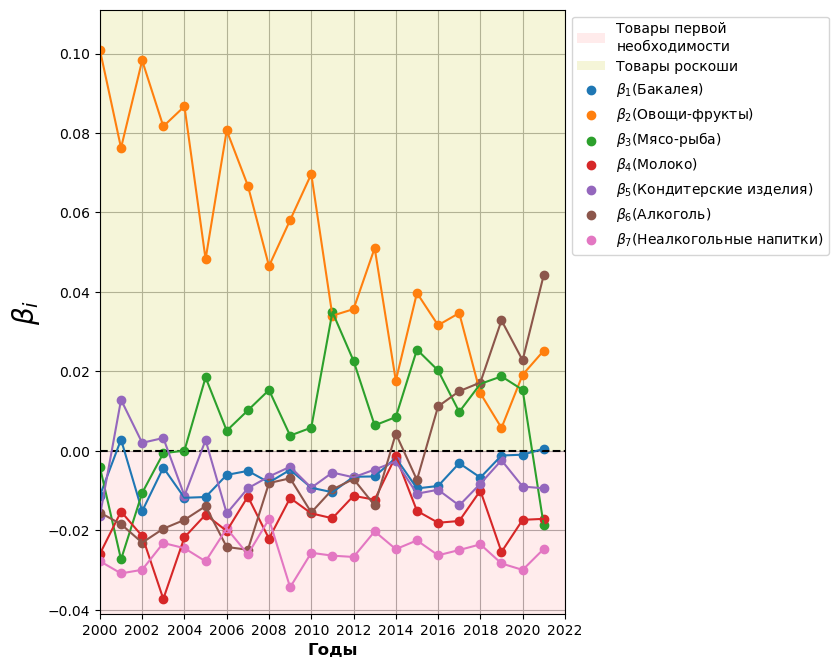

In [1593]:
FAST_par_plot(list(range(2000,2022)),"beta",price_index='Stone')

# Эластичность спроса по расходам

In [2356]:
def FAST_cost_elast(year, price_index='Stone', how='on_mean',constrained=False,out=False,n_neighbors=30,contamination='auto',output='elast'):
    f_beta=pd.Series(FAST_beta_AIDS([year], price_index=price_index,constrained=constrained,
                               out=out,n_neighbors=n_neighbors,contamination=contamination)[year])
    if price_index=='norm Stone':
        f_price=FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean())
    else:
        f_price=FAST_food_agregate_price(year)
    f_dict={}
    
    if how=='on_mean':
        f_agr=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
        for i in f_agr.index:
            for j in f_beta.index:
                if i in j:
                    f_dict[i]=f_beta[j]/f_agr[i]
        K=Matrix(pd.Series(f_dict).values)
        c=Matrix(np.log(f_price.mean())*f_agr.values)
        return pd.Series(list((eye(7)+K*transpose(c)).inverse()*K+ones(7,1)),index=f_agr.index)
        
    if how=='mean':
        f_agr=FAST_food_agregates_shares(year,total=0,del_zero=1)
        f_agr_result=f_agr.copy(deep=1)
        for k in f_agr.index:
            for i in f_agr.columns:
                for j in f_beta.index:
                    if i in j:
                        f_dict[i]=f_beta[j]/f_agr.loc[k,i]
            K=Matrix(pd.Series(f_dict).values)
            
            c=Matrix(np.log(f_price.loc[k].values)* f_agr.loc[k].values)
            f_agr_result.loc[k]=pd.Series(list((eye(7)+K*transpose(c)).inverse()*K+ones(7,1)),index=f_agr.columns)
            f_dict={}
        if output=='df':
            return f_agr_result
        if output=='elast':
            return f_agr_result.mean()
        

In [2357]:
FAST_cost_elast(2012, price_index='norm Stone',how='mean')

Бакалея                  0.657914
Овощи-фрукты             1.258332
Мясо-рыба                1.252381
Молоко                   0.842515
Кондитерские изделия     0.926788
Алкоголь                 0.767971
Неалкогольные напитки    0.512703
dtype: float64

In [2358]:
FAST_cost_elast(2012, price_index='norm Stone',how='on_mean')

Бакалея                  0.784921094459521
Овощи-фрукты              1.14068249635088
Мясо-рыба                 1.19111725932561
Молоко                   0.884030752068964
Кондитерские изделия     0.957531228300784
Алкоголь                 0.869784515265835
Неалкогольные напитки    0.718190634280568
dtype: object

In [2359]:
FAST_cost_elast(2012, price_index='norm Stone',how='mean',constrained=1)

Бакалея                  0.708652
Овощи-фрукты             1.250301
Мясо-рыба                1.241412
Молоко                   0.846296
Кондитерские изделия     0.929849
Алкоголь                 0.784214
Неалкогольные напитки    0.477224
dtype: float64

In [2354]:
FAST_cost_elast(2012, price_index='norm Stone',how='on_mean',constrained=1)

Бакалея                  0.818807240138718
Овощи-фрукты              1.13478386162837
Мясо-рыба                 1.18080076397598
Молоко                   0.888036633102677
Кондитерские изделия     0.959753074495131
Алкоголь                 0.880281529486267
Неалкогольные напитки    0.700872500223100
dtype: object

In [2360]:
FAST_cost_elast(2012, price_index='norm Stone',how='on_mean',constrained=1)

Бакалея                  0.816816595700593
Овощи-фрукты              1.13626464234336
Мясо-рыба                 1.18278710181582
Молоко                   0.886806565997575
Кондитерские изделия     0.959310908271331
Алкоголь                 0.878966262211507
Неалкогольные напитки    0.697586185172890
dtype: object

In [1634]:
def FAST_cost_elast_period(period, price_index='Stone', how='on_mean',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    dict_elast={}
    for i in period:
        dict_elast[i]=FAST_cost_elast(i, price_index=price_index, how=how,constrained=constrained,
                        out=out,n_neighbors=n_neighbors,contamination=contamination)
    return pd.DataFrame(dict_elast)

### Примеры

In [1516]:
FAST_cost_elast(2012)

Бакалея                  0.913952103444573
Овощи-фрукты              1.30037492543638
Мясо-рыба                 1.07471629921583
Молоко                   0.929228926616257
Кондитерские изделия     0.935838396370402
Алкоголь                 0.948703948778210
Неалкогольные напитки    0.566217209354475
dtype: object

In [2325]:
FAST_cost_elast(2012,  constrained=1)

Бакалея                  0.964172630906914
Овощи-фрукты              1.29213462442550
Мясо-рыба                 1.05687403605303
Молоко                   0.936359888823722
Кондитерские изделия     0.939418078484034
Алкоголь                 0.969325690553725
Неалкогольные напитки    0.537182775968169
dtype: object

## Плоттинг эластичности спроса по доходу

In [1661]:
def FAST_cost_elast_plot(period, price_index='Stone', w_i='mean',
                         constrained=False,out=False,n_neighbors=30,
                         contamination='auto'):
    df_1=FAST_cost_elast_period(period, price_index=price_index, w_i=w_i,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination)
    df_1=df_1.T
    
    plt.figure(figsize=(6, 8), dpi=100)
    plt.grid()
    max_par=df_1.max().max()+0.1*df_1.max().max()
    print(max_par,type(max_par))
    min_par=df_1.min().min()-0.1*df_1.min().min()
    print(min_par,type(min_par))
    plt.ylim(float(min_par),float(max_par))
    plt.xlim(period[0],period[-1]+1)
    
    plt.xlabel('Годы',fontsize='large',fontweight=700)
    plt.locator_params(nbins=round(len(period)/2))
    plt.plot([period[0],period[-1]+1],[1,1],c='black',ls='--')
    
    plt.axhspan(min_par, 1, facecolor='b', alpha=0.075,label='Товары первой \nнеобходимости')
    plt.axhspan(1, max_par, facecolor='y', alpha=0.15,label='Товары роскоши')
    
    q=1
    for j in  df_1.columns:
        plt.plot(df_1.loc[:,j])
        plt.scatter(df_1.index, df_1.loc[:,j],label=r'$\eta_{}$'.format(q) +'({})'.format(j))
            
        q=q+1
    plt.ylabel(r'$\eta_i$',fontsize=20,fontweight=700)
    plt.legend(bbox_to_anchor=(1,1),fontsize=10)    

2.03967112858162 <class 'sympy.core.numbers.Float'>
0.399655199030277 <class 'sympy.core.numbers.Float'>


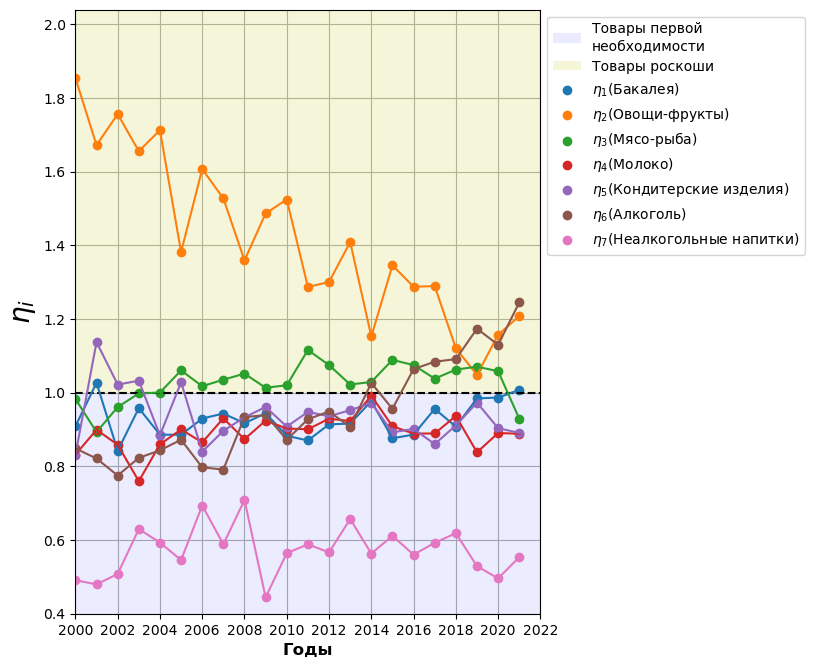

In [1663]:
FAST_cost_elast_plot(list(range(2000,2022)))

2.01977079699022 <class 'sympy.core.numbers.Float'>
0.369812792301412 <class 'sympy.core.numbers.Float'>


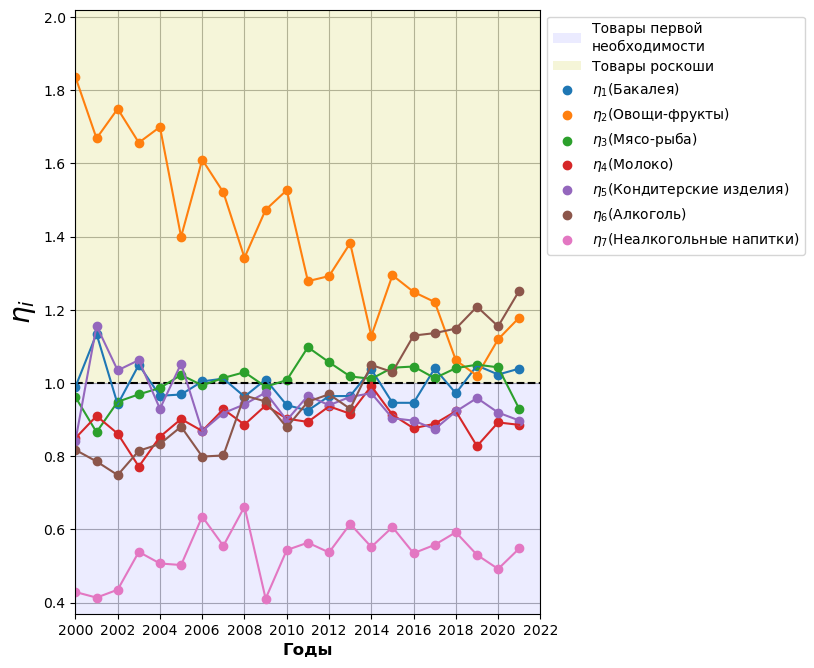

In [2146]:
FAST_cost_elast_plot(list(range(2000,2022)),constrained=True)

2.01547104715463 <class 'sympy.core.numbers.Float'>
0.368107560919799 <class 'sympy.core.numbers.Float'>


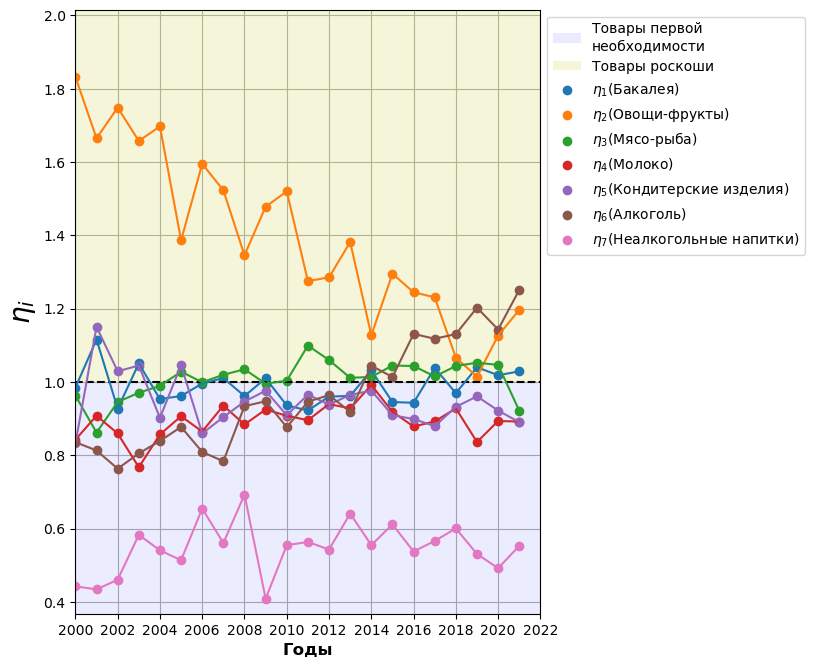

In [1664]:
FAST_cost_elast_plot(list(range(2000,2022)),constrained=True)

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)), price_index='Laspeyres',constrained=True)

In [ ]:
FAST_cost_elast_plot(list(range(2000,2022)), price_index='Laspeyres',constrained=True)

2.11402801307850 <class 'sympy.core.numbers.Float'>
0.385821500190077 <class 'sympy.core.numbers.Float'>


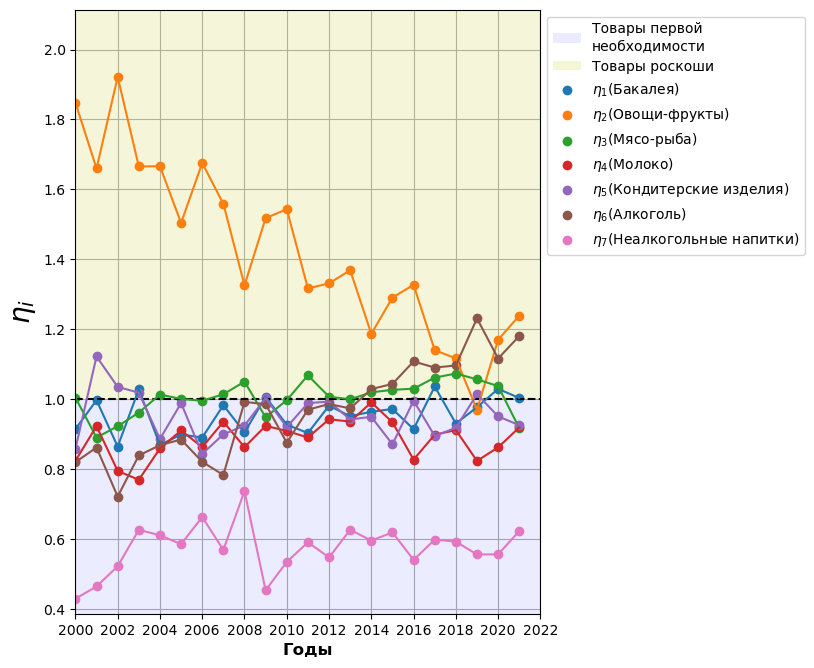

In [1668]:
FAST_cost_elast_plot(list(range(2000,2022)),constrained=True,out=True)

# Датафрейм эластчиностей расходов 

In [1782]:
FAST_food_agregates_shares(2017,total=0,del_zero=1).sum(axis=1)

5       1.0
12      1.0
16      1.0
20      1.0
35      1.0
       ... 
4838    1.0
4840    1.0
4850    1.0
4851    1.0
4852    1.0
Length: 903, dtype: float64

In [1863]:
def FAST_cost_elast_df(year,price_index='Stone', w_i='all',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    if w_i=='mean':
        f_agr=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
    if w_i=='all':
        pass
        
    f_beta=pd.Series(FAST_beta_AIDS([year], price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination,good_name=True)[year])
    f_shares=FAST_food_agregates_shares(year,total=0,del_zero=1)
    f_lnp=np.log(FAST_food_agregate_price(year))
    
    K=f_beta*(1/f_shares)
    C=f_shares*f_lnp
    f_final=f_shares.copy(deep=1)
    
    for i in f_final.index:
        k_i=Matrix(K.loc[i].values)
        c_i=Matrix(C.loc[i].values)
        fin=((eye(7)+k_i*(c_i.transpose())).inv())*k_i+ones(7,1)
             
        f_final.loc[i]=list(fin)
    return f_final

# Ценовая эластичность

## Пример ручной реализации

In [1949]:
#Получим матрицу на примере
#1. матрица гамма
gamma_i_j=Matrix(FAST_gamma_AIDS(2012,output='df').values)
gamma_i_j

⎡ 0.0150072760873562   -0.00448102587408927  -0.0265016783422506   -0.00739943
⎢                                                                             
⎢0.00990269205109159   0.00731533541848168   0.00428025089984452   0.007541549
⎢                                                                             
⎢-0.0169057075302581   -0.00734594612365012   0.0911759398746034    0.01146575
⎢                                                                             
⎢-0.00555815086874412  0.00231795841170598   -0.0266249987287227     0.0277931
⎢                                                                             
⎢-0.0143617169425023   0.000549728516114068  -0.0155960956196801   -0.00995251
⎢                                                                             
⎢ 0.0062830467411961   -0.00213716936776393   -0.025302017050698   -0.02790184
⎢                                                                             
⎣0.00563256046186059   0.00378111901920159   -0.0014

In [1951]:
#2. матрица долей бюджета
reverse_w_i=1/(FAST_food_agregates_shares(2012,total=0,del_zero=1).mean()).values
reverse_w_i_1=Matrix(7*[reverse_w_i]).transpose()
reverse_w_i_1

⎡12.6786987727955  12.6786987727955  12.6786987727955  12.6786987727955  12.67
⎢                                                                             
⎢8.09902547963786  8.09902547963786  8.09902547963786  8.09902547963786  8.099
⎢                                                                             
⎢3.17140766739361  3.17140766739361  3.17140766739361  3.17140766739361  3.171
⎢                                                                             
⎢6.00887805103581  6.00887805103581  6.00887805103581  6.00887805103581  6.008
⎢                                                                             
⎢9.26225925084368  9.26225925084368  9.26225925084368  9.26225925084368  9.262
⎢                                                                             
⎢6.9478492570742   6.9478492570742   6.9478492570742   6.9478492570742   6.947
⎢                                                                             
⎣15.6192297696769  15.6192297696769  15.619229769676

In [1964]:
#3. Матрица поэлементного произведения
gamma_w_i_j=gamma_i_j.multiply_elementwise(reverse_w_i_1)
gamma_w_i_j

⎡ 0.190272732911766   -0.0568135772506804  -0.336006796674912   -0.09381525526
⎢                                                                             
⎢0.0802021552387981   0.0592470879463804   0.0346658610970836   0.061079199872
⎢                                                                             
⎢-0.0536148904841743  -0.0232969898608043   0.289156074800135   0.036362595217
⎢                                                                             
⎢-0.0333982507595422  0.0139283294233139   -0.159986370469878    0.16700591516
⎢                                                                             
⎢-0.133021945608691   0.00509172803383009  -0.144455080930425   -0.09218279798
⎢                                                                             
⎢0.0436536616329818   -0.0148487306040604  -0.175794600368171   -0.19385780225
⎢                                                                             
⎣0.0879762560453979   0.0590581667474049   -0.022357

In [1953]:
#4. Получим второй элемент
# строка beta_i
beta_i=Matrix(pd.Series(FAST_beta_AIDS([2012])[2012]).values)
beta_i

⎡-0.00652693349036037⎤
⎢                    ⎥
⎢ 0.0356676522147603 ⎥
⎢                    ⎥
⎢ 0.0226572341764514 ⎥
⎢                    ⎥
⎢-0.0113267679945255 ⎥
⎢                    ⎥
⎢-0.00666195799151484⎥
⎢                    ⎥
⎢-0.00710030753412111⎥
⎢                    ⎥
⎣-0.0267089193806899 ⎦

In [1958]:
# строка w_i
reverse_w_i=Matrix(1/(FAST_food_agregates_shares(2012,total=0,del_zero=1).mean()).values)
reverse_w_i

⎡12.6786987727955⎤
⎢                ⎥
⎢8.09902547963786⎥
⎢                ⎥
⎢3.17140766739361⎥
⎢                ⎥
⎢6.00887805103581⎥
⎢                ⎥
⎢9.26225925084368⎥
⎢                ⎥
⎢6.9478492570742 ⎥
⎢                ⎥
⎣15.6192297696769⎦

In [1961]:
beta_i_w_i=beta_i.multiply_elementwise(reverse_w_i)
beta_i_w_i

⎡-0.0827530236343497⎤
⎢                   ⎥
⎢ 0.288873224086206 ⎥
⎢                   ⎥
⎢0.0718553261891303 ⎥
⎢                   ⎥
⎢-0.0680611675914789⎥
⎢                   ⎥
⎢-0.0617047820356403⎥
⎢                   ⎥
⎢-0.0493318664259417⎥
⎢                   ⎥
⎣-0.417172748706771 ⎦

In [1960]:
w_i_straight=Matrix((FAST_food_agregates_shares(2012,total=0,del_zero=1).mean()).values)
w_i_straight

⎡0.0788724472376999⎤
⎢                  ⎥
⎢0.123471645139794 ⎥
⎢                  ⎥
⎢0.315317393686521 ⎥
⎢                  ⎥
⎢0.166420418505185 ⎥
⎢                  ⎥
⎢0.107965019431832 ⎥
⎢                  ⎥
⎢0.143929432404109 ⎥
⎢                  ⎥
⎣0.0640236435948587⎦

In [1966]:
element3=beta_i_w_i*(w_i_straight.transpose())
element3

⎡-0.00652693349036037  -0.0102176519684254   -0.0260934677320622  -0.013771792
⎢                                                                             
⎢ 0.0227841381251235    0.0356676522147603   0.0910867521246846    0.048074402
⎢                                                                             
⎢0.00566740542359989   0.00887209533662847   0.0226572341764514    0.011958193
⎢                                                                             
⎢-0.00536815084979517  -0.00840362433265517  -0.0214608699762066  -0.011326767
⎢                                                                             
⎢-0.00486680716541981  -0.00761879095093294  -0.0194565910494729  -0.010268935
⎢                                                                             
⎢-0.00389092503181734  -0.00609108670542762  -0.0155551955471195  -0.008209829
⎢                                                                             
⎣ -0.032903435611381   -0.0515090055903151   -0.1315

In [1970]:
finnn=-eye(7)+gamma_w_i_j-element3
finnn

⎡-0.803200333597873   -0.0465959252822549    -0.30991332894285   -0.0800434624
⎢                                                                             
⎢0.0574180171136747    -0.97642056426838    -0.0564208910276009  0.01300479702
⎢                                                                             
⎢-0.0592822959077742  -0.0321690851974328   -0.733501159376316   0.02440440176
⎢                                                                             
⎢-0.028030099909747    0.0223319537559691   -0.138525500493672   -0.8216673168
⎢                                                                             
⎢-0.128155138443271    0.012710518984763    -0.124998489880952   -0.0819138623
⎢                                                                             
⎢0.0475445866647992   -0.00875764389863274  -0.160239404821051   -0.1856479723
⎢                                                                             
⎣ 0.120879691656779     0.11056717233772     0.10918

##  Функция для вычисления ценовых эластичнсотей

In [2364]:
def FAST_price_elast(year,price_index='Stone', how='on_mean',
                     constrained=False,out=False,n_neighbors=30,contamination='auto', diag=False):
    betas_f=FAST_beta_AIDS([year], price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination,good_name=True)[year]
    gamma_i_j=Matrix(FAST_gamma_AIDS(year,price_index=price_index,constrained=constrained,out=out,n_neighbors=n_neighbors,
                                     contamination=contamination,output='df').values)
    
    if how=='on_mean':
        f_shares=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
    
        if price_index=='Stone':
            f_price=FAST_food_agregate_price(year).mean()
        if price_index=='norm Stone':
            f_price=(FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean())).mean()
        
        straight_w_i=f_shares.values
        reverse_w_i=1/straight_w_i
        matrix_reverse_w_i=Matrix(7*[reverse_w_i]).transpose()
        gamma_w_i_j=gamma_i_j.multiply_elementwise(reverse_w_i_1)
        beta_i=Matrix(pd.Series(betas_f).values)
        beta_i_w_i=beta_i.multiply_elementwise(Matrix(reverse_w_i))
        element3=beta_i_w_i*(w_i_straight.transpose())
        f_beta=pd.Series(betas_f)
    
        f_lnp=np.log(f_price)
        K=Matrix(f_beta*(1/f_shares))
        C=Matrix(f_shares*f_lnp)
        A=-eye(7)+gamma_w_i_j-element3
        f_final=f_shares.copy(deep=1)
    
        E=((K*(C.transpose())+eye(7)).inv())*(A+eye(7))-eye(7)
    
        finnn1=FAST_food_agregate_price(year).corr()
        for i in range(len(finnn1.index)):
            finnn1.iloc[i,:]=list(np.array(E)[i])
        ddd={}
        if diag==True:
            for i in finnn1.index:
                for j in finnn1.columns:
                    if i==j:
                        ddd[i]=finnn1.loc[i,j]
            return pd.Series(ddd)
        return finnn1
    if how=='mean':
        f_shares_full=FAST_food_agregates_shares(year,total=0,del_zero=1)
        f_shares_holder=f_shares_full.copy(deep=1)
    
        if price_index=='Stone':
            f_price_full=FAST_food_agregate_price(year)
        if price_index=='norm Stone':
            f_price_full=(FAST_food_agregate_price(year)/(FAST_food_agregate_price(year).mean()))
        
        finnn1=FAST_food_agregate_price(year).corr()
            
        for k in f_shares_full.index:
            f_shares=f_shares_full.loc[k]
            f_price=f_price_full.loc[k]
            
            straight_w_i=f_shares.values
            reverse_w_i=1/straight_w_i
            matrix_reverse_w_i=Matrix(7*[reverse_w_i]).transpose()
            gamma_w_i_j=gamma_i_j.multiply_elementwise(reverse_w_i_1)
            beta_i=Matrix(pd.Series(betas_f).values)
            beta_i_w_i=beta_i.multiply_elementwise(Matrix(reverse_w_i))
            element3=beta_i_w_i*(w_i_straight.transpose())
            f_beta=pd.Series(betas_f)
    
            f_lnp=np.log(f_price)
            K=Matrix(f_beta*(1/f_shares))
            C=Matrix(f_shares*f_lnp)
            A=-eye(7)+gamma_w_i_j-element3
            f_final=f_shares.copy(deep=1)
    
            E=((K*(C.transpose())+eye(7)).inv())*(A+eye(7))-eye(7)
            
            dict_itog={}
            for i in range(len(finnn1.index)):
                finnn1.iloc[i,:]=list(np.array(E)[i])
                
            dict_itog[k]=finnn1
        for j in dict_itog.keys:
            pass
            
            if diag==True:
                ddd={}
                for i in finnn1.index:
                    for j in finnn1.columns:
                        if i==j:
                            ddd[i]=finnn1.loc[i,j]
                return pd.Series(ddd)
            return finnn1

In [2365]:
FAST_price_elast(2012,diag=1)

Бакалея                  -0.805208978083732
Овощи-фрукты             -0.978621060673082
Мясо-рыба                -0.739663233395427
Молоко                   -0.820814494682329
Кондитерские изделия     -0.586145926639733
Алкоголь                 -0.733885774898716
Неалкогольные напитки    -0.785776555232552
dtype: object

In [2366]:
FAST_price_elast(2012,diag=1,constrained=1)

Бакалея                  -0.691802134825681
Овощи-фрукты             -0.985942430349677
Мясо-рыба                -0.844606451500071
Молоко                   -0.815636037811826
Кондитерские изделия     -0.583772442972871
Алкоголь                 -0.724107934834158
Неалкогольные напитки    -0.798383929164387
dtype: object

In [2367]:
FAST_price_elast(2012,diag=1,price_index='norm Stone',constrained=1)

Бакалея                  -0.676496256929104
Овощи-фрукты             -0.972518223931781
Мясо-рыба                -0.893364050111880
Молоко                   -0.807014852311348
Кондитерские изделия     -0.587436730253745
Алкоголь                 -0.716186312872128
Неалкогольные напитки    -0.807091261875144
dtype: object

In [2362]:
FAST_price_elast(2012,diag=1)

Бакалея                  -0.805208978083732
Овощи-фрукты             -0.978621060673082
Мясо-рыба                -0.739663233395427
Молоко                   -0.820814494682329
Кондитерские изделия     -0.586145926639733
Алкоголь                 -0.733885774898716
Неалкогольные напитки    -0.785776555232552
dtype: object

In [2368]:
FAST_price_elast(2012)

Бакалея          Овощи-фрукты  \
Бакалея                 -0.805208978083732   -0.0459655528011721   
Овощи-фрукты            0.0644297682641447    -0.978621060673082   
Мясо-рыба              -0.0575381686434082   -0.0327164442939294   
Молоко                 -0.0296821324637212    0.0228504107886644   
Кондитерские изделия    -0.129652883960518    0.0131805561488231   
Алкоголь                0.0463471659891338  -0.00838185761712146   
Неалкогольные напитки    0.110753756620943     0.113744992423236   

                                 Мясо-рыба               Молоко  \
Бакалея                 -0.302816704600794  -0.0790065479293808   
Овощи-фрукты           -0.0811936988814446  0.00938514876390863   
Мясо-рыба               -0.739663233395427   0.0235040379176318   
Молоко                  -0.132688800908982   -0.820814494682329   
Кондитерские изделия    -0.119706892801064  -0.0811406871543308   
Алкоголь                -0.156008867872162   -0.185029832711856   
Неалкогольные напитки    0.144959790993147   0.0504950319406451   

                      Кондитерские изделия               Алкоголь  \
Бакалея                 -0.189592661822957     -0.108509021970107   
Овощи-фрукты           -0.0277689432128166    -0.0401314882558989   
Мясо-рыба              -0.0205678106699691    -0.0433942269487960   
Молоко                 -0.0902144513618261    -0.0244215845002225   
Кондитерские изделия    -0.586145926639733    -0.0649395202104885   
Алкоголь               -0.0816522148815635     -0.733885774898716   
Неалкогольные напитки    0.108579003061076  -0.000465374473499986   

                      Неалкогольные напитки  
Бакалея                -0.00389847981164857  
Овощи-фрукты            -0.0460628169563079  
Мясо-рыба              -0.00609176686914307  
Молоко                 0.000977625708982654  
Кондитерские изделия   -0.00164698400483673  
Алкоголь                -0.0401896340146265  
Неалкогольные напитки    -0.785776555232552

In [2369]:
FAST_price_elast_df(2013)

Бакалея         Овощи-фрукты  \
Бакалея                  -0.867024549916464  -0.0273784601664952   
Овощи-фрукты             0.0867155366870158   -0.935174352727457   
Мясо-рыба              0.000416992818146915  -0.0625812078757269   
Молоко                  -0.0370806772962735   0.0436568609109528   
Кондитерские изделия     -0.176117459392446  0.00498799531934896   
Алкоголь                 0.0139188496160295  -0.0178913576610652   
Неалкогольные напитки    0.0316371593583652    0.140286104132881   

                                  Мясо-рыба                Молоко  \
Бакалея                  -0.372614459656970   -0.0466407253264376   
Овощи-фрукты           -0.00591989672230614   -0.0508853801568457   
Мясо-рыба                -0.752647479116661  0.000484691961692105   
Молоко                   -0.211200134486889    -0.747769891936370   
Кондитерские изделия     -0.183644623590885   -0.0416214235768333   
Алкоголь                0.00671942612474174    -0.206404990881503   
Неалкогольные напитки     0.110621383135823    0.0381275075110623   

                      Кондитерские изделия              Алкоголь  \
Бакалея                 -0.164939838410853    -0.101130714430018   
Овощи-фрукты           -0.0154557424341543   -0.0423002613572079   
Мясо-рыба              -0.0352047092513866   -0.0297813798113886   
Молоко                 -0.0203959195116170   -0.0198495727897949   
Кондитерские изделия    -0.634843710634550   -0.0784497604719020   
Алкоголь               -0.0724826617987833    -0.758884011534568   
Неалкогольные напитки   0.0113001261861053  0.000998286685235724   

                      Неалкогольные напитки  
Бакалея                  0.0447731029140855  
Овощи-фрукты            -0.0657919285110986  
Мясо-рыба              -0.00891042471326081  
Молоко                  0.00270800726131684  
Кондитерские изделия   -0.00160232329820058  
Алкоголь                -0.0405213790670097  
Неалкогольные напитки    -0.794665476855112

In [2001]:
FAST_price_elast_df(2014)

Бакалея         Овощи-фрукты  \
Бакалея                 -0.788515255686635  -0.0951331593237547   
Овощи-фрукты           -0.0106221064596251   -0.851007829282995   
Мясо-рыба              -0.0726029537824896  -0.0276597841191916   
Молоко                  0.0177759956728504  -0.0412936877080661   
Кондитерские изделия    -0.127432071263210   0.0562300428343103   
Алкоголь                0.0620258970351746  -0.0240751468517582   
Неалкогольные напитки    0.149564697312086   0.0371720102677178   

                                Мясо-рыба                Молоко  \
Бакалея                -0.376373571460621    -0.107982024454670   
Овощи-фрукты           0.0984354005510748   -0.0272928994650732   
Мясо-рыба              -0.710050202379042  -0.00253695426082170   
Молоко                 -0.153324781941395    -0.769606531286215   
Кондитерские изделия   -0.131357004868680   -0.0865275063168721   
Алкоголь               -0.282789757631622    -0.112659704794381   
Неалкогольные напитки   0.114588828155685   0.00455933330323116   

                      Кондитерские изделия             Алкоголь  \
Бакалея                 -0.165536684569051   -0.106430830562668   
Овощи-фрукты            0.0337966008528826  -0.0355005896772377   
Мясо-рыба              -0.0292298246547627  -0.0299804746367444   
Молоко                 -0.0207404429618480  -0.0267166509423667   
Кондитерские изделия    -0.642093449751019  -0.0745485336017882   
Алкоголь                -0.122791552301072   -0.761424596819646   
Неалкогольные напитки   0.0127575782053317   0.0132854803221819   

                      Неалкогольные напитки  
Бакалея                -0.00601708815522531  
Овощи-фрукты            -0.0557995930417303  
Мясо-рыба                0.0217868237377101  
Молоко                 -0.00222854172954434  
Кондитерские изделия    -0.0202056501572763  
Алкоголь                -0.0547566708232798  
Неалкогольные напитки    -0.826514207572822

In [2009]:
def FAST_price_elast_period(period, price_index='Stone', w_i='mean',constrained=False,out=False,n_neighbors=30,contamination='auto'):
    dict_elast={}
    for i in period:
        dict_elast[i]=FAST_price_elast(i, price_index=price_index, w_i=w_i,constrained=constrained,
                        out=out,n_neighbors=n_neighbors,contamination=contamination,diag=1)
    return pd.DataFrame(dict_elast)

## График прямых ценовых эластичностей

In [2019]:
def FAST_price_elast_plot(period, price_index='Stone', w_i='mean',
                         constrained=False,out=False,n_neighbors=30,
                         contamination='auto'):
    df_1=FAST_price_elast_period(period, price_index=price_index, w_i=w_i,constrained=constrained,out=out,n_neighbors=n_neighbors,contamination=contamination)
    df_1=df_1.T
    
    plt.figure(figsize=(6, 8), dpi=100)
    plt.grid()
    max_par=df_1.max().max()+0.1
    min_par=df_1.min().min()-0.1
    plt.ylim(float(min_par),float(max_par))
    plt.xlim(period[0],period[-1]+1)
    
    plt.xlabel('Годы',fontsize='large',fontweight=700)
    plt.locator_params(nbins=round(len(period)/2))
    plt.plot([period[0],period[-1]+1],[-1,-1],c='black',ls='--')
    
    plt.axhspan(min_par, -1, facecolor='b', alpha=0.075,label='Эластичный спрос')
    plt.axhspan(-1, max_par, facecolor='y', alpha=0.15,label='Неэластичный спрос')
    
    q=1
    for j in  df_1.columns:
        plt.plot(df_1.loc[:,j])
        plt.scatter(df_1.index, df_1.loc[:,j],label=r'$\epsilon_{0}$'.format(str(q)*2) +'({})'.format(j))
            
        q=q+1
    plt.ylabel(r'$\epsilon_{ii}$',fontsize=20,fontweight=700)
    plt.legend(bbox_to_anchor=(1,1),fontsize=10) 

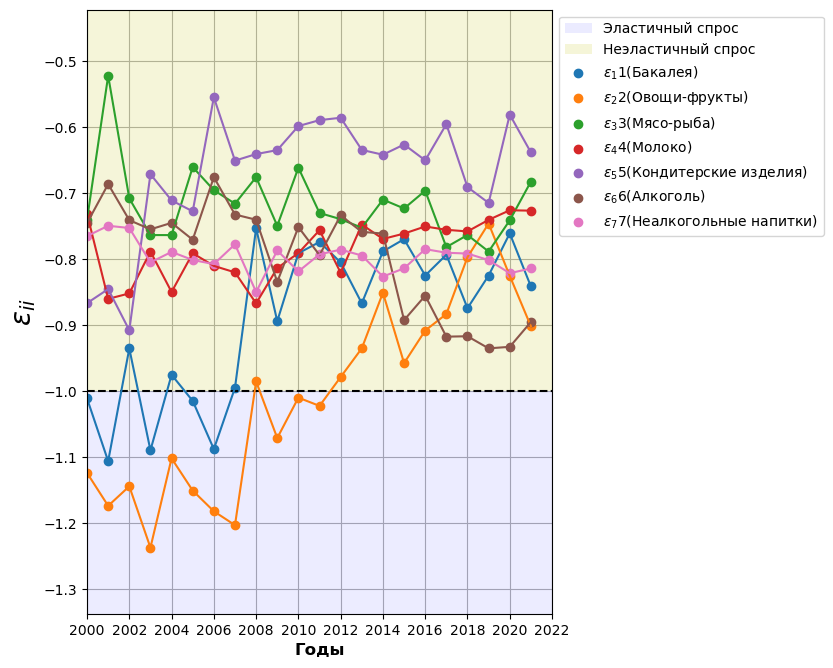

In [2020]:
FAST_price_elast_plot(list(range(2000,2022)))

# Получение Хиксианских эластичностей

In [2404]:
def FAST_hicks_price_elast(year,price_index='Stone',
                     how='on_mean',constrained=False,
                     out=False,n_neighbors=30,contamination='auto', diag=False,compensated=False):
    
    fff_e=FAST_price_elast(year,price_index=price_index,how=how,constrained=constrained,
                           out=out,n_neighbors=n_neighbors,contamination=contamination, diag=False)
    
    fff_itog=fff_e.copy(deep=1)
    fff_n=FAST_cost_elast(year,price_index=price_index,how=how,constrained=constrained,
                     out=out,n_neighbors=n_neighbors,contamination=contamination)
    
    if how=='on_mean':
        fff_w=FAST_food_agregates_shares(year,total=0,del_zero=1).mean()
        
        fff_element=fff_e.copy(deep=1)
        for i in fff_e.index:
            for j in fff_e.columns:
                fff_element.loc[i,j]=fff_n.loc[i]*fff_w.loc[j]

    
    for i in fff_e.index:
        for j in fff_e.columns:
            fff_itog.loc[i,j]=fff_e.loc[i,j]+fff_element.loc[i,j]
            if compensated==True:
                fff_itog.loc[i,j]=fff_itog.loc[i,j]*fff_w.loc[i]
    return fff_itog

    

In [2406]:
nmb=FAST_hicks_price_elast(2012,compensated=1)

In [2407]:
Matrix(nmb.values).is_negative_semidefinite

Бакалея        Овощи-фрукты  \
Бакалея                 -0.733123339027015  0.0668816169901050   
Овощи-фрукты             0.166993520959853  -0.818061629330915   
Мясо-рыба               0.0272273359619884  0.0999805452288008   
Молоко                  0.0436084270225641   0.137583835069459   
Кондитерские изделия   -0.0558410194197800   0.128730062533664   
Алкоголь                 0.121173768133341   0.108756179689143   
Неалкогольные напитки    0.155412693590831   0.183656762768697   

                                 Мясо-рыба               Молоко  \
Бакалея                -0.0146317093883381   0.0730937436195592   
Овощи-фрукты             0.328837133422457    0.225794088068679   
Мясо-рыба               -0.400786490974269    0.202358774207474   
Молоко                   0.160313242369780   -0.666171827827727   
Кондитерские изделия     0.175379231254224   0.0746019304228527   
Алкоголь                 0.143133988636693  -0.0271461245186647   
Неалкогольные напитки    0.323497925707255    0.144725136886255   

                      Кондитерские изделия            Алкоголь  \
Бакалея                -0.0909178052148007  0.0230355855232121   
Овощи-фрукты             0.112626060880588   0.147030736674694   
Мясо-рыба               0.0954639554585742   0.111289079992783   
Молоко                  0.0101097677569182   0.109321807481135   
Кондитерские изделия    -0.485108115990548  0.0697551690010750   
Алкоголь                0.0207746253833314  -0.597339354031531   
Неалкогольные напитки    0.169710655071669  0.0810299470863282   

                      Неалкогольные напитки  
Бакалея                  0.0546160639220582  
Овощи-фрукты             0.0371919238095216  
Мясо-рыба                0.0627154864374368  
Молоко                   0.0604702473246951  
Кондитерские изделия     0.0582687999467660  
Алкоголь                 0.0205498494789847  
Неалкогольные напитки    -0.749525266423566

In [2408]:
Matrix(nmb.values).is_negative_semidefinite

False

In [2409]:
qwert1=FAST_hicks_price_elast(2012,compensated=1,constrained=1)

In [2410]:
Matrix(qwert1.values).is_negative_semidefinite

False

In [2411]:
qwert1

Бакалея        Овощи-фрукты  \
Бакалея                 -0.615755479866441   0.118319053428261   
Овощи-фрукты            0.0837260333106333  -0.826400442529769   
Мясо-рыба               0.0657594522405331  0.0944858954766877   
Молоко                  0.0724506832945959   0.146262578697394   
Кондитерские изделия   -0.0392916898948134   0.129679322746021   
Алкоголь                0.0263319006466490   0.124024343453412   
Неалкогольные напитки   0.0919686949348835   0.104948714089936   

                                Мясо-рыба              Молоко  \
Бакалея                 0.257679147269064   0.156022807218102   
Овощи-фрукты            0.232126098561019   0.201962868720290   
Мясо-рыба              -0.511355684996875   0.132861710179973   
Молоко                  0.251951537506235  -0.659806633242314   
Кондитерские изделия    0.211934035165534  0.0422791412597386   
Алкоголь                0.232301590838451   0.115067648609439   
Неалкогольные напитки   0.218797090907889   0.149051340689883   

                      Кондитерские изделия            Алкоголь  \
Бакалея                -0.0506369599684451  0.0490986750727911   
Овощи-фрукты             0.106579730296324   0.148760217537775   
Мясо-рыба               0.0705889698445304   0.106411743977629   
Молоко                  0.0295617689963877  0.0990428063363109   
Кондитерские изделия    -0.482348151874728  0.0678244079053371   
Алкоголь                0.0522434154393732  -0.584593438378040   
Неалкогольные напитки    0.128296928297619  0.0709287616502927   

                      Неалкогольные напитки  
Бакалея                  0.0852727568466668  
Овощи-фрукты             0.0532454941037282  
Мясо-рыба                0.0412479132775225  
Молоко                   0.0605372584113894  
Кондитерские изделия     0.0699229346929101  
Алкоголь                 0.0346245393907152  
Неалкогольные напитки    -0.763991530570504

In [2381]:
mmmmm=FAST_hicks_price_elast(2012)

In [2382]:
mmmmm.values

array([[-0.877294617140449, -0.118051191857889, -0.374902343657511,
        -0.151092186986098, -0.261678300879674, -0.180594661026824,
        -0.0759841188683655],
       [-0.0961296630780222, -1.13918049201525, -0.241753130223612,
        -0.151174282578258, -0.188328374554983, -0.200690919598066,
        -0.206622248298475],
       [-0.396414911064567, -0.371593186715088, -1.07853997581659,
        -0.315372704503527, -0.359444553091128, -0.382270969369954,
        -0.344968509290302],
       [-0.184324799318323, -0.131792256065937, -0.287331467763583,
        -0.975457161536930, -0.244857118216428, -0.179064251354824,
        -0.153665041145619],
       [-0.230690694609703, -0.0878572545003615, -0.220744703450249,
        -0.182178497803515, -0.687183737288918, -0.165977330859673,
        -0.102684794654021],
       [-0.0901992548780509, -0.144928278484306, -0.292555288739347,
        -0.321576253579041, -0.218198635748748, -0.870432195765901,
        -0.176736054881811],
       [

In [2387]:
mmmmm

Бакалея         Овощи-фрукты  \
Бакалея                 -0.877294617140449   -0.118051191857889   
Овощи-фрукты           -0.0961296630780222    -1.13918049201525   
Мясо-рыба               -0.396414911064567   -0.371593186715088   
Молоко                  -0.184324799318323   -0.131792256065937   
Кондитерские изделия    -0.230690694609703  -0.0878572545003615   
Алкоголь               -0.0901992548780509   -0.144928278484306   
Неалкогольные напитки   0.0745024678119564   0.0774937036142498   

                                Мясо-рыба              Молоко  \
Бакалея                -0.374902343657511  -0.151092186986098   
Овощи-фрукты           -0.241753130223612  -0.151174282578258   
Мясо-рыба               -1.07853997581659  -0.315372704503527   
Молоко                 -0.287331467763583  -0.975457161536930   
Кондитерские изделия   -0.220744703450249  -0.182178497803515   
Алкоголь               -0.292555288739347  -0.321576253579041   
Неалкогольные напитки   0.108708502184161  0.0142437431316587   

                      Кондитерские изделия             Алкоголь  \
Бакалея                 -0.261678300879674   -0.180594661026824   
Овощи-фрукты            -0.188328374554983   -0.200690919598066   
Мясо-рыба               -0.359444553091128   -0.382270969369954   
Молоко                  -0.244857118216428   -0.179064251354824   
Кондитерские изделия    -0.687183737288918   -0.165977330859673   
Алкоголь                -0.218198635748748   -0.870432195765901   
Неалкогольные напитки   0.0723277142520895  -0.0367166632824864   

                      Неалкогольные напитки  
Бакалея                 -0.0759841188683655  
Овощи-фрукты             -0.206622248298475  
Мясо-рыба                -0.344968509290302  
Молоко                   -0.153665041145619  
Кондитерские изделия     -0.102684794654021  
Алкоголь                 -0.176736054881811  
Неалкогольные напитки    -0.822027844041538

In [2388]:
FAST_hicks_price_elast(2012,constrained=1)

Бакалея         Овощи-фрукты  \
Бакалея                -0.767848789784921  -0.0767755824678199   
Овощи-фрукты           -0.177729774498280    -1.14548441816958   
Мясо-рыба              -0.350849555908150   -0.369258846963510   
Молоко                 -0.157231717201664   -0.125180721788098   
Кондитерские изделия   -0.214810183822329  -0.0877364639766098   
Алкоголь               -0.189635685193815   -0.135174390691642   
Неалкогольные напитки  0.0152073761864501  0.00422947440650165   

                                Мясо-рыба               Молоко  \
Бакалея                -0.122387908731619  -0.0804818604879123   
Овощи-фрукты           -0.334848411324849   -0.172616704061549   
Мясо-рыба               -1.17785721800327   -0.376274475710432   
Молоко                 -0.199128426759774   -0.971465442381339   
Кондитерские изделия   -0.185705116022194   -0.215483499611054   
Алкоголь               -0.212858155996455   -0.185762434936458   
Неалкогольные напитки  0.0150216194624328   0.0252607597056004   

                      Кондитерские изделия             Алкоголь  \
Бакалея                 -0.230780531759190   -0.165720799392457   
Овощи-фрукты            -0.192467597358226   -0.196757973365392   
Мясо-рыба               -0.376767222498129   -0.378954302657320   
Молоко                  -0.227361749165166   -0.191556345557574   
Кондитерские изделия    -0.685196734071014   -0.168809794019171   
Алкоголь                -0.191924348033152   -0.863622431290277   
Неалкогольные напитки   0.0359075808578870  -0.0407800489859525   

                      Неалкогольные напитки  
Бакалея                 -0.0525037429976746  
Овощи-фрукты             -0.189023660386974  
Мясо-рыба                -0.359667779834593  
Молоко                   -0.155241317956695  
Кондитерские изделия    -0.0916463246486614  
Алкоголь                 -0.166949719604755  
Неалкогольные напитки    -0.832776327758270

In [2384]:
Matrix(FAST_hicks_price_elast(2012).values).is_negative_semidefinite

True

In [2386]:
Matrix(FAST_hicks_price_elast(2012,constrained=1).values).is_negative_semidefinite

True

# Фиттинг кривой

In [1701]:
def FAST_wrong_AIDS_matrix(year,price_index='Stone'):
    aids_shares=FAST_food_agregates_shares(year,del_zero=True,total=0)
    aids_prices=np.log(FAST_food_agregate_price(year,good_price_names=1))
    
    if price_index=='Stone':
        aids_resid=pd.Series(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1]))
        
    if price_index=='Laspeyres':
        aids_resid=pd.Series(np.log(FAST_food_agregates(year,'costs',del_zero=1,total=1).iloc[:,-1]))
    
    result=aids_shares.join(aids_prices)
    result.loc[:,'Доход']=aids_resid
    result=sm.add_constant(result)
    return result

In [1689]:
def FAST_wrong_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto'):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_wrong_AIDS_matrix(year,price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
#7
    #equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Доход']]}
    
    
    
    if constrained==True:
        mod=SUR(equations)
        mod.add_constraints(r)
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1)
        return modfit

    if fitted==False:
        return SUR(equations)

In [1698]:
pd.Series(np.log(FAST_food_agregates(2012,'costs',del_zero=1,total=1).iloc[:,-1]))

10      8.694837
16      8.135054
23      7.884200
25      8.321422
27      7.137278
          ...   
6503    7.437324
6504    8.000182
6506    7.783599
6511    8.215277
6512    8.908559
Name: Сумма, Length: 1415, dtype: float64

In [1678]:
FAST_AIDS(2012)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0922
No. Equations.:                     6   McElroy's R-squared:                 0.1292
No. Observations:                1415   Judge's (OLS) R-squared:             0.0922
Date:                Fri, Sep 09 2022   Berndt's R-squared:                  0.5519
Time:                        21:55:21   Dhrymes's R-squared:                 0.0922
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.3612     0.0245     14.759     0.0000      0.3133      0.4092
Цена на Бакалея                   0.0150     0.0028     5.3612     0.0000      0.0095      0.0205
Цена на Овощи-фрукты             -0.0045     0.0019    -2.4206     0.0155     -0.0081     -0.0009
Цена на Мясо-рыба                -0.0265     0.0045    -5.8369     0.0000     -0.0354     -0.0176
Цена на Молоко                   -0.0074     0.0024    -3.0649     0.0022     -0.0121     -0.0027
Цена на Кондитерские изделия     -0.0159     0.0020    -7.9017     0.0000     -0.0199     -0.0120
Цена на Алкоголь                 -0.0095     0.0013    -7.4206     0.0000     -0.0120     -0.0070
Цена на Неалкогольные напитки    -0.0009     0.0009    -0.9192     0.3580     -0.0027      0.0010
Остаток                          -0.0065     0.0022    -2.9556     0.0031     -0.0109     -0.0022
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.1062     0.0455    -2.3327     0.0197     -0.1955     -0.0170
Цена на Бакалея                   0.0099     0.0048     2.0818     0.0374      0.0006      0.0192
Цена на Овощи-фрукты              0.0073     0.0045     1.6099     0.1074     -0.0016      0.0162
Цена на Мясо-рыба                 0.0043     0.0075     0.5707     0.5682     -0.0104      0.0190
Цена на Молоко                    0.0075     0.0046     1.6376     0.1015     -0.0015      0.0166
Цена на Кондитерские изделия      0.0019     0.0035     0.5494     0.5827     -0.0049      0.0088
Цена на Алкоголь               3.318e-05     0.0025     0.0131     0.9895     -0.0049      0.0050
Цена на Неалкогольные напитки    -0.0026     0.0018    -1.4667     0.1425     -0.0061      0.0009
Остаток                           0.0357     0.0076     4.6817     0.0000      0.0207      0.0506
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.1402     0.0693    -2.0231     0.0431     -0.2760     -0.0044
Цена на Бакалея                  -0.0169     0.0079    -2.1435     0.0321     -0.0324     -0.0014
Цена на Овощи-фрукты             -0.0073     0.0066    -1.1153     0.2647     -0.0203      0.0056
Цена на Мясо-рыба                 0.0

In [1702]:
FAST_wrong_AIDS(2012)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.1169
No. Equations.:                     6   McElroy's R-squared:                 0.1325
No. Observations:                1415   Judge's (OLS) R-squared:             0.1169
Date:                Fri, Sep 09 2022   Berndt's R-squared:                  0.5589
Time:                        22:06:07   Dhrymes's R-squared:                 0.1169
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.4085     0.0234     17.467     0.0000      0.3627      0.4543
Цена на Бакалея                   0.0166     0.0027     6.0866     0.0000      0.0112      0.0219
Цена на Овощи-фрукты             -0.0032     0.0018    -1.7669     0.0773     -0.0067      0.0003
Цена на Мясо-рыба                -0.0201     0.0044    -4.5637     0.0000     -0.0288     -0.0115
Цена на Молоко                   -0.0043     0.0024    -1.8250     0.0680     -0.0090      0.0003
Цена на Кондитерские изделия     -0.0128     0.0020    -6.3419     0.0000     -0.0167     -0.0088
Цена на Алкоголь                 -0.0073     0.0013    -5.8548     0.0000     -0.0098     -0.0049
Цена на Неалкогольные напитки     0.0003     0.0009     0.2737     0.7843     -0.0016      0.0021
Доход                            -0.0199     0.0023    -8.5317     0.0000     -0.0245     -0.0153
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0245     0.0427     0.5736     0.5662     -0.0592      0.1081
Цена на Бакалея                   0.0099     0.0049     2.0348     0.0419      0.0004      0.0195
Цена на Овощи-фрукты              0.0046     0.0052     0.8818     0.3779     -0.0056      0.0149
Цена на Мясо-рыба                -0.0008     0.0079    -0.1013     0.9193     -0.0162      0.0146
Цена на Молоко                    0.0064     0.0048     1.3423     0.1795     -0.0030      0.0159
Цена на Кондитерские изделия      0.0012     0.0036     0.3458     0.7295     -0.0058      0.0083
Цена на Алкоголь                 -0.0027     0.0025    -1.0972     0.2725     -0.0076      0.0021
Цена на Неалкогольные напитки    -0.0042     0.0018    -2.3403     0.0193     -0.0078     -0.0007
Доход                             0.0059     0.0056     1.0490     0.2942     -0.0051      0.0170
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.3424     0.0643    -5.3257     0.0000     -0.4684     -0.2164
Цена на Бакалея                  -0.0232     0.0077    -3.0148     0.0026     -0.0382     -0.0081
Цена на Овощи-фрукты             -0.0122     0.0064    -1.9173     0.0552     -0.0247      0.0003
Цена на Мясо-рыба                 0.0

# Вопрос коллинеарности цен

## Проверка коллинеарности цен по критерию VIF

VIF>10 - Выраженная мультиколлинераность

10>VIF>5 - Мультиколлинераность

5>VIF>1 - Нет мультиколлинеарности

In [2225]:
def check_price_collinearity(year,norm=False):
    if norm==False:
        ddd=FAST_food_agregate_price(year)
    if norm==True:
        ddd=FAST_food_agregate_price(year)
        ddd=ddd/(ddd.mean())
    vif_data=pd.DataFrame()
    vif_data.index = ddd.columns
    vif_data["VIF"] = [variance_inflation_factor(ddd.values, i) for i in range(len(ddd.columns))]
    return vif_data

In [2228]:
def check_period_price_collinearity(period,norm=False):
    asdf=pd.DataFrame(index=['Бакалея','Овощи-фрукты','Мясо-рыба','Молоко','Кондитерские изделия','Алкоголь','Неалкогольные напитки'])
    for i in period:
        if (i<1994) or (i==1997) or (i==1999) or (i>2021) :
            print('Волны {0} года не существует.'.format(i))
            continue
        asdf.loc[:,i]=check_price_collinearity(i,norm=norm)
    return asdf

## Примеры

In [2226]:
check_price_collinearity(1994,norm=False)

VIF
Бакалея                3.004739
Овощи-фрукты           3.319183
Мясо-рыба              3.669274
Молоко                 3.795278
Кондитерские изделия   2.830442
Алкоголь               2.461564
Неалкогольные напитки  1.853225

In [2230]:
all_vifs=check_period_price_collinearity(list(range(1993,2023)),norm=False)

Волны 1993 года не существует.
Волны 1997 года не существует.
Волны 1999 года не существует.
Волны 2022 года не существует.


In [2302]:
round(all_vifs,2).T

Бакалея  Овощи-фрукты  Мясо-рыба  Молоко  Кондитерские изделия  \
1994     3.00          3.32       3.67    3.80                  2.83   
1995     4.10          3.46       5.12    5.66                  2.88   
1996     3.75          3.54       7.76    5.89                  3.76   
1998     5.19          2.22       7.17    5.09                  3.60   
2000     1.40          2.05       2.41    4.35                  3.62   
2001     2.70          3.08       8.12    5.73                  3.80   
2002     1.96          2.80       5.00    4.75                  3.21   
2003     3.17          2.74       9.66    5.68                  2.91   
2004     2.08          2.64       8.55    5.86                  3.61   
2005     4.56          3.13       7.32    5.95                  4.29   
2006     2.39          3.22       6.23    4.99                  3.94   
2007     3.26          3.15       8.71    4.43                  3.81   
2008     4.94          4.06       6.81    5.85                  2.30   
2009     2.75          1.68       6.55    5.04                  3.36   
2010     2.02          3.87       7.00    4.40                  3.40   
2011     3.89          3.60       7.13    6.10                  3.96   
2012     2.17          2.85       7.00    5.55                  3.77   
2013     4.57          3.02       8.70    5.24                  4.25   
2014     2.66          3.07       5.07    4.48                  3.65   
2015     3.67          2.90       6.40    4.21                  3.70   
2016     2.40          2.50       6.46    4.30                  3.28   
2017     6.17          2.62       7.08    4.40                  4.16   
2018     4.57          2.85       7.24    4.39                  4.21   
2019     5.83          2.87       6.75    4.94                  3.89   
2020     5.71          2.61       8.46    4.86                  4.59   
2021     7.10          2.95       9.94    5.39                  4.78   

      Алкоголь  Неалкогольные напитки  
1994      2.46                   1.85  
1995      2.06                   2.19  
1996      2.22                   2.27  
1998      2.32                   2.01  
2000      1.95                   1.89  
2001      1.48                   1.89  
2002      1.78                   1.70  
2003      2.01                   1.98  
2004      1.66                   1.91  
2005      1.97                   1.82  
2006      1.81                   1.93  
2007      1.83                   2.04  
2008      1.61                   1.98  
2009      1.81                   2.16  
2010      1.51                   1.95  
2011      1.60                   2.09  
2012      1.39                   2.12  
2013      1.70                   2.15  
2014      1.72                   2.20  
2015      1.94                   2.27  
2016      1.67                   1.88  
2017      2.24                   2.35  
2018      2.43                   2.30  
2019      2.62                   2.36  
2020      2.31                   2.77  
2021      2.61                   2.52

In [2304]:
import dataframe_image as dfi

In [2321]:
CVBN=round(all_vifs,2).T

In [2322]:
CVBN_STYLED=CVBN.style.background_gradient()

In [2323]:
dfi.export(CVBN_STYLED,"mytable.png")

![](mytable.png)

In [2241]:
for i in all_vifs.columns:
    for j in all_vifs.index:
        if all_vifs.loc[j,i]>5:
            print(i,':', j,'=', round(all_vifs.loc[j,i],2))

1995 : Мясо-рыба = 5.12
1995 : Молоко = 5.66
1996 : Мясо-рыба = 7.76
1996 : Молоко = 5.89
1998 : Бакалея = 5.19
1998 : Мясо-рыба = 7.17
1998 : Молоко = 5.09
2001 : Мясо-рыба = 8.12
2001 : Молоко = 5.73
2002 : Мясо-рыба = 5.0
2003 : Мясо-рыба = 9.66
2003 : Молоко = 5.68
2004 : Мясо-рыба = 8.55
2004 : Молоко = 5.86
2005 : Мясо-рыба = 7.32
2005 : Молоко = 5.95
2006 : Мясо-рыба = 6.23
2007 : Мясо-рыба = 8.71
2008 : Мясо-рыба = 6.81
2008 : Молоко = 5.85
2009 : Мясо-рыба = 6.55
2009 : Молоко = 5.04
2010 : Мясо-рыба = 7.0
2011 : Мясо-рыба = 7.13
2011 : Молоко = 6.1
2012 : Мясо-рыба = 7.0
2012 : Молоко = 5.55
2013 : Мясо-рыба = 8.7
2013 : Молоко = 5.24
2014 : Мясо-рыба = 5.07
2015 : Мясо-рыба = 6.4
2016 : Мясо-рыба = 6.46
2017 : Бакалея = 6.17
2017 : Мясо-рыба = 7.08
2018 : Мясо-рыба = 7.24
2019 : Бакалея = 5.83
2019 : Мясо-рыба = 6.75
2020 : Бакалея = 5.71
2020 : Мясо-рыба = 8.46
2021 : Бакалея = 7.1
2021 : Мясо-рыба = 9.94
2021 : Молоко = 5.39


In [2232]:
 check_price_collinearity(2021,norm=False)

VIF
Бакалея                7.098523
Овощи-фрукты           2.947312
Мясо-рыба              9.943625
Молоко                 5.390298
Кондитерские изделия   4.775405
Алкоголь               2.614418
Неалкогольные напитки  2.518975

In [2233]:
 check_price_collinearity(2021,norm=True)

VIF
Бакалея                7.098523
Овощи-фрукты           2.947312
Мясо-рыба              9.943625
Молоко                 5.390298
Кондитерские изделия   4.775405
Алкоголь               2.614418
Неалкогольные напитки  2.518975

In [2234]:
 check_price_collinearity(1994,norm=True)

VIF
Бакалея                3.004739
Овощи-фрукты           3.319183
Мясо-рыба              3.669274
Молоко                 3.795278
Кондитерские изделия   2.830442
Алкоголь               2.461564
Неалкогольные напитки  1.853225

In [2235]:
check_price_collinearity(1994)

VIF
Бакалея                3.004739
Овощи-фрукты           3.319183
Мясо-рыба              3.669274
Молоко                 3.795278
Кондитерские изделия   2.830442
Алкоголь               2.461564
Неалкогольные напитки  1.853225

In [2203]:
FAST_food_agregate_price(2021).corr()

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
Бакалея                1.000000      0.086829   0.234099  0.339550   
Овощи-фрукты           0.086829      1.000000   0.270356  0.145216   
Мясо-рыба              0.234099      0.270356   1.000000  0.315036   
Молоко                 0.339550      0.145216   0.315036  1.000000   
Кондитерские изделия   0.229137      0.136564   0.313669  0.280885   
Алкоголь               0.188597      0.117414   0.156468  0.208231   
Неалкогольные напитки  0.042007     -0.002057   0.076641  0.046009   

                       Кондитерские изделия  Алкоголь  Неалкогольные напитки  
Бакалея                            0.229137  0.188597               0.042007  
Овощи-фрукты                       0.136564  0.117414              -0.002057  
Мясо-рыба                          0.313669  0.156468               0.076641  
Молоко                             0.280885  0.208231               0.046009  
Кондитерские изделия               1.000000  0.193671              -0.038725  
Алкоголь                           0.193671  1.000000               0.023097  
Неалкогольные напитки             -0.038725  0.023097               1.000000

In [2206]:
(FAST_food_agregate_price(2021)/(FAST_food_agregate_price(2021).mean())).corr()

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
Бакалея                1.000000      0.086829   0.234099  0.339550   
Овощи-фрукты           0.086829      1.000000   0.270356  0.145216   
Мясо-рыба              0.234099      0.270356   1.000000  0.315036   
Молоко                 0.339550      0.145216   0.315036  1.000000   
Кондитерские изделия   0.229137      0.136564   0.313669  0.280885   
Алкоголь               0.188597      0.117414   0.156468  0.208231   
Неалкогольные напитки  0.042007     -0.002057   0.076641  0.046009   

                       Кондитерские изделия  Алкоголь  Неалкогольные напитки  
Бакалея                            0.229137  0.188597               0.042007  
Овощи-фрукты                       0.136564  0.117414              -0.002057  
Мясо-рыба                          0.313669  0.156468               0.076641  
Молоко                             0.280885  0.208231               0.046009  
Кондитерские изделия               1.000000  0.193671              -0.038725  
Алкоголь                           0.193671  1.000000               0.023097  
Неалкогольные напитки             -0.038725  0.023097               1.000000

# Статистики цен во времени

In [2243]:
price_stat=pd.DataFrame(index=FAST_food_agregate_price(2021).mean().index)
for i in range(2000,2022):
    price_stat.loc[:,i]=FAST_food_agregate_price(i).mean()

In [2244]:
price_stat

2000        2001        2002        2003  \
Бакалея                 11.791824   12.741134   15.048622   16.804038   
Овощи-фрукты            14.191943   18.198196   21.229860   24.698878   
Мясо-рыба               50.661727   65.491386   73.080086   75.349021   
Молоко                  27.055119   33.035949   37.620875   42.051401   
Кондитерские изделия    37.864436   45.948143   55.088022   60.307795   
Алкоголь                26.438389   34.520525   36.783495   40.100589   
Неалкогольные напитки  155.771202  186.729772  198.254557  223.641477   

                             2004        2005        2006        2007  \
Бакалея                 20.535495   19.282660   22.079847   26.849536   
Овощи-фрукты            30.828016   32.969408   39.002250   47.940433   
Мясо-рыба               91.287705  104.707944  113.808223  127.271590   
Молоко                  46.947386   50.961429   55.561124   75.889048   
Кондитерские изделия    69.109676   72.656892   85.014256   94.795378   
Алкоголь                45.555987   45.579407   54.207587   62.525653   
Неалкогольные напитки  239.517333  262.285870  302.258682  334.607575   

                             2008        2009  ...        2012        2013  \
Бакалея                 34.578742   36.354002  ...   46.797142   45.231737   
Овощи-фрукты            61.625008   63.076460  ...   75.990981   84.092872   
Мясо-рыба              159.330101  164.773730  ...  213.672094  215.181493   
Молоко                  87.188003   89.138190  ...  116.450840  124.258186   
Кондитерские изделия   125.809256  136.444017  ...  180.284775  185.702700   
Алкоголь                77.173081   69.809038  ...  108.871673  130.177543   
Неалкогольные напитки  368.547761  451.367148  ...  527.230297  571.447566   

                             2014        2015        2016        2017  \
Бакалея                 50.368911   58.446725   67.129226   62.449969   
Овощи-фрукты            92.172274  103.745995  108.712350  113.578950   
Мясо-рыба              246.261151  269.238298  272.329535  277.831394   
Молоко                 146.285477  152.454996  174.584020  185.249742   
Кондитерские изделия   203.541581  232.447424  250.469685  250.928814   
Алкоголь               147.940402  138.835614  160.864721  167.451410   
Неалкогольные напитки  614.409148  770.352387  875.824108  893.270910   

                             2018        2019         2020         2021  
Бакалея                 66.454026   70.325098    77.222957    88.152120  
Овощи-фрукты           113.730399  129.877517   134.107948   140.432830  
Мясо-рыба              287.171099  297.936584   310.471970   346.249494  
Молоко                 192.892343  216.322806   246.321172   251.682755  
Кондитерские изделия   247.999361  267.062549   277.553404   305.803152  
Алкоголь               158.163174  173.656547   195.176183   200.664206  
Неалкогольные напитки  892.386803  943.039208  1045.206361  1066.921649  

[7 rows x 22 columns]

<AxesSubplot:>

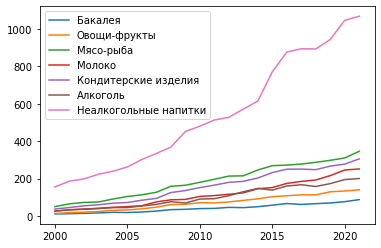

In [2246]:
price_stat.T.plot()

In [2291]:
zzzzz

Бакалея  Овощи-фрукты  Мясо-рыба     Молоко  Кондитерские изделия  \
2000        NaN           NaN        NaN        NaN                   NaN   
2001   8.050577     28.229069  29.271917  22.106092             21.349075   
2002  18.110543     16.659145  11.587324  13.878597             19.891727   
2003  11.664960     16.340281   3.104725  11.776775              9.475332   
2004  22.205718     24.815449  21.153139  11.642858             14.594931   
2005  -6.100829      6.946254  14.701037   8.550088              5.132735   
2006  14.506234     18.298301   8.691107   9.025836             17.007834   
2007  21.601999     22.917098  11.829872  36.586596             11.505273   
2008  28.787114     28.544955  25.189055  14.888782             32.716657   
2009   5.133962      2.355296   3.416573   2.236761              8.453083   
2010  10.531325     13.814551   9.535474  18.065995             11.727092   
2011   2.402584     -2.137949   9.029652   4.249963              8.425459   
2012  13.728894      8.163975   8.582644   6.139753              9.072381   
2013  -3.345088     10.661648   0.706409   6.704413              3.005204   
2014  11.357455      9.607714  14.443462  17.727034              9.606151   
2015  16.037302     12.556618   9.330399   4.217452             14.201444   
2016  14.855410      4.787033   1.148141  14.515119              7.753263   
2017  -6.970521      4.476585   2.020295   6.109220              0.183307   
2018   6.411624      0.133342   3.361645   4.125566             -1.167444   
2019   5.825188     14.197715   3.748805  12.146912              7.686789   
2020   9.808531      3.257247   4.207401  13.867408              3.928239   
2021  14.152739      4.716261  11.523592   2.176663             10.178130   

       Алкоголь  Неалкогольные напитки  
2000        NaN                    NaN  
2001  30.569702              19.874386  
2002   6.555432               6.171906  
2003   9.017888              12.805214  
2004  13.604283               7.098798  
2005   0.051409               9.506008  
2006  18.929996              15.240170  
2007  15.344837              10.702386  
2008  23.426271              10.143281  
2009  -9.542244              22.471819  
2010  30.461300               6.376627  
2011   2.208553               6.854444  
2012  16.959177               2.761777  
2013  19.569710               8.386709  
2014  13.645102               7.518027  
2015  -6.154362              25.381009  
2016  15.867043              13.691360  
2017   4.094552               1.992044  
2018  -5.546825              -0.098974  
2019   9.795816               5.676059  
2020  12.392067              10.833818  
2021   2.811830               2.077608

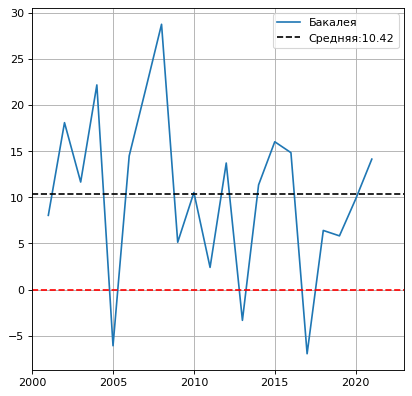

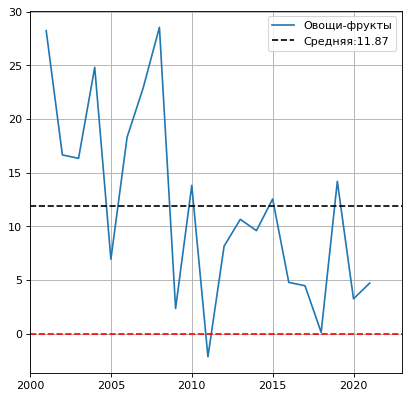

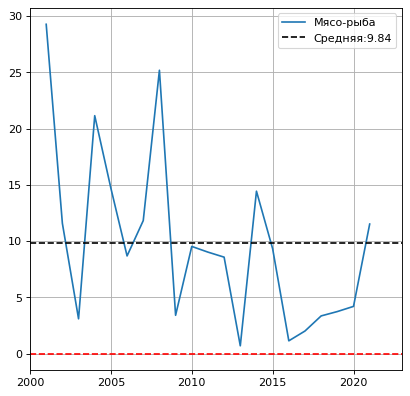

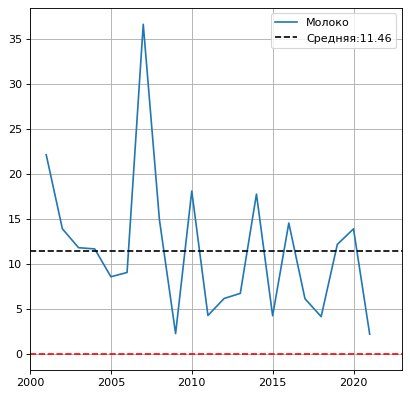

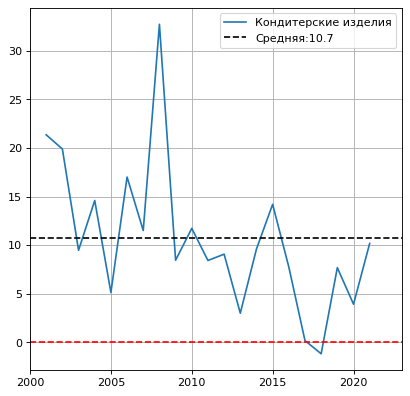

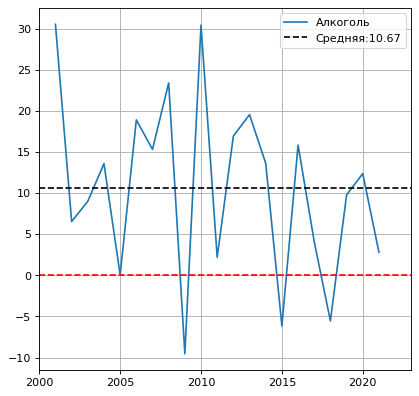

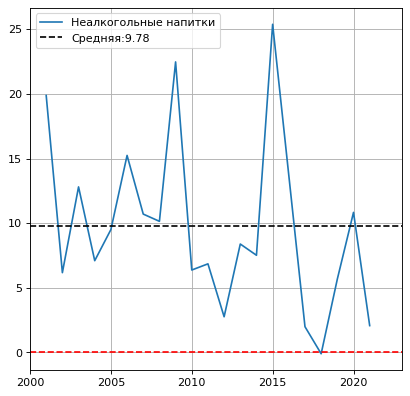

In [2300]:
zzzzz=price_stat.T.pct_change()*100
for i in zzzzz.columns:
    plt.figure(figsize=(6, 6), dpi=80)
    plt.grid()
    plt.plot(zzzzz.loc[:,i],label=i)
    mmm=zzzzz.loc[:,i].mean()
    plt.plot([2000,2023],[mmm,mmm],label='Средняя:'+str(round(mmm,2)), c='black',ls='--')
    plt.plot([2000,2023],[0,0], c='r',ls='--')
    plt.xlim(2000,2023)
    plt.legend()

In [2265]:
asd48=pd.Series()
for i in range(2000,2022):
    asd48[str(i)]=food_df(i, 'price')['e1.48'].mean()

C:\Users\79618\AppData\Local\Temp\ipykernel_24620\264391767.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  asd48=pd.Series()


<AxesSubplot:>

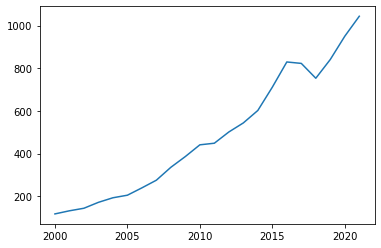

In [2269]:
asd48.plot()

In [2270]:
asd49=pd.Series()
for i in range(2000,2022):
    asd49[str(i)]=food_df(i, 'price')['e1.49'].mean()

C:\Users\79618\AppData\Local\Temp\ipykernel_24620\2038741081.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  asd49=pd.Series()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:>

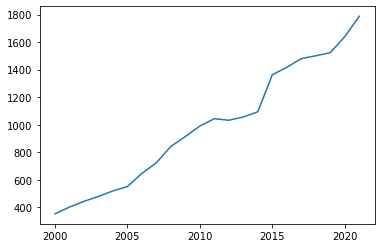

In [2272]:
asd49.plot()

In [2271]:
asd50=pd.Series()
for i in range(2000,2022):
    asd50[str(i)]=food_df(i, 'price')['e1.50'].mean()

C:\Users\79618\AppData\Local\Temp\ipykernel_24620\652370077.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  asd50=pd.Series()


<AxesSubplot:>

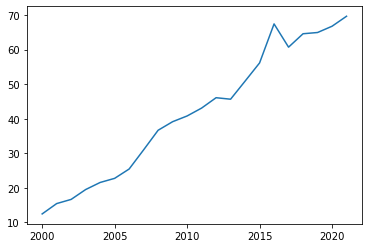

In [2273]:
asd50.plot()

# trouble-shooting

In [ ]:
# оценка не работает для 2018 года

In [1972]:
zxcvbn=FAST_food_agregate_price(2012).corr()
zxcvbn

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
Бакалея                1.000000      0.145181   0.109674  0.114293   
Овощи-фрукты           0.145181      1.000000   0.168143  0.137271   
Мясо-рыба              0.109674      0.168143   1.000000  0.263349   
Молоко                 0.114293      0.137271   0.263349  1.000000   
Кондитерские изделия   0.091795      0.162941   0.255121  0.195825   
Алкоголь               0.109564      0.054765   0.084131  0.113461   
Неалкогольные напитки -0.035640      0.068685   0.041250  0.093378   

                       Кондитерские изделия  Алкоголь  Неалкогольные напитки  
Бакалея                            0.091795  0.109564              -0.035640  
Овощи-фрукты                       0.162941  0.054765               0.068685  
Мясо-рыба                          0.255121  0.084131               0.041250  
Молоко                             0.195825  0.113461               0.093378  
Кондитерские изделия               1.000000  0.151139              -0.032356  
Алкоголь                           0.151139  1.000000              -0.004610  
Неалкогольные напитки             -0.032356 -0.004610               1.000000

In [ ]:
import missingno as msno
# msno.matrix(census_data)

In [ ]:
msno.matrix(FAST_food_df(2016,'prices',rename_del='names'),labels=1)

In [ ]:
msno.bar(FAST_food_df(2016,'prices',rename_del='names'))

In [ ]:
FAST_food_df(2016,'prices',rename_del='names')

In [ ]:
msno.heatmap(FAST_food_df(2016,'prices',rename_del='names'))

In [ ]:
def FAST_share_plot(period):
    df2=pd.DataFrame(FAST_food_agregates_shares(period[0]).mean(),columns=[2000])
    for i in period:
        df2[i]=FAST_food_agregates_shares(i).mean()
    plt.figure(figsize=(8, 6), dpi=100)    
    for i in list(df2.index)[:-1]:
        plt.plot(list(df2.columns),df2.loc[i]*100,label=i)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.40, 1))
    plt.legend(bbox_to_anchor=(1.40, 1),title='Агрегаты',title_fontsize='large')
    plt.xlabel('Год',fontsize='large',fontweight=700)
    plt.ylabel('Средняя доля \nв расходах на питание\nдосашнего хозяйства',fontsize='large',fontweight=700)

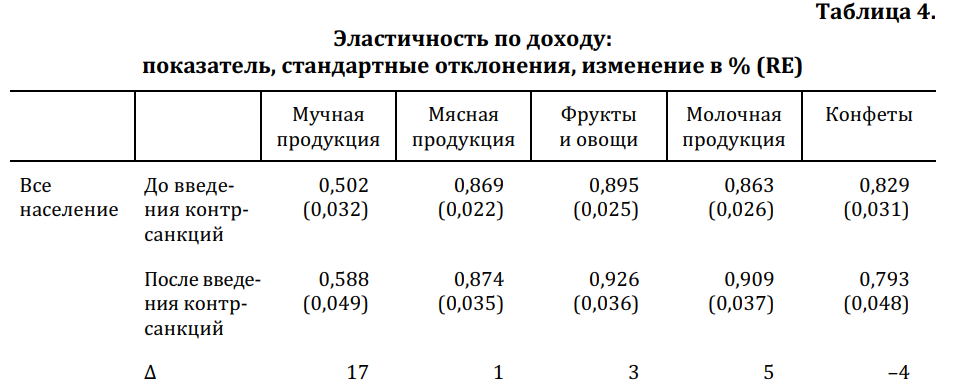

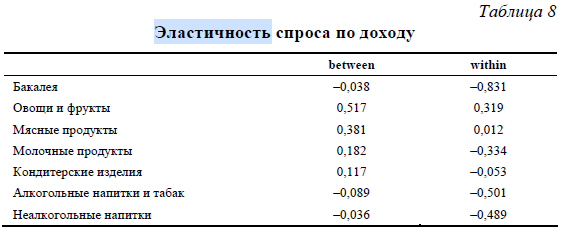

In [2046]:
FAST_HOUSEHOLDS_DFS[2021]['z_nfm']

0       1.0
1       1.0
2       3.0
3       1.0
4       1.0
       ... 
4834    5.0
4835    2.0
4836    2.0
4837    1.0
4838    1.0
Name: z_nfm, Length: 4839, dtype: float64

In [2048]:
FAST_AIDS_matrix(2021)

const   Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
5       1.0  0.034565      0.186001   0.564701  0.089004   
16      1.0  0.078289      0.149919   0.181195  0.202785   
36      1.0  0.110638      0.055504   0.288622  0.164477   
73      1.0  0.072850      0.082096   0.363407  0.167554   
74      1.0  0.059926      0.110481   0.106535  0.141060   
...     ...       ...           ...        ...       ...   
4811    1.0  0.035871      0.189509   0.233164  0.203046   
4813    1.0  0.100346      0.086505   0.179931  0.176471   
4832    1.0  0.087468      0.031960   0.275021  0.276703   
4833    1.0  0.129657      0.156483   0.143070  0.211624   
4834    1.0  0.103788      0.288355   0.155732  0.146689   

      Кондитерские изделия  Алкоголь  Неалкогольные напитки  Цена на Бакалея  \
5                 0.009073  0.060488               0.056168         4.339922   
16                0.084746  0.220541               0.082526         4.982258   
36                0.064755  0.240518               0.075486         4.373967   
73                0.026338  0.182124               0.105632         4.263581   
74                0.089273  0.473490               0.019236         4.071848   
...                    ...       ...                    ...              ...   
4811              0.142132  0.135364               0.060914         4.691290   
4813              0.013841  0.415225               0.027682         4.389660   
4832              0.089151  0.168209               0.071489         5.000243   
4833              0.053651  0.250373               0.055142         4.368595   
4834              0.065307  0.200944               0.039184         4.849588   

      Цена на Овощи-фрукты  Цена на Мясо-рыба  Цена на Молоко  \
5                 3.850235           5.623245        5.233980   
16                4.367099           5.285410        5.771368   
36                5.010635           5.750717        4.933956   
73                3.625932           5.766582        4.804873   
74                4.290847           5.404629        4.797133   
...                    ...                ...             ...   
4811              5.302200           5.990839        5.801273   
4813              4.788602           5.651139        5.267892   
4832              5.502332           5.831921        5.510723   
4833              4.514516           5.448890        5.342349   
4834              4.060683           5.804617        5.319596   

      Цена на Кондитерские изделия  Цена на Алкоголь  \
5                         4.430817          4.941642   
16                        5.714832          5.212631   
36                        5.577031          4.867534   
73                        3.850148          4.174387   
74                        5.005688          5.277973   
...                            ...               ...   
4811                      6.420052          6.348139   
4813                      5.298317          5.564946   
4832                      6.068460          5.521461   
4833                      5.886104          4.787492   
4834                      5.623740          5.298317   

      Цена на Неалкогольные напитки   Остаток  
5                          7.863267  3.151869  
16                         7.168862  3.110030  
36                         7.002233  3.301297  
73                         6.927592  3.077640  
74                         5.743003  3.280767  
...                             ...       ...  
4811                       4.499810  2.197479  
4813                       4.382027  2.662507  
4832                       6.887793  2.986192  
4833                       7.387843  3.706514  
4834                       7.396310  4.125334  

[703 rows x 16 columns]

In [2049]:
q1=FAST_AIDS_matrix(2021)
q1['Членов семьи']=FAST_HOUSEHOLDS_DFS[2021]['z_nfm']
q1

const   Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
5       1.0  0.034565      0.186001   0.564701  0.089004   
16      1.0  0.078289      0.149919   0.181195  0.202785   
36      1.0  0.110638      0.055504   0.288622  0.164477   
73      1.0  0.072850      0.082096   0.363407  0.167554   
74      1.0  0.059926      0.110481   0.106535  0.141060   
...     ...       ...           ...        ...       ...   
4811    1.0  0.035871      0.189509   0.233164  0.203046   
4813    1.0  0.100346      0.086505   0.179931  0.176471   
4832    1.0  0.087468      0.031960   0.275021  0.276703   
4833    1.0  0.129657      0.156483   0.143070  0.211624   
4834    1.0  0.103788      0.288355   0.155732  0.146689   

      Кондитерские изделия  Алкоголь  Неалкогольные напитки  Цена на Бакалея  \
5                 0.009073  0.060488               0.056168         4.339922   
16                0.084746  0.220541               0.082526         4.982258   
36                0.064755  0.240518               0.075486         4.373967   
73                0.026338  0.182124               0.105632         4.263581   
74                0.089273  0.473490               0.019236         4.071848   
...                    ...       ...                    ...              ...   
4811              0.142132  0.135364               0.060914         4.691290   
4813              0.013841  0.415225               0.027682         4.389660   
4832              0.089151  0.168209               0.071489         5.000243   
4833              0.053651  0.250373               0.055142         4.368595   
4834              0.065307  0.200944               0.039184         4.849588   

      Цена на Овощи-фрукты  Цена на Мясо-рыба  Цена на Молоко  \
5                 3.850235           5.623245        5.233980   
16                4.367099           5.285410        5.771368   
36                5.010635           5.750717        4.933956   
73                3.625932           5.766582        4.804873   
74                4.290847           5.404629        4.797133   
...                    ...                ...             ...   
4811              5.302200           5.990839        5.801273   
4813              4.788602           5.651139        5.267892   
4832              5.502332           5.831921        5.510723   
4833              4.514516           5.448890        5.342349   
4834              4.060683           5.804617        5.319596   

      Цена на Кондитерские изделия  Цена на Алкоголь  \
5                         4.430817          4.941642   
16                        5.714832          5.212631   
36                        5.577031          4.867534   
73                        3.850148          4.174387   
74                        5.005688          5.277973   
...                            ...               ...   
4811                      6.420052          6.348139   
4813                      5.298317          5.564946   
4832                      6.068460          5.521461   
4833                      5.886104          4.787492   
4834                      5.623740          5.298317   

      Цена на Неалкогольные напитки   Остаток  Членов семьи  
5                          7.863267  3.151869           4.0  
16                         7.168862  3.110030           2.0  
36                         7.002233  3.301297           5.0  
73                         6.927592  3.077640           7.0  
74                         5.743003  3.280767           4.0  
...                             ...       ...           ...  
4811                       4.499810  2.197479           1.0  
4813                       4.382027  2.662507           2.0  
4832                       6.887793  2.986192           3.0  
4833                       7.387843  3.706514           5.0  
4834                       7.396310  4.125334           5.0  

[703 rows x 17 columns]

In [2052]:
q1['Членов семьи']=pd.Categorical(q1['Членов семьи'])

<AxesSubplot:>

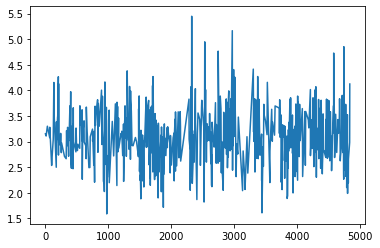

In [2060]:
q1['Остаток'].plot()

In [2054]:
q1['Членов семьи']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


5       4.0
16      2.0
36      5.0
73      7.0
74      4.0
       ... 
4811    1.0
4813    2.0
4832    3.0
4833    5.0
4834    5.0
Name: Членов семьи, Length: 703, dtype: category
Categories (13, float64): [1.0, 2.0, 3.0, 4.0, ..., 10.0, 11.0, 12.0, 15.0]

In [2074]:
def wrong_FAST_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto'):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year,price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь', 'Остаток']]}
#7
    #equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    
    
    
    if constrained==True:
        mod=SUR(equations)
        mod.add_constraints(r)
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

In [2075]:
wrong_FAST_AIDS(2021)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0775
No. Equations.:                     6   McElroy's R-squared:                 0.1055
No. Observations:                 703   Judge's (OLS) R-squared:             0.0775
Date:                Tue, Sep 13 2022   Berndt's R-squared:                  0.4772
Time:                        19:49:00   Dhrymes's R-squared:                 0.0775
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                         Equation: Бакалея, Dependent Variable: Бакалея                         
================================================================================================
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
const                            0.2501     0.0371     6.7363     0.0000      0.1774      0.3229
Цена на Бакалея                  0.0129     0.0044     2.9284     0.0034      0.0043      0.0216
Цена на Овощи-фрукты            -0.0068     0.0027    -2.4923     0.0127     -0.0121     -0.0015
Цена на Мясо-рыба               -0.0170     0.0054    -3.1465     0.0017     -0.0276     -0.0064
Цена на Молоко                  -0.0110     0.0036    -3.0881     0.0020     -0.0180     -0.0040
Цена на Кондитерские изделия    -0.0054     0.0032    -1.7179     0.0858     -0.0116      0.0008
Цена на Алкоголь                -0.0030     0.0026    -1.1494     0.2504     -0.0082      0.0021
Остаток                          0.0007     0.0034     0.1971     0.8438     -0.0060      0.0073
                    Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
================================================================================================
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
const                           -0.0700     0.0624    -1.1228     0.2615     -0.1923      0.0522
Цена на Бакалея                  0.0196     0.0088     2.2391     0.0252      0.0024      0.0368
Цена на Овощи-фрукты             0.0152     0.0059     2.5956     0.0094      0.0037      0.0267
Цена на Мясо-рыба               -0.0020     0.0118    -0.1711     0.8642     -0.0251      0.0211
Цена на Молоко                  -0.0013     0.0058    -0.2222     0.8242     -0.0126      0.0100
Цена на Кондитерские изделия    -0.0015     0.0056    -0.2600     0.7949     -0.0124      0.0095
Цена на Алкоголь                -0.0017     0.0044    -0.3789     0.7047     -0.0103      0.0069
Остаток                          0.0249     0.0097     2.5660     0.0103      0.0059      0.0440
                       Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
================================================================================================
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
const                            0.0630     0.0928     0.6790     0.4972     -0.1189      0.2449
Цена на Бакалея                 -0.0321     0.0133    -2.4086     0.0160     -0.0581     -0.0060
Цена на Овощи-фрукты            -0.0013     0.0072    -0.1762     0.8602     -0.0154      0.0128
Цена на Мясо-рыба                0.0923     0.0163     5.6687     0.0000      0.0604      0.1242
Цена на Молоко                  -0.0054     0.0074    -0.7381     0.4604     -0.0199      0.0090
Цена на Кондитерские изделия    -0.0073     0.0074    -0.9774     0.32

In [2076]:
FAST_AIDS(2021)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0809
No. Equations.:                     6   McElroy's R-squared:                 0.1248
No. Observations:                 703   Judge's (OLS) R-squared:             0.0809
Date:                Tue, Sep 13 2022   Berndt's R-squared:                  0.5381
Time:                        19:49:45   Dhrymes's R-squared:                 0.0809
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2397     0.0379     6.3206     0.0000      0.1653      0.3140
Цена на Бакалея                   0.0126     0.0044     2.8570     0.0043      0.0039      0.0212
Цена на Овощи-фрукты             -0.0066     0.0027    -2.4377     0.0148     -0.0119     -0.0013
Цена на Мясо-рыба                -0.0181     0.0055    -3.3224     0.0009     -0.0288     -0.0074
Цена на Молоко                   -0.0112     0.0036    -3.1374     0.0017     -0.0181     -0.0042
Цена на Кондитерские изделия     -0.0052     0.0031    -1.6671     0.0955     -0.0114      0.0009
Цена на Алкоголь                 -0.0031     0.0026    -1.1881     0.2348     -0.0083      0.0020
Цена на Неалкогольные напитки     0.0028     0.0012     2.3286     0.0199      0.0005      0.0052
Остаток                           0.0005     0.0034     0.1498     0.8809     -0.0061      0.0071
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0522     0.0619    -0.8427     0.3994     -0.1735      0.0692
Цена на Бакалея                   0.0203     0.0088     2.2973     0.0216      0.0030      0.0375
Цена на Овощи-фрукты              0.0149     0.0058     2.5404     0.0111      0.0034      0.0263
Цена на Мясо-рыба                -0.0001     0.0119    -0.0123     0.9902     -0.0235      0.0232
Цена на Молоко                   -0.0010     0.0058    -0.1709     0.8643     -0.0123      0.0103
Цена на Кондитерские изделия     -0.0018     0.0056    -0.3186     0.7500     -0.0127      0.0092
Цена на Алкоголь                 -0.0015     0.0043    -0.3434     0.7313     -0.0100      0.0070
Цена на Неалкогольные напитки    -0.0048     0.0024    -2.0151     0.0439     -0.0096     -0.0001
Остаток                           0.0252     0.0097     2.6075     0.0091      0.0063      0.0442
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0758     0.0939     0.8072     0.4195     -0.1083      0.2599
Цена на Бакалея                  -0.0316     0.0133    -2.3816     0.0172     -0.0576     -0.0056
Цена на Овощи-фрукты             -0.0015     0.0072    -0.2106     0.8332     -0.0157      0.0126
Цена на Мясо-рыба                 0.0

In [2078]:
FAST_AIDS(2021,constrained=1)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0762
No. Equations.:                     6   McElroy's R-squared:                 0.1182
No. Observations:                 703   Judge's (OLS) R-squared:             0.0762
Date:                Tue, Sep 13 2022   Berndt's R-squared:                  0.5164
Time:                        19:53:20   Dhrymes's R-squared:                 0.0762
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                         6
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0840     0.0118     7.1185     0.0000      0.0609      0.1071
Цена на Бакалея                   0.0222     0.0045     4.9334     0.0000      0.0134      0.0310
Цена на Овощи-фрукты             -0.0049     0.0027    -1.8271     0.0677     -0.0101      0.0004
Цена на Мясо-рыба                -0.0035     0.0046    -0.7653     0.4441     -0.0125      0.0055
Цена на Молоко                   -0.0118     0.0036    -3.2685     0.0011     -0.0188     -0.0047
Цена на Кондитерские изделия     -0.0042     0.0032    -1.3321     0.1828     -0.0104      0.0020
Цена на Алкоголь                 -0.0013     0.0027    -0.4975     0.6188     -0.0065      0.0039
Цена на Неалкогольные напитки     0.0035     0.0012     2.8494     0.0044      0.0011      0.0059
Остаток                           0.0020     0.0033     0.6033     0.5463     -0.0045      0.0085
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.0875     0.0319     2.7392     0.0062      0.0249      0.1501
Цена на Бакалея                   0.0116     0.0083     1.4026     0.1607     -0.0046      0.0278
Цена на Овощи-фрукты              0.0133     0.0057     2.3193     0.0204      0.0021      0.0245
Цена на Мясо-рыба                -0.0133     0.0101    -1.3068     0.1913     -0.0331      0.0066
Цена на Молоко                   -0.0004     0.0057    -0.0737     0.9413     -0.0116      0.0108
Цена на Кондитерские изделия     -0.0027     0.0056    -0.4787     0.6321     -0.0137      0.0083
Цена на Алкоголь                 -0.0031     0.0043    -0.7242     0.4689     -0.0115      0.0053
Цена на Неалкогольные напитки    -0.0054     0.0024    -2.2410     0.0250     -0.0102     -0.0007
Остаток                           0.0239     0.0098     2.4430     0.0146      0.0047      0.0430
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2750     0.0257     10.693     0.0000      0.2246      0.3254
Цена на Бакалея                  -0.0439     0.0121    -3.6425     0.0003     -0.0676     -0.0203
Цена на Овощи-фрукты             -0.0037     0.0071    -0.5251     0.5995     -0.0177      0.0102
Цена на Мясо-рыба                 0.0

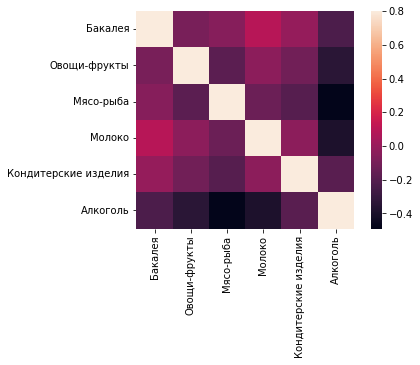

In [2086]:
cov = FAST_AIDS(2021).sigma
std = np.sqrt(np.diag(FAST_AIDS(2021).sigma)[:, None])
regions = [k for k in ['Бакалея','Овощи-фрукты','Мясо-рыба','Молоко','Кондитерские изделия','Алкоголь']]
corr = pd.DataFrame(cov / (std @ std.T), columns=regions, index=regions)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, vmax=0.8, square=True)
plt.show()

corr.style.format("{:0.3f}")

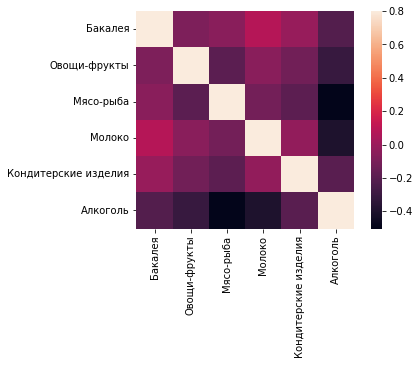

In [2087]:
cov = FAST_AIDS(2021, price_index='Laspeyres').sigma
std = np.sqrt(np.diag(FAST_AIDS(2021,price_index='Laspeyres').sigma)[:, None])
regions = [k for k in ['Бакалея','Овощи-фрукты','Мясо-рыба','Молоко','Кондитерские изделия','Алкоголь']]
corr = pd.DataFrame(cov / (std @ std.T), columns=regions, index=regions)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, vmax=0.8, square=True)
plt.show()

corr.style.format("{:0.3f}")

In [2084]:
FAST_AIDS(2012,fitted=True,cov_type_1="unadjusted",
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto')

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.0922
No. Equations.:                     6   McElroy's R-squared:                 0.1292
No. Observations:                1415   Judge's (OLS) R-squared:             0.0922
Date:                Tue, Sep 13 2022   Berndt's R-squared:                  0.5519
Time:                        21:13:59   Dhrymes's R-squared:                 0.0922
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.3612     0.0233     15.480     0.0000      0.3155      0.4070
Цена на Бакалея                   0.0150     0.0026     5.7770     0.0000      0.0099      0.0201
Цена на Овощи-фрукты             -0.0045     0.0019    -2.3748     0.0176     -0.0082     -0.0008
Цена на Мясо-рыба                -0.0265     0.0038    -6.9994     0.0000     -0.0339     -0.0191
Цена на Молоко                   -0.0074     0.0024    -3.1427     0.0017     -0.0120     -0.0028
Цена на Кондитерские изделия     -0.0159     0.0019    -8.2944     0.0000     -0.0197     -0.0122
Цена на Алкоголь                 -0.0095     0.0013    -7.3470     0.0000     -0.0120     -0.0069
Цена на Неалкогольные напитки    -0.0009     0.0009    -0.9270     0.3539     -0.0027      0.0010
Остаток                          -0.0065     0.0023    -2.8133     0.0049     -0.0111     -0.0020
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.1062     0.0432    -2.4604     0.0139     -0.1908     -0.0216
Цена на Бакалея                   0.0099     0.0048     2.0605     0.0394      0.0005      0.0193
Цена на Овощи-фрукты              0.0073     0.0035     2.0955     0.0361      0.0005      0.0142
Цена на Мясо-рыба                 0.0043     0.0070     0.6110     0.5412     -0.0094      0.0180
Цена на Молоко                    0.0075     0.0044     1.7313     0.0834     -0.0010      0.0161
Цена на Кондитерские изделия      0.0019     0.0036     0.5401     0.5891     -0.0050      0.0089
Цена на Алкоголь               3.318e-05     0.0024     0.0139     0.9889     -0.0046      0.0047
Цена на Неалкогольные напитки    -0.0026     0.0017    -1.4923     0.1356     -0.0060      0.0008
Остаток                           0.0357     0.0043     8.3098     0.0000      0.0273      0.0441
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.1402     0.0696    -2.0142     0.0440     -0.2766     -0.0038
Цена на Бакалея                  -0.0169     0.0077    -2.1818     0.0291     -0.0321     -0.0017
Цена на Овощи-фрукты             -0.0073     0.0056    -1.3052     0.1918     -0.0184      0.0037
Цена на Мясо-рыба                 0.0

In [ ]:
def FAST_dem_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto'):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year,price_index)
    final_df['Членов семьи']=FAST_HOUSEHOLDS_DFS[2021]['z_nfm']
    final_df['Членов семьи']=pd.Categorical(final_df['Членов семьи'])
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток','Членов семьи']]}
#7
    #equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
#                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    
    
    
    if constrained==True:
        mod=SUR(equations)
        mod.add_constraints(r)
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

In [2058]:
FAST_dem_AIDS(2021)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.1129
No. Equations.:                     6   McElroy's R-squared:                 0.1530
No. Observations:                 703   Judge's (OLS) R-squared:             0.1129
Date:                Tue, Sep 13 2022   Berndt's R-squared:                  0.6194
Time:                        18:10:39   Dhrymes's R-squared:                 0.1129
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.2590     0.0385     6.7252     0.0000      0.1835      0.3344
Цена на Бакалея                   0.0129     0.0045     2.8760     0.0040      0.0041      0.0217
Цена на Овощи-фрукты             -0.0074     0.0027    -2.7541     0.0059     -0.0127     -0.0021
Цена на Мясо-рыба                -0.0183     0.0054    -3.4194     0.0006     -0.0289     -0.0078
Цена на Молоко                   -0.0110     0.0033    -3.2810     0.0010     -0.0175     -0.0044
Цена на Кондитерские изделия     -0.0061     0.0032    -1.9462     0.0516     -0.0123   4.345e-05
Цена на Алкоголь                 -0.0028     0.0027    -1.0415     0.2977     -0.0080      0.0024
Цена на Неалкогольные напитки     0.0029     0.0012     2.4381     0.0148      0.0006      0.0053
Остаток                          -0.0080     0.0043    -1.8663     0.0620     -0.0163      0.0004
Членов семьи.2.0                  0.0077     0.0052     1.4747     0.1403     -0.0025      0.0180
Членов семьи.3.0                  0.0109     0.0053     2.0423     0.0411      0.0004      0.0213
Членов семьи.4.0                  0.0138     0.0053     2.6319     0.0085      0.0035      0.0241
Членов семьи.5.0                  0.0248     0.0070     3.5427     0.0004      0.0111      0.0385
Членов семьи.6.0                  0.0145     0.0073     1.9837     0.0473      0.0002      0.0288
Членов семьи.7.0                  0.0282     0.0160     1.7628     0.0779     -0.0032      0.0595
Членов семьи.8.0                  0.0342     0.0142     2.4074     0.0161      0.0064      0.0620
Членов семьи.9.0                  0.0630     0.0364     1.7336     0.0830     -0.0082      0.1343
Членов семьи.10.0                 0.0639     0.0091     7.0258     0.0000      0.0461      0.0818
Членов семьи.11.0                 0.0158     0.0074     2.1492     0.0316      0.0014      0.0302
Членов семьи.12.0                 0.1751     0.0058     29.954     0.0000      0.1637      0.1866
Членов семьи.15.0                 0.0214     0.0086     2.4936     0.0126      0.0046      0.0382
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -0.0489     0.0637    -0.7680     0.4425     -0.1737      0.0759
Цена на Бакалея                   0.0191     0.0089     2.1509     0.0315      0.0017      0.0365
Цена на Овощи-фрукты              0.0142     0.0059     2.4129     0.0158      0.0027      0.0257
Цена на Мясо-рыба                 0.0006     0.0117     0.0499     0.9602     -0.0223      0.0235
Цена на Молоко                 4.039e

In [2067]:
FAST_AIDS(2021).resids.mean()

Бакалея                 7.965416e-17
Овощи-фрукты           -1.134188e-15
Мясо-рыба               5.007098e-15
Молоко                  8.820193e-17
Кондитерские изделия    7.280311e-16
Алкоголь               -4.629772e-15
dtype: float64

In [2068]:
FAST_AIDS(2021).resids.cov()

Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
Бакалея               0.001665     -0.000297  -0.000243  0.000244   
Овощи-фрукты         -0.000297      0.006009  -0.001526 -0.000182   
Мясо-рыба            -0.000243     -0.001526   0.011659 -0.000969   
Молоко                0.000244     -0.000182  -0.000969  0.004394   
Кондитерские изделия -0.000025     -0.000498  -0.001218 -0.000130   
Алкоголь             -0.001201     -0.003428  -0.006803 -0.003318   

                      Кондитерские изделия  Алкоголь  
Бакалея                          -0.000025 -0.001201  
Овощи-фрукты                     -0.000498 -0.003428  
Мясо-рыба                        -0.001218 -0.006803  
Молоко                           -0.000130 -0.003318  
Кондитерские изделия              0.003165 -0.001362  
Алкоголь                         -0.001362  0.016561

In [2088]:
FAST_AIDS_matrix(2021)

const   Бакалея  Овощи-фрукты  Мясо-рыба    Молоко  \
5       1.0  0.034565      0.186001   0.564701  0.089004   
16      1.0  0.078289      0.149919   0.181195  0.202785   
36      1.0  0.110638      0.055504   0.288622  0.164477   
73      1.0  0.072850      0.082096   0.363407  0.167554   
74      1.0  0.059926      0.110481   0.106535  0.141060   
...     ...       ...           ...        ...       ...   
4811    1.0  0.035871      0.189509   0.233164  0.203046   
4813    1.0  0.100346      0.086505   0.179931  0.176471   
4832    1.0  0.087468      0.031960   0.275021  0.276703   
4833    1.0  0.129657      0.156483   0.143070  0.211624   
4834    1.0  0.103788      0.288355   0.155732  0.146689   

      Кондитерские изделия  Алкоголь  Неалкогольные напитки  Цена на Бакалея  \
5                 0.009073  0.060488               0.056168         4.339922   
16                0.084746  0.220541               0.082526         4.982258   
36                0.064755  0.240518               0.075486         4.373967   
73                0.026338  0.182124               0.105632         4.263581   
74                0.089273  0.473490               0.019236         4.071848   
...                    ...       ...                    ...              ...   
4811              0.142132  0.135364               0.060914         4.691290   
4813              0.013841  0.415225               0.027682         4.389660   
4832              0.089151  0.168209               0.071489         5.000243   
4833              0.053651  0.250373               0.055142         4.368595   
4834              0.065307  0.200944               0.039184         4.849588   

      Цена на Овощи-фрукты  Цена на Мясо-рыба  Цена на Молоко  \
5                 3.850235           5.623245        5.233980   
16                4.367099           5.285410        5.771368   
36                5.010635           5.750717        4.933956   
73                3.625932           5.766582        4.804873   
74                4.290847           5.404629        4.797133   
...                    ...                ...             ...   
4811              5.302200           5.990839        5.801273   
4813              4.788602           5.651139        5.267892   
4832              5.502332           5.831921        5.510723   
4833              4.514516           5.448890        5.342349   
4834              4.060683           5.804617        5.319596   

      Цена на Кондитерские изделия  Цена на Алкоголь  \
5                         4.430817          4.941642   
16                        5.714832          5.212631   
36                        5.577031          4.867534   
73                        3.850148          4.174387   
74                        5.005688          5.277973   
...                            ...               ...   
4811                      6.420052          6.348139   
4813                      5.298317          5.564946   
4832                      6.068460          5.521461   
4833                      5.886104          4.787492   
4834                      5.623740          5.298317   

      Цена на Неалкогольные напитки   Остаток  
5                          7.863267  3.151869  
16                         7.168862  3.110030  
36                         7.002233  3.301297  
73                         6.927592  3.077640  
74                         5.743003  3.280767  
...                             ...       ...  
4811                       4.499810  2.197479  
4813                       4.382027  2.662507  
4832                       6.887793  2.986192  
4833                       7.387843  3.706514  
4834                       7.396310  4.125334  

[703 rows x 16 columns]

In [2106]:
FAST_AIDS_matrix(2021,add_index=True).columns=['const', 'Bakaleya', 
                                                     'Veggies_Fruits', 'Meat_Fish', 'Milk',
                                                     'Sweets', 'Alcohol', 'Beverages',
                                                     'P_Bakaleya', 'P_Veggies_Fruits', 'P_Meat_Fish',
                                                     'P_Milk', 'P_Sweets', 'P_Alcohol',
                                                     'P_Beverages', 'Остаток', 'Costs', 'P_index']

# Получение демографических переменных

In [ ]:
def cleaning_routine(dfvar_1,dfvar_2):
    bad_households1=[]
    for i in range(len(dfvar_1.columns)):
        ttt=dfvar_1.loc[dfvar_1.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households1=[*bad_households1,*list(ttt)]
    
    bad_households2=[]
    for i in range(len(dfvar_2.columns)):
        ttt=dfvar_2.loc[dfvar_2.iloc[:,i].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА',
                                                ' НЕТ ОТВЕТА',' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                                               'НЕТ ОТВЕТА+E7898','ОТКАЗ ОТ ОТВЕТА',
                                               'нет ответа'])].index
        bad_households2=[*bad_households2,*list(ttt)] 
            
    dfvar_1=dfvar_1.drop(list(set(bad_households1)|set(bad_households2))).copy()
    dfvar_1=dfvar_1.astype(str).replace('nan', '0').astype(float).copy()
    return dfvar_1

In [1751]:
qqq=FAST_HOUSEHOLDS_DFS[2021]["zf14"].copy(deep=1)
qqq

0       28152.0
1       59500.0
2       47970.0
3       34000.0
4       28161.0
         ...   
4834    83500.0
4835    24341.0
4836    63900.0
4837    12306.0
4838    45000.0
Name: zf14, Length: 4839, dtype: category
Categories (1931, object): [0.0, 1500.0, 2000.0, 2500.0, ..., 1741465.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']

In [1752]:
qqq.cat.categories

Index([                   0.0,                 1500.0,                 2000.0,
                       2500.0,                 3000.0,                 4000.0,
                       5000.0,                 5500.0,                 6000.0,
                      6791.94,
       ...
                     355660.0,               396700.0,               445000.0,
                     522700.0,               631000.0,               866000.0,
                    1741465.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',           'НЕТ ОТВЕТА',
            'ОТКАЗ ОТ ОТВЕТА'],
      dtype='object', length=1931)

In [1757]:
qqq[(qqq=='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ')]

15      ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
46      ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
135     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
137     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
155     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
156     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
159     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
161     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
171     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
174     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
201     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
224     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
467     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
518     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
553     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
794     ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1031    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1048    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1107    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1111    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1419    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1490    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1743    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1864    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
1909    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2102    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2176    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2337    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2365    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2755    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2760    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2787    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2788    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2790    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
3067    ЗАТРУД

In [1756]:
qqq[(qqq=='НЕТ ОТВЕТА')]

464     НЕТ ОТВЕТА
1456    НЕТ ОТВЕТА
1796    НЕТ ОТВЕТА
2181    НЕТ ОТВЕТА
2187    НЕТ ОТВЕТА
4071    НЕТ ОТВЕТА
4538    НЕТ ОТВЕТА
4558    НЕТ ОТВЕТА
4622    НЕТ ОТВЕТА
4635    НЕТ ОТВЕТА
Name: zf14, dtype: category
Categories (1931, object): [0.0, 1500.0, 2000.0, 2500.0, ..., 1741465.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']

In [1758]:
qqq[(qqq=='ОТКАЗ ОТ ОТВЕТА')]

78      ОТКАЗ ОТ ОТВЕТА
110     ОТКАЗ ОТ ОТВЕТА
132     ОТКАЗ ОТ ОТВЕТА
165     ОТКАЗ ОТ ОТВЕТА
182     ОТКАЗ ОТ ОТВЕТА
             ...       
4724    ОТКАЗ ОТ ОТВЕТА
4776    ОТКАЗ ОТ ОТВЕТА
4808    ОТКАЗ ОТ ОТВЕТА
4813    ОТКАЗ ОТ ОТВЕТА
4817    ОТКАЗ ОТ ОТВЕТА
Name: zf14, Length: 100, dtype: category
Categories (1931, object): [0.0, 1500.0, 2000.0, 2500.0, ..., 1741465.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']

In [1763]:
set(list(qqq[(qqq==0)].index))

In [1764]:
cvb=set()
for i in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
          'НЕТ ОТВЕТА',
          ' НЕТ ОТВЕТА',
          ' ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
          'НЕТ ОТВЕТА+E7898',
          'ОТКАЗ ОТ ОТВЕТА',
          'нет ответа',
         0]:
    cvb=cvb|set(list(qqq[(qqq==i)].index))
cvb

<AxesSubplot:>

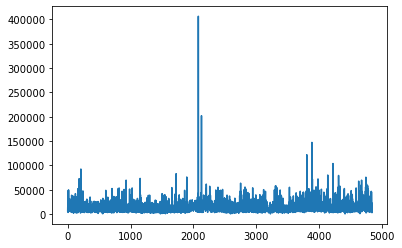

In [1778]:
(qqq[list(set(list(qqq.index))-(cvb))].astype(str).astype(float)*7/30).plot()

In [ ]:
qqq.drop

In [ ]:
FAST_wrong_AIDS_matrix(year,price_index='Stone')

In [ ]:
z_nfm Количество членов семьи

# Ограничение суммируемости вместо отбрасывания уравнения

In [2161]:
def FAST_sum_AIDS(year,fitted=True,cov_type_1='robust',
              price_index='Stone',constrained=False,
              out=False,n_neighbors=30,contamination='auto',homo=True, sym=True):
    
    if (year<1994) or (year==1997) or (year==1999):
        return 'Волны {} года не существует.'.format(year)
    final_df=FAST_AIDS_matrix(year,price_index)
    equations = OrderedDict()
    
    if out==True:
        final_df=final_df.loc[list(FAST_outlier_detection(year,n_neighbors=n_neighbors,
                                                     contamination=contamination,output='good')),:]
    
#1
    equations['Бакалея'] = {'dependent': final_df['Бакалея'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#2
    equations['Овощи-фрукты'] = {'dependent': final_df['Овощи-фрукты'],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#3
    equations['Мясо-рыба'] = {'dependent': final_df["Мясо-рыба"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#4
    equations['Молоко'] = {'dependent': final_df["Молоко"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#5
    equations['Кондитерские изделия'] = {'dependent': final_df["Кондитерские изделия"],
                         'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#6
    equations['Алкоголь'] = {'dependent': final_df["Алкоголь"],
                       'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
#7
    equations['Неалкогольные напитки'] = {'dependent': final_df["Неалкогольные напитки"],
                        'exog': final_df[[ 'const','Цена на Бакалея', 'Цена на Овощи-фрукты', 'Цена на Мясо-рыба','Цена на Молоко', 'Цена на Кондитерские изделия', 'Цена на Алкоголь','Цена на Неалкогольные напитки', 'Остаток']]}
    if constrained==True:
        if (homo==True) and (sym==True):
            mod=SUR(equations)
            mod.add_constraints(both_r)
        else:
            if homo==True:
                mod=SUR(equations)
                mod.add_constraints(homo_r)
            if sym==True:
                mod=SUR(equations)
                mod.add_constraints(sym_r)
        
        if fitted==False:
            return mod
        if fitted==True:
            modfit=mod.fit(cov_type=cov_type_1,iterate=True)
            return modfit
        
    if fitted==True:
        mod=SUR(equations)
        mod.add_constraints(sum_r,q)
        modfit=mod.fit(cov_type=cov_type_1,iterate=True)
        return modfit

    if fitted==False:
        return SUR(equations)

In [2181]:
(FAST_AIDS_matrix(2021)<=0).sum()

const                            0
Бакалея                          0
Овощи-фрукты                     0
Мясо-рыба                        0
Молоко                           0
Кондитерские изделия             0
Алкоголь                         0
Неалкогольные напитки            0
Цена на Бакалея                  0
Цена на Овощи-фрукты             0
Цена на Мясо-рыба                0
Цена на Молоко                   0
Цена на Кондитерские изделия     0
Цена на Алкоголь                 0
Цена на Неалкогольные напитки    0
Остаток                          0
dtype: int64

In [2182]:
FAST_AIDS_matrix(2021)['Неалкогольные напитки']

5       0.056168
16      0.082526
36      0.075486
73      0.105632
74      0.019236
          ...   
4811    0.060914
4813    0.027682
4832    0.071489
4833    0.055142
4834    0.039184
Name: Неалкогольные напитки, Length: 703, dtype: float64

In [2152]:
(FAST_AIDS_matrix(2021)['Неалкогольные напитки'].isna()).any()

False

In [2170]:
FAST_sum_AIDS(2021)

C:\Users\79618\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\results.py:89: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(np.diag(self.cov))
C:\Users\79618\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\results.py:89: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(np.diag(self.cov))
C:\Users\79618\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\results.py:89: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(np.diag(self.cov))
C:\Users\79618\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\results.py:89: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(np.diag(self.cov))
C:\Users\79618\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\results.py:89: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(np.diag(self.cov))
C:\Users\79618\AppData\Roaming\Python\Python39\site-packages

System Iterative GLS Estimation Summary                      
===================================================================================
Estimator:              Iterative GLS   Overall R-squared:                  -7173.8
No. Equations.:                     7   McElroy's R-squared:                       
No. Observations:                 703   Judge's (OLS) R-squared:            -2241.7
Date:                Fri, Sep 16 2022   Berndt's R-squared:              -7.952e+06
Time:                        06:43:20   Dhrymes's R-squared:             -1.713e+04
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                         9
                          Equation: Бакалея, Dependent Variable: Бакалея                         
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -4.2357     0.4232    -10.010     0.0000     -5.0651     -3.4063
Цена на Бакалея                   1.6409     0.9591     1.7109     0.0871     -0.2389      3.5207
Цена на Овощи-фрукты             -4.0066                                                         
Цена на Мясо-рыба                -2.5536     0.9736    -2.6229     0.0087     -4.4617     -0.6454
Цена на Молоко                    1.6851     0.6354     2.6521     0.0080      0.4398      2.9305
Цена на Кондитерские изделия      1.4790     0.3394     4.3582     0.0000      0.8139      2.1442
Цена на Алкоголь                  3.2420                                                         
Цена на Неалкогольные напитки    -1.4868     0.1304    -11.400     0.0000     -1.7425     -1.2312
Остаток                          -0.1863     0.1442    -1.2915     0.1965     -0.4690      0.0964
                     Equation: Овощи-фрукты, Dependent Variable: Овощи-фрукты                    
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                            -3.1343     2.2515    -1.3921     0.1639     -7.5472      1.2786
Цена на Бакалея                  -0.5361                                                         
Цена на Овощи-фрукты              0.9114     0.8809     1.0346     0.3008     -0.8151      2.6379
Цена на Мясо-рыба                -0.8566     0.8256    -1.0375     0.2995     -2.4748      0.7616
Цена на Молоко                   -0.3225                                                         
Цена на Кондитерские изделия      1.4329     0.2021     7.0887     0.0000      1.0367      1.8291
Цена на Алкоголь                  0.1035                                                         
Цена на Неалкогольные напитки    -0.7327     0.3792    -1.9321     0.0533     -1.4759      0.0105
Остаток                           0.9457     0.1000     9.4592     0.0000      0.7498      1.1417
                        Equation: Мясо-рыба, Dependent Variable: Мясо-рыба                       
=================================================================================================
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             4.0713                                                         
Цена на Бакалея                  -1.3714                                                         
Цена на Овощи-фрукты             -1.0074     0.8166    -1.2337     0.2173     -2.6079      0.5930
Цена на Мясо-рыба               

In [2171]:
r=0
r = pd.DataFrame(
    columns=FAST_sum_AIDS(1994,False).param_names,
    index=["rest{0}".format(i) for i in range(9)],
    dtype=np.float64)
r=r.fillna(0)
r.loc['rest0',['Бакалея_const', 'Овощи-фрукты_const','Молоко_const',
               'Мясо-рыба_const','Кондитерские изделия_const','Алкоголь_const',
               'Неалкогольные напитки_const']]=1

r.loc['rest1',['Бакалея_Остаток', 'Овощи-фрукты_Остаток','Молоко_Остаток',
               'Мясо-рыба_Остаток','Кондитерские изделия_Остаток','Неалкогольные напитки_Остаток']]=1

r.loc['rest2',['Бакалея_Цена на Бакалея',
              'Бакалея_Цена на Овощи-фрукты',
              'Бакалея_Цена на Молоко',
              'Бакалея_Цена на Мясо-рыба',
              'Бакалея_Цена на Кондитерские изделия',
              'Бакалея_Цена на Алкоголь',
                'Бакалея_Цена на Неалкогольные напитки']]=1

r.loc['rest3',['Овощи-фрукты_Цена на Бакалея',
              'Овощи-фрукты_Цена на Овощи-фрукты',
              'Овощи-фрукты_Цена на Молоко',
              'Овощи-фрукты_Цена на Мясо-рыба',
              'Овощи-фрукты_Цена на Кондитерские изделия',
              'Овощи-фрукты_Цена на Алкоголь',
                'Овощи-фрукты_Цена на Неалкогольные напитки']]=1

r.loc['rest4',['Молоко_Цена на Бакалея',
              'Молоко_Цена на Овощи-фрукты',
              'Молоко_Цена на Молоко',
              'Молоко_Цена на Мясо-рыба',
              'Молоко_Цена на Кондитерские изделия',
              'Молоко_Цена на Алкоголь',
                'Молоко_Цена на Неалкогольные напитки']]=1


r.loc['rest5',['Мясо-рыба_Цена на Бакалея',
              'Мясо-рыба_Цена на Овощи-фрукты',
              'Мясо-рыба_Цена на Молоко',
              'Мясо-рыба_Цена на Мясо-рыба',
              'Мясо-рыба_Цена на Кондитерские изделия',
              'Мясо-рыба_Цена на Алкоголь',
                'Мясо-рыба_Цена на Неалкогольные напитки']]=1

r.loc['rest6',['Кондитерские изделия_Цена на Бакалея',
              'Кондитерские изделия_Цена на Овощи-фрукты',
              'Кондитерские изделия_Цена на Молоко',
              'Кондитерские изделия_Цена на Мясо-рыба',
              'Кондитерские изделия_Цена на Кондитерские изделия',
              'Кондитерские изделия_Цена на Алкоголь',
                'Кондитерские изделия_Цена на Неалкогольные напитки']]=1

r.loc['rest7',['Алкоголь_Цена на Бакалея',
              'Алкоголь_Цена на Овощи-фрукты',
              'Алкоголь_Цена на Молоко',
              'Алкоголь_Цена на Мясо-рыба',
              'Алкоголь_Цена на Кондитерские изделия',
              'Алкоголь_Цена на Алкоголь',
                'Алкоголь_Цена на Неалкогольные напитки']]=1

r.loc['rest8',['Неалкогольные напитки_Цена на Бакалея',
              'Неалкогольные напитки_Цена на Овощи-фрукты',
              'Неалкогольные напитки_Цена на Молоко',
              'Неалкогольные напитки_Цена на Мясо-рыба',
              'Неалкогольные напитки_Цена на Кондитерские изделия',
              'Неалкогольные напитки_Цена на Алкоголь',
                'Неалкогольные напитки_Цена на Неалкогольные напитки']]=1


sum_r=r
sum_r

Бакалея_const  Бакалея_Цена на Бакалея  Бакалея_Цена на Овощи-фрукты  \
rest0            1.0                      0.0                           0.0   
rest1            0.0                      0.0                           0.0   
rest2            0.0                      1.0                           1.0   
rest3            0.0                      0.0                           0.0   
rest4            0.0                      0.0                           0.0   
rest5            0.0                      0.0                           0.0   
rest6            0.0                      0.0                           0.0   
rest7            0.0                      0.0                           0.0   
rest8            0.0                      0.0                           0.0   

       Бакалея_Цена на Мясо-рыба  Бакалея_Цена на Молоко  \
rest0                        0.0                     0.0   
rest1                        0.0                     0.0   
rest2                        1.0                     1.0   
rest3                        0.0                     0.0   
rest4                        0.0                     0.0   
rest5                        0.0                     0.0   
rest6                        0.0                     0.0   
rest7                        0.0                     0.0   
rest8                        0.0                     0.0   

       Бакалея_Цена на Кондитерские изделия  Бакалея_Цена на Алкоголь  \
rest0                                   0.0                       0.0   
rest1                                   0.0                       0.0   
rest2                                   1.0                       1.0   
rest3                                   0.0                       0.0   
rest4                                   0.0                       0.0   
rest5                                   0.0                       0.0   
rest6                                   0.0                       0.0   
rest7                                   0.0                       0.0   
rest8                                   0.0                       0.0   

       Бакалея_Цена на Неалкогольные напитки  Бакалея_Остаток  \
rest0                                    0.0              0.0   
rest1                                    0.0              1.0   
rest2                                    1.0              0.0   
rest3                                    0.0              0.0   
rest4                                    0.0              0.0   
rest5                                    0.0              0.0   
rest6                                    0.0              0.0   
rest7                                    0.0              0.0   
rest8                                    0.0              0.0   

       Овощи-фрукты_const  ...  Алкоголь_Остаток  Неалкогольные напитки_const  \
rest0                 1.0  ...               0.0                          1.0   
rest1                 0.0  ...               0.0                          0.0   
rest2                 0.0  ...               0.0                          0.0   
rest3                 0.0  ...               0.0                          0.0   
rest4                 0.0  ...               0.0                          0.0   
rest5                 0.0  ...               0.0                          0.0   
rest6                 0.0  ...               0.0                          0.0   
rest7                 0.0  ...               0.0                          0.0   
rest8                 0.0  ...               0.0                          0.0   

       Неалкогольные напитки_Цена на Бакалея  \
rest0                                    0.0   
rest1                                    0.0   
rest2                                    0.0   
rest3                                    0.0   
rest4                                    0.0   
rest5                                    0.0   
rest6                                    0.0   
rest7                                 

In [2165]:
sum_r.T

rest0  rest1  rest2  \
Бакалея_const                                         1.0    0.0    0.0   
Бакалея_Цена на Бакалея                               0.0    0.0    1.0   
Бакалея_Цена на Овощи-фрукты                          0.0    0.0    1.0   
Бакалея_Цена на Мясо-рыба                             0.0    0.0    1.0   
Бакалея_Цена на Молоко                                0.0    0.0    1.0   
...                                                   ...    ...    ...   
Неалкогольные напитки_Цена на Молоко                  0.0    0.0    0.0   
Неалкогольные напитки_Цена на Кондитерские изделия    0.0    0.0    0.0   
Неалкогольные напитки_Цена на Алкоголь                0.0    0.0    0.0   
Неалкогольные напитки_Цена на Неалкогольные нап...    0.0    0.0    0.0   
Неалкогольные напитки_Остаток                         0.0    1.0    0.0   

                                                    rest3  rest4  rest5  \
Бакалея_const                                         0.0    0.0    0.0   
Бакалея_Цена на Бакалея                               0.0    0.0    0.0   
Бакалея_Цена на Овощи-фрукты                          0.0    0.0    0.0   
Бакалея_Цена на Мясо-рыба                             0.0    0.0    0.0   
Бакалея_Цена на Молоко                                0.0    0.0    0.0   
...                                                   ...    ...    ...   
Неалкогольные напитки_Цена на Молоко                  0.0    0.0    0.0   
Неалкогольные напитки_Цена на Кондитерские изделия    0.0    0.0    0.0   
Неалкогольные напитки_Цена на Алкоголь                0.0    0.0    0.0   
Неалкогольные напитки_Цена на Неалкогольные нап...    0.0    0.0    0.0   
Неалкогольные напитки_Остаток                         0.0    0.0    0.0   

                                                    rest6  rest7  rest8  rest9  
Бакалея_const                                         0.0    0.0    0.0    0.0  
Бакалея_Цена на Бакалея                               0.0    0.0    0.0    0.0  
Бакалея_Цена на Овощи-фрукты                          0.0    0.0    0.0    0.0  
Бакалея_Цена на Мясо-рыба                             0.0    0.0    0.0    0.0  
Бакалея_Цена на Молоко                                0.0    0.0    0.0    0.0  
...                                                   ...    ...    ...    ...  
Неалкогольные напитки_Цена на Молоко                  0.0    0.0    0.0    1.0  
Неалкогольные напитки_Цена на Кондитерские изделия    0.0    0.0    0.0    1.0  
Неалкогольные напитки_Цена на Алкоголь                0.0    0.0    0.0    1.0  
Неалкогольные напитки_Цена на Неалкогольные нап...    0.0    0.0    0.0    1.0  
Неалкогольные напитки_Остаток                         0.0    0.0    0.0    0.0  

[63 rows x 10 columns]

In [2172]:
q=pd.Series(data=[1,0,0,0,0,0,0,0,0],index=sum_r.index)

In [2169]:
q

rest0    1
rest1    0
rest2    0
rest3    0
rest4    0
rest5    0
rest6    0
rest7    0
rest8    0
dtype: int64